In [135]:
# import all packages
import numpy as np
import matplotlib.pyplot as plt
import imageio
import pandas as pd
import os
import pydicom
import scipy.ndimage as ndi
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture
import scipy.ndimage as ndi
from skimage.exposure import match_histograms
os.chdir('C:\\Users\\gianl\\Pulmonary fibrosis\\data\\train\\')
os.getcwd()
from sklearn.preprocessing import StandardScaler
import cv2
import pickle
lin = np.linspace(0,255,256)
import statistics
from sklearn.model_selection import train_test_split
from IPython.display import Audio, display
def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

In [136]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
# import Deep learning packages 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import load_model

Using TensorFlow backend.


# IMAGES CLEANING 

In [137]:
patients_LIST = ['ID00364637202296074419422', 'ID00007637202177411956430', 'ID00009637202177434476278', 'ID00010637202177584971671',
 'ID00012637202177665765362', 'ID00014637202177757139317', 'ID00015637202177877247924', 'ID00019637202178323708467',
 'ID00020637202178344345685', 'ID00023637202179104603099', 'ID00025637202179541264076', 'ID00026637202179561894768',
 'ID00027637202179689871102', 'ID00030637202181211009029', 'ID00032637202181710233084', 'ID00035637202182204917484',
 'ID00038637202182690843176', 'ID00042637202184406822975', 'ID00047637202184938901501', 'ID00048637202185016727717', 
 'ID00051637202185848464638', 'ID00060637202187965290703', 'ID00061637202188184085559', 'ID00062637202188654068490', 
 'ID00067637202189903532242', 'ID00068637202190879923934', 'ID00072637202198161894406', 'ID00073637202198167792918',
 'ID00075637202198610425520', 'ID00076637202199015035026', 'ID00077637202199102000916', 'ID00078637202199415319443',
 'ID00082637202201836229724', 'ID00086637202203494931510', 'ID00089637202204675567570', 'ID00090637202204766623410', 
 'ID00093637202205278167493', 'ID00094637202205333947361',  'ID00099637202206203080121', 'ID00102637202206574119190', 
 'ID00104637202208063407045', 'ID00105637202208831864134', 'ID00108637202209619669361', 'ID00109637202210454292264',
 'ID00110637202210673668310', 'ID00111637202210956877205', 'ID00115637202211874187958', 'ID00117637202212360228007',
 'ID00119637202215426335765', 'ID00122637202216437668965', 'ID00123637202217151272140', 'ID00124637202217596410344',
 'ID00125637202218590429387', 'ID00126637202218610655908', 'ID00127637202219096738943', 'ID00128637202219474716089',
 'ID00129637202219868188000', 'ID00130637202220059448013', 'ID00131637202220424084844', 'ID00132637202222178761324',
 'ID00133637202223847701934', 'ID00134637202223873059688', 'ID00135637202224630271439', 'ID00136637202224951350618',
 'ID00138637202231603868088', 'ID00139637202231703564336', 'ID00140637202231728595149', 'ID00149637202232704462834',
 'ID00161637202235731948764', 'ID00165637202237320314458', 'ID00167637202237397919352', 'ID00168637202237852027833',
 'ID00169637202238024117706', 'ID00170637202238079193844', 'ID00172637202238316925179', 'ID00173637202238329754031',
 'ID00180637202240177410333', 'ID00183637202241995351650', 'ID00184637202242062969203', 'ID00186637202242472088675',
 'ID00190637202244450116191', 'ID00192637202245493238298', 'ID00196637202246668775836', 'ID00197637202246865691526',
 'ID00199637202248141386743', 'ID00202637202249376026949', 'ID00207637202252526380974', 'ID00210637202257228694086',
 'ID00213637202257692916109', 'ID00214637202257820847190', 'ID00216637202257988213445', 'ID00218637202258156844710',
 'ID00219637202258203123958', 'ID00221637202258717315571', 'ID00222637202259066229764', 'ID00224637202259281193413', 
 'ID00225637202259339837603', 'ID00228637202259965313869', 'ID00229637202260254240583', 'ID00232637202260377586117',
 'ID00233637202260580149633', 'ID00234637202261078001846', 'ID00235637202261451839085', 'ID00240637202264138860065',
 'ID00241637202264294508775', 'ID00242637202264759739921', 'ID00248637202266698862378', 'ID00249637202266730854017',
 'ID00251637202267455595113', 'ID00255637202267923028520', 'ID00264637202270643353440', 'ID00267637202270790561585',
 'ID00273637202271319294586', 'ID00275637202271440119890', 'ID00276637202271694539978', 'ID00279637202272164826258',
 'ID00283637202278714365037', 'ID00285637202278913507108', 'ID00288637202279148973731', 'ID00290637202279304677843',
 'ID00291637202279398396106', 'ID00294637202279614924243', 'ID00296637202279895784347', 'ID00298637202280361773446', 
 'ID00299637202280383305867', 'ID00305637202281772703145', 'ID00307637202282126172865', 'ID00309637202282195513787', 
 'ID00312637202282607344793', 'ID00317637202283194142136', 'ID00319637202283897208687', 'ID00322637202284842245491', 
 'ID00323637202285211956970', 'ID00329637202285906759848', 'ID00331637202286306023714', 'ID00335637202286784464927', 
 'ID00336637202286801879145', 'ID00337637202286839091062', 'ID00339637202287377736231', 'ID00340637202287399835821',
 'ID00341637202287410878488', 'ID00342637202287526592911', 'ID00343637202287577133798', 'ID00344637202287684217717',
 'ID00351637202289476567312', 'ID00355637202295106567614', 'ID00358637202295388077032', 'ID00360637202295712204040',
 'ID00365637202296085035729', 'ID00367637202296290303449', 'ID00368637202296470751086', 'ID00370637202296737666151',
 'ID00371637202296828615743', 'ID00376637202297677828573', 'ID00378637202298597306391', 'ID00381637202299644114027', 
 'ID00383637202300493233675', 'ID00388637202301028491611', 'ID00392637202302319160044', 'ID00393637202302431697467', 
 'ID00398637202303897337979', 'ID00400637202305055099402', 'ID00401637202305320178010', 'ID00405637202308359492977',
 'ID00407637202308788732304', 'ID00408637202308839708961', 'ID00411637202309374271828', 'ID00414637202310318891556', 
 'ID00417637202310901214011', 'ID00419637202311204720264', 'ID00421637202311550012437', 'ID00422637202311677017371',
 'ID00423637202312137826377', 'ID00426637202313170790466']

### NUMBER of initial images per patients

minimum is 12
maximun is 1018


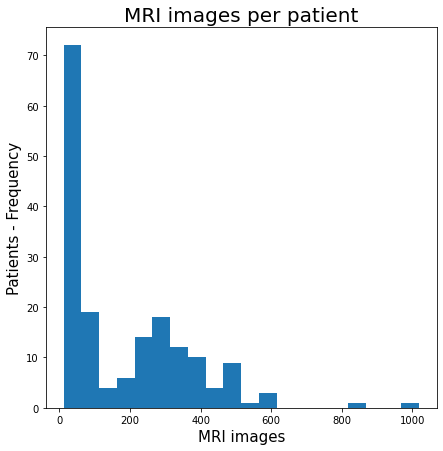

In [142]:
# get max and minumun number of images per patients
images_number = []
for i in patients_LIST:
    files  = os.listdir('C:\\Users\\gianl\\Pulmonary fibrosis\\data\\train\\'+i)
    images_number.append(len(files))

print('minimum is', min(images_number))
print('maximun is', max(images_number))
plt.figure(figsize = (7,7))
plt.hist(images_number, bins = 20)
plt.title('MRI images per patient', fontsize = 20)
plt.xlabel('MRI images', fontsize = 15)
plt.ylabel('Patients - Frequency', fontsize = 15)
plt.savefig('number of images per patients.tiff', dpi = 160)
plt.show()

### Type of images presents in the dataset

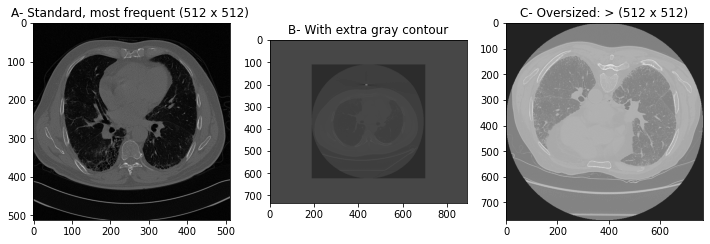

In [298]:
slic1  = pydicom.dcmread('C:\\Users\\gianl\\Pulmonary fibrosis\\data\\train\\ID00067637202189903532242\\150.dcm')
slic2  = pydicom.dcmread('C:\\Users\\gianl\\Pulmonary fibrosis\\data\\train\\ID00047637202184938901501\\60.dcm')
slic3  = pydicom.dcmread('C:\\Users\\gianl\\Pulmonary fibrosis\\data\\train\\ID00108637202209619669361\\250.dcm')

plt.figure(figsize=(12,36))
plt.subplot(1,3,1)
plt.title('A- Standard, most frequent (512 x 512) ')
plt.imshow(slic2.pixel_array, cmap = 'gray')

plt.subplot(1,3,2)
plt.title('B- With extra gray contour')
plt.imshow(slic1.pixel_array, cmap = 'gray')

plt.subplot(1,3,3)
plt.title('C- Oversized: > (512 x 512)')
plt.imshow(slic3.pixel_array, cmap = 'gray')
plt.savefig('types of MRI images.tiff', dpi =160)
plt.show()

**Most of the images are in the right size/format. But for B and C I need to create a function to remove the gray contour and scale the image down, respectively** 

In [167]:
# The list below report patient ID for which MRI images have an extra gray contour
patients_with_square = ['ID00014637202177757139317','ID00419637202311204720264', 'ID00067637202189903532242',
                        'ID00240637202264138860065','ID00086637202203494931510', 'ID00094637202205333947361',
                        'ID00122637202216437668965', 'ID00419637202311204720264']

# function for the removal of the gray square around the image 
def remove_square(image):
    start_height, stop_height, start_length, stop_length = 0, 0, 0 ,0
    height = image.shape[0]
    length = image.shape[1]
    pix_value_top = image[0,0]
    pix_value_bottom = image[height-1, length-1]
    assert pix_value_top == pix_value_bottom
    height_half = int(height/2)
    length_half = int(length/2)
    h = 0
    for i in range(height):
        if image[i, length_half] == pix_value_top:
            h=h+1
        else:
            start_height = h
            break
    l=0
    for i in range(length):
        if image[height_half, l] ==pix_value_top:
            l = l+1
        else:
            start_length = l
            break
    
    return image[start_height:start_height+512, start_length:start_length+512]


# function to normalize the shape of the image to 512x512  
def normalize_shape(image, to_shape = (512,512)):
    if image.shape != to_shape:
        return cv2.resize(image, to_shape, interpolation = cv2.INTER_LINEAR)
    else:
        return image

=============

In [145]:
# This function load the image and normalize the pixel intensity from 0 to 255. 
# It also get rid of the top 0.06% and bottom 0.005 % pixels
# It returns the normalize image plus the orientation of the patient during imaging. 
# The orientation will be helpfull to identify the right vs the left lung

def load_normalize(path, max_pixel = 255, min_per=0.005, max_per=99.94):  # from 99.95
    slices =  [pydicom.dcmread(path + '\\'+s) for s in os.listdir(path)]
    slices.sort(key=lambda x: int(x.InstanceNumber))
    orientation = slices[0].PatientPosition
    images = np.stack([s.pixel_array for s in slices])
    
    normalized = []
    
    for im in images:
        #removal of top max_per percent pixel and bottom min_per pixel
        cut_off = np.percentile(im.ravel(), [max_per, min_per])
        im = np.where(im < cut_off[0], im, cut_off[0])
        im = np.where(im > cut_off[1], im, cut_off[1])

        image_float = np.float64(im)
        image_norm = np.round(max_pixel * (image_float + np.abs(np.min(image_float))) / (np.max(image_float) + np.abs(np.min(image_float))), 0)
        normalized.append(image_norm)
    return normalized, orientation
        

In [ ]:
# Example of sequence of images 
# patient ID00207637202252526380974 has 64 images: let's plot them all

images, orientation = load_normalize('C:\\Users\\gianl\\Pulmonary fibrosis\\data\\train\\ID00207637202252526380974')

plt.figure(figsize = (16,16))
for i in range(len(images)):
    plt.subplot(8,8, i+1)
    plt.imshow(images[i], cmap = 'gray')

plt.show()

**Not all images show the lung. I need to find, manually, the first and last image in which the lung is present**

# Get Middle, First and last pic for each one

In [148]:
# dictionary images : bottom, middle, top: 
# first is the bottom image: slice close to the gut
# second one, the middle, slice that cuts the lung around half way
# the third, top one: slice close to the neck 

### some patients were images 'feet first', other 'head first

dict_im = {
'ID00364637202296074419422': [23,7,3], 'ID00007637202177411956430': [23,7,2], 'ID00009637202177434476278': [288, 118, 42],
'ID00010637202177584971671': [70, 31, 12],'ID00012637202177665765362': [33, 20, 5],'ID00014637202177757139317': [21 ,11 ,3],  # it was 23
'ID00015637202177877247924': [249, 99, 38],'ID00019637202178323708467': [21,8,3], 'ID00020637202178344345685': [140,261, 452],
'ID00023637202179104603099' : [19, 9, 3],'ID00025637202179541264076' : [18, 13, 2],'ID00026637202179561894768' : [188, 130, 18],
'ID00027637202179689871102' : [112, 166, 294],'ID00030637202181211009029' : [278, 165, 52], 'ID00032637202181710233084' : [63, 92, 186 ],
'ID00035637202182204917484' : [178, 387, 527 ],'ID00038637202182690843176' : [264, 165, 40 ],'ID00042637202184406822975' : [369,217, 60 ],
'ID00047637202184938901501' : [82, 68, 18 ],'ID00048637202185016727717' : [12,7, 3],'ID00051637202185848464638' : [83, 53, 18 ],
'ID00060637202187965290703' : [206, 139, 48],'ID00061637202188184085559' : [193, 135, 28 ],'ID00062637202188654068490' : [20, 15, 4],
'ID00067637202189903532242' : [100, 151, 275],'ID00068637202190879923934' : [64, 31, 14],'ID00072637202198161894406' : [18, 8,2],
'ID00073637202198167792918' : [207, 108, 55 ],'ID00075637202198610425520' : [95, 190, 287],'ID00076637202199015035026' : [40, 31, 12],
'ID00077637202199102000916' : [74, 53, 17],'ID00078637202199415319443' : [354,249, 102],'ID00082637202201836229724' : [221, 136, 25],
'ID00086637202203494931510' : [24, 21, 3],'ID00089637202204675567570' : [12, 21, 29],'ID00090637202204766623410' : [45, 34, 8],
'ID00093637202205278167493' : [23, 16, 5],'ID00094637202205333947361' : [21, 16, 1],'ID00099637202206203080121' : [16, 12, 2],
'ID00102637202206574119190' : [178, 86, 29],'ID00104637202208063407045' : [86, 285, 430],'ID00105637202208831864134' : [38, 19, 6],
'ID00108637202209619669361' : [131, 292,  430],'ID00109637202210454292264' : [100, 209,  262],'ID00110637202210673668310' : [164, 103, 30],
'ID00111637202210956877205' : [230, 135, 42], 'ID00115637202211874187958' : [5, 16, 21],'ID00117637202212360228007' : [23, 11,1],
'ID00119637202215426335765' : [47,23, 8],'ID00122637202216437668965' : [47, 21, 12],'ID00123637202217151272140' : [106, 188, 230],
'ID00124637202217596410344' : [302, 206, 51],'ID00125637202218590429387' : [11, 7, 3],'ID00126637202218610655908' : [13, 8, 1 ],
'ID00127637202219096738943' : [41,26,7],'ID00128637202219474716089' : [36, 18, 4],'ID00129637202219868188000' : [20,7,4],
'ID00130637202220059448013' : [38, 24,6],'ID00131637202220424084844' : [171, 76, 22],'ID00132637202222178761324' : [294, 116, 46],
'ID00133637202223847701934' : [43, 16, 6],'ID00134637202223873059688' : [337, 196, 82],'ID00135637202224630271439' : [69, 170, 316],
'ID00136637202224951350618' : [348, 191, 34],'ID00138637202231603868088' : [260, 116, 29],'ID00139637202231703564336' : [54, 37, 5],
'ID00140637202231728595149' : [159, 96, 18],'ID00149637202232704462834' : [199, 134, 26],'ID00161637202235731948764' : [20,11,2],
'ID00165637202237320314458' : [9, 4, 1],'ID00167637202237397919352' : [171, 74, 16],'ID00168637202237852027833' : [ 156, 53, 22],
'ID00169637202238024117706' : [91, 61, 12],'ID00170637202238079193844' : [134, 9, 0],'ID00172637202238316925179' : [19, 11, 3],
'ID00173637202238329754031' : [454,211, 59],'ID00180637202240177410333' : [164, 285, 545],'ID00183637202241995351650' : [42, 25, 6],
'ID00184637202242062969203' : [45, 24, 7],'ID00186637202242472088675' : [288, 127, 39],'ID00190637202244450116191' : [120, 226, 331],
'ID00192637202245493238298' : [208, 88, 38],'ID00196637202246668775836' : [84, 47, 12],'ID00197637202246865691526' : [70, 34, 13],
'ID00199637202248141386743' : [59, 38, 18 ],'ID00202637202249376026949' : [633, 283, 150],'ID00207637202252526380974' : [53, 35, 12],
'ID00210637202257228694086' : [238, 157, 36 ],'ID00213637202257692916109' : [189, 97, 28 ],'ID00214637202257820847190' : [12, 4,1],
'ID00216637202257988213445' : [17, 10, 1 ],'ID00218637202258156844710' : [46, 31, 7],'ID00219637202258203123958' : [ 277, 197,40 ],
'ID00221637202258717315571' : [410, 170, 83],'ID00222637202259066229764' : [43,20 , 6],'ID00224637202259281193413' : [41,23,7],
'ID00225637202259339837603' : [158,100,18 ],'ID00228637202259965313869' : [262, 184, 43],'ID00229637202260254240583' : [11, 4, 1],
'ID00232637202260377586117' : [ 39, 26, 9],'ID00233637202260580149633' : [110, 293, 349],'ID00234637202261078001846' : [25, 17, 6],
'ID00235637202261451839085' : [208, 80, 32],'ID00240637202264138860065' : [24, 15, 6],'ID00241637202264294508775' : [199, 99,39],
'ID00242637202264759739921' : [13, 8, 1],'ID00248637202266698862378' : [11, 8, 1],'ID00249637202266730854017' : [222, 92, 50],
'ID00251637202267455595113' : [19, 8, 2],'ID00255637202267923028520' : [16, 6,4],'ID00264637202270643353440' : [38, 27, 10],
'ID00267637202270790561585' : [34,11, 5],'ID00273637202271319294586' : [49,32, 9],'ID00275637202271440119890' : [216, 153, 34 ],
'ID00276637202271694539978' : [19, 13, 2],'ID00279637202272164826258' : [26, 17, 2],'ID00283637202278714365037' : [211, 120, 46],
'ID00285637202278913507108' : [20, 13, 4],'ID00288637202279148973731' : [21, 13, 1],'ID00290637202279304677843' : [163, 113, 25 ],
'ID00291637202279398396106' : [337, 123, 45 ],'ID00294637202279614924243' : [24, 16,4],'ID00296637202279895784347' : [21, 14, 4],
'ID00298637202280361773446' : [25, 10 , 5],'ID00299637202280383305867' : [40, 19, 9],'ID00305637202281772703145' : [48, 35, 4],
'ID00307637202282126172865' : [23, 8,3],'ID00309637202282195513787' : [344, 136, 50],'ID00312637202282607344793' : [323, 150, 47],
'ID00317637202283194142136' : [308, 211, 52],'ID00319637202283897208687' : [28, 11, 5],'ID00322637202284842245491' : [85, 37, 7 ],
'ID00323637202285211956970' : [195, 58, 15],'ID00329637202285906759848' : [180, 80, 34],'ID00331637202286306023714' : [42, 18, 9],
'ID00335637202286784464927' : [24, 7, 2 ],'ID00336637202286801879145' : [23, 12, 4],'ID00337637202286839091062' : [42, 35, 7],
'ID00339637202287377736231' : [47, 33, 0],'ID00340637202287399835821' : [21, 12, 4],'ID00341637202287410878488' : [45, 18,8],
'ID00342637202287526592911' : [18, 7, 3],'ID00343637202287577133798' : [24, 8, 4],'ID00344637202287684217717' : [148, 72, 18 ],
'ID00351637202289476567312' : [21, 12, 2],'ID00355637202295106567614' : [28,23, 5],'ID00358637202295388077032' : [174, 79,31],
'ID00360637202295712204040' : [211, 91, 40],'ID00365637202296085035729' : [50, 19, 6 ],'ID00367637202296290303449' : [190, 140,18],
'ID00368637202296470751086' : [236, 122, 46],'ID00370637202296737666151' : [172, 94, 29],'ID00371637202296828615743' : [215, 79, 21],
'ID00376637202297677828573' : [296, 188, 30 ],'ID00378637202298597306391' : [258, 117, 47],'ID00381637202299644114027' : [235, 188, 22],
'ID00383637202300493233675' : [25,15, 5],'ID00388637202301028491611' : [317, 147, 37],'ID00392637202302319160044' : [42, 30, 5],
'ID00393637202302431697467' : [123, 250, 430],'ID00398637202303897337979' : [36, 20, 2 ],'ID00400637202305055099402' : [199, 96, 14],
'ID00401637202305320178010' : [18,6,1],'ID00405637202308359492977' : [22, 9, 2],'ID00407637202308788732304' : [37, 14, 2],
'ID00408637202308839708961' : [30, 17, 2],'ID00411637202309374271828' : [191, 69 , 23],'ID00414637202310318891556' : [201,116, 25 ],
'ID00417637202310901214011' : [48, 18, 4 ],'ID00419637202311204720264' : [24, 13, 3],'ID00421637202311550012437' : [47,29, 3],
'ID00422637202311677017371' : [302, 136, 52],'ID00423637202312137826377' : [202, 84, 34],'ID00426637202313170790466' : [95, 230, 371]}

# in the competition this patients were the test set
test_SET =['ID00419637202311204720264','ID00421637202311550012437', 'ID00422637202311677017371', 
           'ID00423637202312137826377', 'ID00426637202313170790466']

print('Number of patients is', len(dict_im))

Number of patients is 174


### Calculate the number of images in dataset using the upper and lower boundaries I set

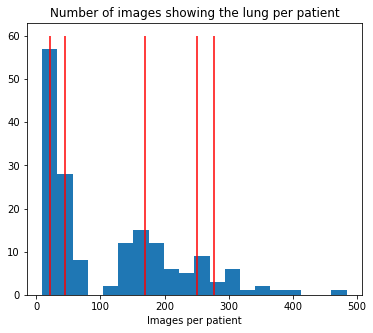

The minimum number of images in test is 22
The minimum number of images in train is 9


In [154]:
test_im_number = []
train_im_number = []
lenn= {}
for i,j in dict_im.items():
    nn = np.abs(j[2]-j[0]) + 1
    lenn[i] =nn
    if i in test_SET:
        test_im_number.append(nn)
    else:
        train_im_number.append(nn)
    
plt.figure(figsize = (6,5))    
plt.hist(train_im_number,bins =20)
plt.title('Number of images showing the lung per patient')
plt.xlabel('Images per patient')
for t in test_im_number:
    plt.vlines(x = t, ymin=0, ymax=60, color = 'red')
plt.savefig('number of images with lung.tiff', dpi = 160)
plt.show()

print('The minimum number of images in test is', np.min(test_im_number))
print('The minimum number of images in train is', np.min(train_im_number))

**I will get 9 images (3x3) per patients and train the deep learning model with them**

In [157]:
# Extrack middle image( will be used to find the center of mass for each lung), and orientation of scanning (belly down ar up )

data_im_center = {}
orientation_P = {}

for i, j in dict_im.items():
    images, orientation = load_normalize('C:\\Users\\gianl\\Pulmonary fibrosis\\data\\train\\{0}'.format(i))
    data_im_center[i]= images[j[1]]
    orientation_P[i] = orientation


C:\Users\gianl\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
# define a function that tells me where the right/left lungs are  
def is_rightlung_on_theright(orient):
    is_right_L_right ={}
    for i,f in orient.items():
        if orient[i][2] == 'P':
            is_right_L_right[i] = False
        else:
            is_right_L_right[i] = True
    return is_right_L_right

is_right_L_right = is_rightlung_on_theright(orientation_P)  

## SAVE / LOAD ORIENTATION DATA 

In [ ]:
'''# SAVE ORIENTATION DATA
orient_lung_OUT = open('lung_orientation.pickle', 'wb')
pickle.dump(is_right_L_right, orient_lung_OUT)
orient_lung_OUT.close()'''

In [177]:
#LOAD ORIENTATION DATA
orient_lung_IN = open('lung_orientation.pickle', 'rb')
is_right_L_right = pickle.load(orient_lung_IN)
orient_lung_IN.close()

=============

In [ ]:
# image ref for intensity to normalize the pixel intensity distribution
'''image_reference = data_im_center['ID00426637202313170790466']
plt.imshow(image_reference, cmap = 'gray')
plt.show()

# pickle image_for_reference
im_ref_OUT = open('image_ref.pickle', 'wb')
pickle.dump(image_reference, im_ref_OUT)
im_ref_OUT.close()'''

In [158]:
# LOAD IMAGE REFERENCE
im_ref_IN = open('image_ref.pickle', 'rb')
image_reference = pickle.load(im_ref_IN)
im_ref_IN.close()

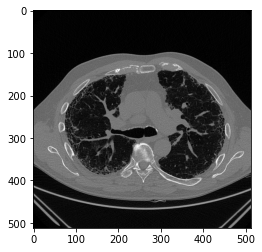

In [159]:
plt.imshow(image_reference, cmap = 'gray')
plt.show()

=============

## Collect 9 images per patient

In [ ]:
# this function spits out the indexes of the 9 images which are equally spaced between the top and the bottom pics from the dict_im dictionary
def collect_9_im(dict_im):
    dict_9 = {}
    for key, values in dict_im.items():
        list_im = []
        step = (values[0] - values[2])/8
        list_im.append(values[0])
        image = values[0]
        for i in range(8):
            image = image - step
            list_im.append(round(image, 0))
        
        dict_9[key] = list_im
    return dict_9

images_9 = collect_9_im(dict_im)

In [ ]:
all_images_dataset = {}

for key, values in images_8.items():
    images, orientation = load_normalize('C:\\Users\\gianl\\Pulmonary fibrosis\\data\\train\\{0}'.format(key))
    to_add = []

    for i in values:
        to_add.append(images[int(i)])

    all_images_dataset[key] =  to_add

In [ ]:
# check all_images_dataset size 
print('the dataset has', len(all_images_dataset), 'patients with', len(all_images_dataset['ID00364637202296074419422']), 'images per patient')

In [ ]:
'''# SAVE THE all_images_dataset
all_images_dataset_OUT = open('Nine_images.pickle', 'wb')
pickle.dump(all_images_dataset, all_images_dataset_OUT)
all_images_dataset_OUT.close()'''

In [ ]:
# LOAD THE all_images_dataset
all_images_dataset_IN = open('Nine_images.pickle', 'rb')
all_images_dataset = pickle.load(all_images_dataset_IN)
all_images_dataset_IN.close()

## USE KernelDensity

In [169]:
# this function use kernel density to model the pixel intensity ditribution in the image and find the maxima
def find_maxima(image, match_hist= False): #Sept 23
    if match_hist == True:
        image = match_histograms(image, image_reference, multichannel = False)
    maxim_list = []
    arr = image.ravel().reshape(-1,1)
    mod = KernelDensity(bandwidth = 7, kernel = 'gaussian')
    mod.fit(arr)
    exp_log_prob = np.exp(mod.score_samples(lin.reshape(-1,1)))
    for i in range(len(exp_log_prob)-4):
        if i==0:
            if exp_log_prob[i]>exp_log_prob[i+1]> exp_log_prob[i+2]:
                maxim_list.append(i)
        if exp_log_prob[i+2] > 0.002:
            if exp_log_prob[i]< exp_log_prob[i+1]< exp_log_prob[i+2] and exp_log_prob[i+4]<exp_log_prob[i+3]< exp_log_prob[i+2]:
                maxim_list.append(i+2)
    
    # plot everything

    plt.figure(figsize = (15,5))
    plt.subplot(1,3,1)
    plt.imshow(image, cmap = 'gray')
    plt.subplot(1,3,2)
    for max_v in maxim_list:
        plt.vlines(x = max_v, ymin=0, ymax =20000, colors = 'red')
    plt.hist(arr, bins = 256)
    plt.subplot(1,3,3)
    plt.plot(exp_log_prob)
    plt.show()
        
    return maxim_list 

==============================================================
==============================================================


## Find center of masses 

In [165]:
## This was utilized to get the center of mass of the lungs from the middle section
kernel = np.ones((5,5),np.uint8)  # Kernel for dilate
kernelc = np.ones((15,15),np.uint8)  # Kernel for closing hole

def second(n): 
    return n[1]

def split_lung_with_dilation(image, means, sigma = 1, match_hist= False): #Sept 23

    mean_s = sorted(means, reverse  = True)
    image = ndi.gaussian_filter(image, sigma = sigma)
    
    # in few cases there are 2 peaks of high intensity pixels (bones and soft tissue), very close to each other,
    #<30 from each other
    # in this instancese the 3rd lowest peak is the one reppresenting the lung. 
    if mean_s[0] - mean_s[1] > 30: 
        distance = (mean_s[0] - mean_s[1])/2
        mask = (image > mean_s[1] - distance) & (image < mean_s[1] + distance)
    else:
        distance = (mean_s[1] - mean_s[2])/2
        mask = (image > mean_s[2] - distance) & (image < mean_s[2] + distance)
    
    # follows various manipulation of the mask:
    
    mask2 = np.float32(mask)
    
    # closing
    closing = cv2.morphologyEx(mask2, cv2.MORPH_CLOSE, kernel = kernelc) # just closing

    # dilation
    dilation = cv2.dilate(mask2, kernel= kernel, iterations = 1) # just dilattion
    
    #closing after dilation
    closing_dilation = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel = kernelc) # closing after dil 
    
    # smoothing elipse after closing
    kernel_eliptic =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
    elip_closing_dilation = cv2.morphologyEx(closing_dilation, cv2.MORPH_OPEN, kernel = kernel_eliptic, iterations=4)
    
    #2 rounds of blurring after, closing, dilation
    opening_eliptic_CCC = cv2.blur(elip_closing_dilation, (5,5))
    opening_eliptic_CCC = opening_eliptic_CCC > 0.2
    opening_eliptic_CCC = np.float32(opening_eliptic_CCC)
    opening_eliptic_CCC = cv2.blur(opening_eliptic_CCC, (5,5))
    opening_eliptic_CCC = opening_eliptic_CCC > 0.2

    plt.figure(figsize =(40,8))
    plt.subplot(1,6,1)
    plt.title('GM', fontsize = 20)
    plt.imshow(mask)

    plt.subplot(1,6,2)
    plt.title('GM + closing ', fontsize = 20)
    plt.imshow(closing)

    plt.subplot(1,6,3)
    plt.title('GM + dilation', fontsize = 20)
    plt.imshow(dilation)

    plt.subplot(1,6,4)
    plt.title('GM + dilate+ closing ', fontsize = 20)
    plt.imshow(closing_dilation)

    plt.subplot(1,6,5)
    plt.title('GM + closing + smoothing eliptic', fontsize = 20)
    plt.imshow(elip_closing_dilation)

    plt.subplot(1,6,6)
    plt.title('GM + dilate + closing + bluring', fontsize = 20)
    plt.imshow(opening_eliptic_CCC)

    plt.show()
    
    
    labels, nlabels = ndi.label(dilation)
    if nlabels > 6:
        labels, nlabels = ndi.label(opening_eliptic_CCC)

    lungs = []
    centers = []

    for i in range(nlabels):
        lun = np.where(labels==i+1, image, 0)
        center = ndi.center_of_mass(lun)
        if 208 <= center[0] <= 356:  # from 350
            if 114 <=center[1] <=394:
                lungs.append(lun)
                centers.append(center)
            
    centers = sorted(centers, key = second)
    centers[1] = centers[-1]
    centers = centers[0:2]
    
    for i in range(len(centers)):
        range_L = int(centers[i][0]) -20
        range_R = int(centers[i][0]) +20
        range_D =  int(centers[i][1]) -20        
        range_U =  int(centers[i][1]) +20 
        image[range_L:range_R, range_D: range_U] = np.max(lungs[0]) + 100

    plt.imshow(image, cmap = 'gray')
    plt.show()
    
    return centers

## Center of Mass lungs from Middle section 

ID00364637202296074419422


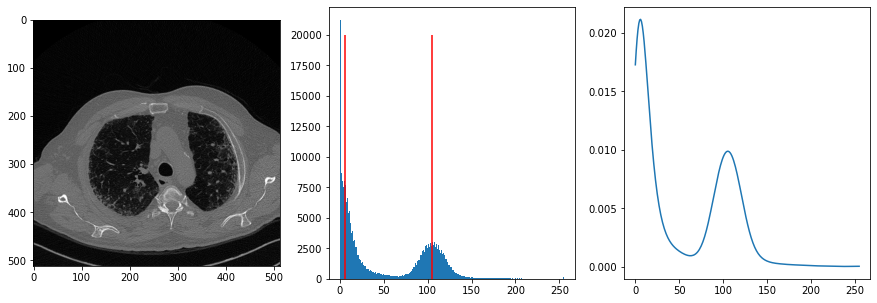

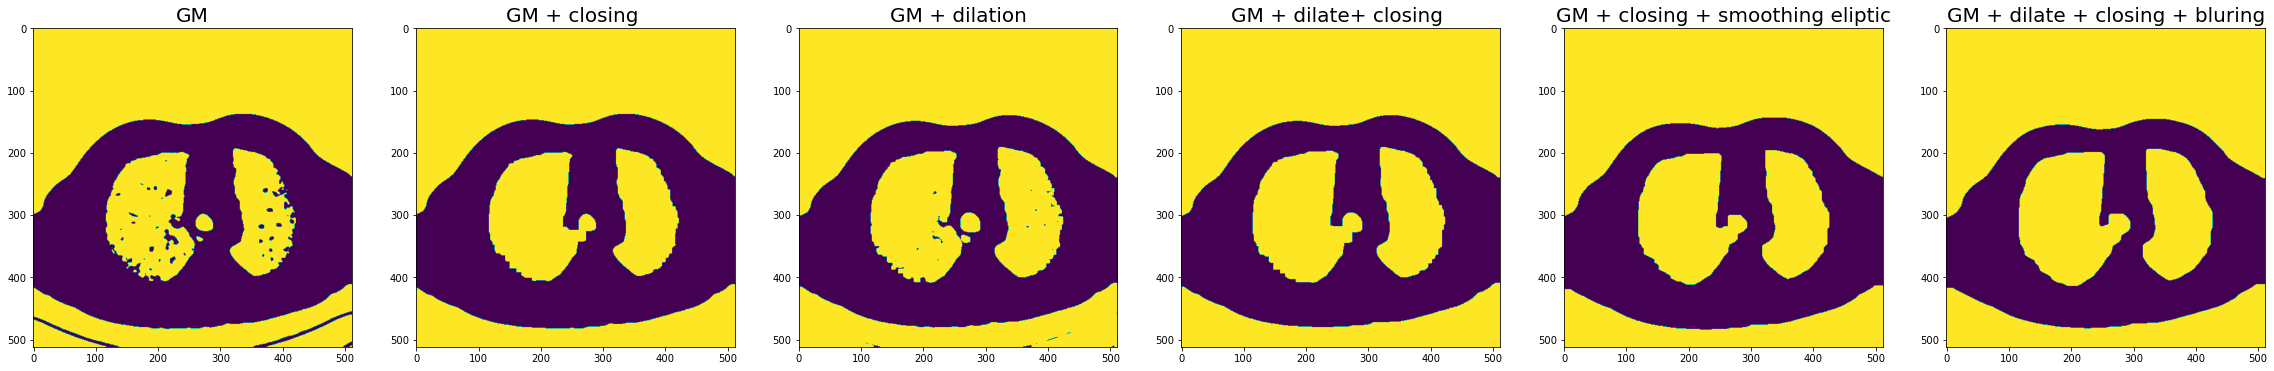

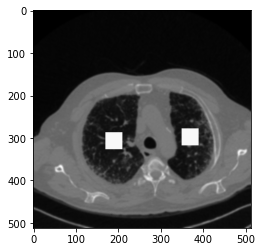

ID00007637202177411956430


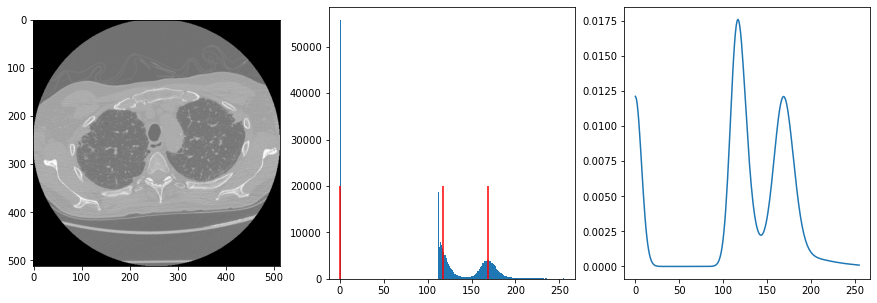

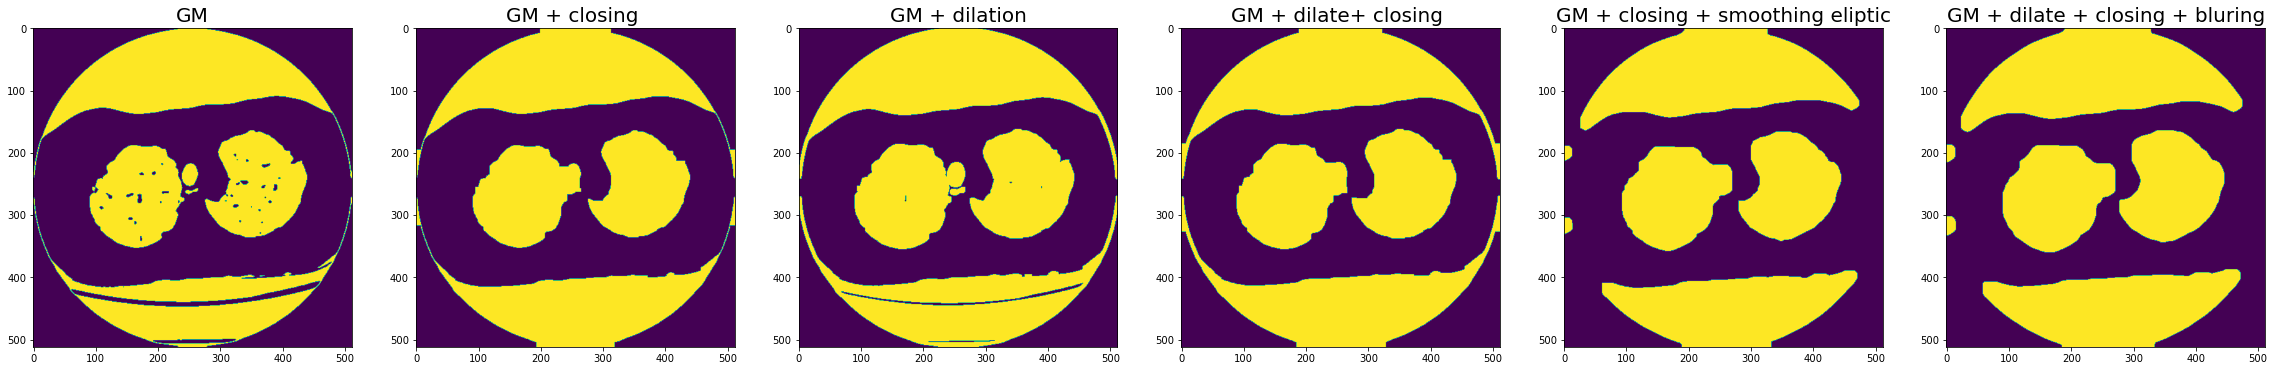

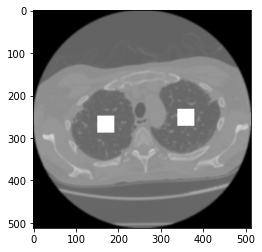

ID00009637202177434476278


KeyboardInterrupt: 

<Figure size 1080x360 with 0 Axes>

In [171]:
# This exrapolates the center of mass for left and right lobe into a dictionary called center_mass_middle_pic.

centers_mass_pics_middle = {}
images_cleaned_middle = {}
peaks_pic_middle = {}


for key, im in data_im_center.items():
    print(key)
    if key in patients_with_square:
        im = remove_square(im)  # fix the square issue
    im = normalize_shape(im)  # spit out 512 x 512 pic
    
    images_cleaned_middle[key] = im
    means = find_maxima(im, match_hist = False)
    peaks_pic_middle[key] = means
        
    center = split_lung_with_dilation(im, means =means, sigma = 1.7, match_hist = False)
    
    centers_mass_pics_middle[key] = center

## Dump important MIDDLE DATA 

In [ ]:
'''# pickle the Middle data out PEAKS
pickle_out_Peak_Middle = open('peaks_Middle.pickle', 'wb')
pickle.dump(peaks_pic_middle, pickle_out_Peak_Middle)
pickle_out_Peak_Middle.close()

#images 
pickle_out_IM_Middle = open('IM_Middle.pickle', 'wb') 
pickle.dump(images_cleaned_middle, pickle_out_IM_Middle)
pickle_out_IM_Middle.close()

# center of mass lobes
pickle_out_CENTERS = open('Centers_coordinates.pickle', 'wb') 
pickle.dump(centers_mass_pics_middle, pickle_out_CENTERS)
pickle_out_CENTERS.close()'''

## Import MIDDLE DATA 

In [172]:
#Middle data out PEAKS
pickle_IN_Peak_Middle = open('peaks_Middle.pickle', 'rb')
peaks_pic_middle = pickle.load(pickle_IN_Peak_Middle)
pickle_IN_Peak_Middle.close()

#images
pickle_IN_IM_Middle = open('IM_Middle.pickle', 'rb')
images_cleaned_middle = pickle.load(pickle_IN_IM_Middle)
pickle_IN_IM_Middle.close()

# center of mass lobes
pickle_IN_CENTERS = open('Centers_coordinates.pickle', 'rb') 
centers_mass_pics_middle = pickle.load(pickle_IN_CENTERS)
pickle_IN_CENTERS.close()

174


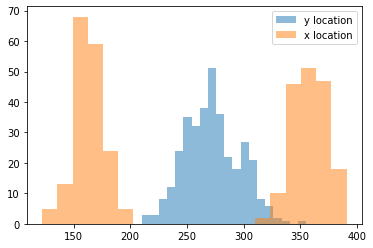

In [173]:
#plot the center of mass, x and y coordinates

print(len(centers_mass_pics_middle))
y_ax = []
x_ax = []
for i,j in centers_mass_pics_middle.items():
    y_ax.append(j[0][0])
    y_ax.append(j[1][0])
    x_ax.append(j[0][1])
    x_ax.append(j[1][1])

plt.hist(y_ax, alpha = 0.5, label = 'y location', bins =20)
plt.hist(x_ax, alpha = 0.5, label = 'x location', bins =20)
plt.legend()
plt.show()

==============================================================
==============================================================

## Function to carve lungs out 

In [174]:
## This was utilized to carve out the lungs using the  the center of mass of the lungs from the middle section
# FINAL
kernel = np.ones((5,5),np.uint8)  # Kernel for dilate
kernelc = np.ones((10,10),np.uint8)  # Kernel for closing hole

def carve_lung(image, sigma, mean, centers, range_p, is_right_right, wiggle, V_O_ratio = 1):
    
    mean_s = sorted(mean, reverse  = True)
    image_2 = image
    image = ndi.gaussian_filter(image, sigma = sigma)
    
    # in few cases there are 2 peaks of high intensity pixels (bones and soft tissue), very close to each other,
    #<30 from each other
    # in this instancese the 3rd lowest peak is the one reppresenting the lung. 
    print('means are', mean_s)
    if mean_s[0] - mean_s[1] > 30: 
        distance = wiggle*(mean_s[0] - mean_s[1])/2
        mask = (image > mean_s[1] - distance) & (image < mean_s[1] + distance)
        white_tissue = image > (mean_s[1] + distance)
    else:
        distance = wiggle*(mean_s[1] - mean_s[2])/2
        mask = (image > mean_s[2] - distance) & (image < mean_s[2] + distance)
        white_tissue = image > (mean_s[2] + distance)

    
    W_labels, W_nlabels = ndi.label(white_tissue)
    
    max_area = 0
    for i in range(W_nlabels):
        wt = np.where(W_labels == i+1, 1, 0)
        wt_center = ndi.center_of_mass(wt)
        if (100 < wt_center[0] < 400) and (150 < wt_center[1] < 350):
            if ndi.sum(wt) > max_area:
                white_tissue = wt
                max_area = ndi.sum(wt)
    
    countours, hierarchy = cv2.findContours(white_tissue.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    # find the right white big contours
    MAX_counter_radius = 0
    right_count= 0 
    for cc in range(len(countours)):
        cen, radius = cv2.minEnclosingCircle(countours[cc])
        if radius > MAX_counter_radius:
            MAX_counter_radius = radius
            right_count = cc
    
    cen, radius = cv2.minEnclosingCircle(countours[right_count])
    
    x_white, y_white, w_white, h_white = cv2.boundingRect(countours[right_count])
    white_tissu_rect_coordinate = (x_white, y_white, w_white, h_white)
    image33 = image
    cv2.rectangle(image33, (x_white,y_white), (w_white+x_white, h_white+y_white),(100,0,200),8)    
    plt.imshow(image33)
    plt.show()
       
    imagggg = image

    print('contoursdata', cen, radius)
    print('white tissue area is', max_area)
    
    # follows various manipulation of the mask:
    
    mask2 = np.float32(mask)
    
    # closing
    closing = cv2.morphologyEx(mask2, cv2.MORPH_CLOSE, kernel = kernelc) # just closing
    
    # use closing !! 
    labels, nlabels = ndi.label(closing)
    
    if nlabels  <3:
        labels, nlabels = ndi.label(mask2)
        print('nlabels was <3, mask2 was used')
    
    # the part below is to identify the objects close the center of mass of the lung
    index_lobe = []
    print('before', nlabels)
    for i in range(nlabels):
        lun = np.where(labels==i+1, 1, 0)
        plt.imshow(lun)
        plt.show()
        cen_lun = ndi.center_of_mass(lun)    ## ADDED extra 1.5 
        if (centers[0][0] - range_p*V_O_ratio <=  cen_lun[0] <= centers[0][0] + range_p*V_O_ratio) and (centers[0][1] - range_p <=  cen_lun[1] <= centers[0][1] + range_p):
            index_lobe.append(i+1)
        elif (centers[1][0] -range_p*V_O_ratio <=  cen_lun[0] <= centers[1][0] + range_p*V_O_ratio) and (centers[1][1] -range_p <=  cen_lun[1] <= centers[1][1] + range_p):
            index_lobe.append(i+1)  
    
    print('Indexes of object close to COM  are', index_lobe)
    
    area_lung =[]
    
    lll=np.zeros((512,512))
    
    lung_white_tissue_ratio = []
    index_lobe_filter = []
    
    for i in range(len(index_lobe)):
        lun = np.where(labels == index_lobe[i], 1, 0)
        areas_lung = ndi.sum(lun)
        
        RATIO  = round(100 * areas_lung/max_area, 2) 
        print(' % ratio lung/white is', RATIO) 
        if 0.5 < RATIO < 110:
            index_lobe_filter.append(index_lobe[i])
            lung_white_tissue_ratio.append(RATIO)
            print(i, 'with ratio', RATIO)
    
    print('Indexes of object close to COM, and with minumum tissue/lung ratio are', index_lobe_filter)
    
    if len(index_lobe_filter) == 0:
        print('Indexes of object close to COM, and with minumum tissue/lung ratio is EMPTY')
        for i in range(nlabels):
            lun = np.where(labels==i+1, 1, 0)
            cen_lun = ndi.center_of_mass(lun)
            areas_lung = ndi.sum(lun)
            RATIO  = round(100 *areas_lung/max_area, 2)
            average_y = (centers[0][0] + centers[1][0]) / 2
            average_x = (centers[0][1] + centers[1][1]) / 2
            areas_lung = ndi.sum(lun)
            if ((average_y - range_p ) <= cen_lun[0] <= (average_y + range_p)) and ((average_x - range_p ) <= cen_lun[1] <= (average_x + range_p)):
                index_lobe_filter.append(i+1)
                print(i+1, 'with ratio', RATIO)
                lung_white_tissue_ratio.append(RATIO)
    to_del = []
    for i in range(len(index_lobe_filter)):
        lung_L = np.where(labels == index_lobe_filter[i], 1, 0).astype(np.uint8)
        
        countoursL, hierarchyL = cv2.findContours(lung_L, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        cenL, radiusL = cv2.minEnclosingCircle(countoursL[0])
        ##########################################
        radiusss = int(radiusL)
        cenn = (int(cenL[0]),int(cenL[1]))
        cv2.circle(imagggg, cenn, radiusss, (255,0,255),8)
        cv2.circle(imagggg, (int(centers[0][1]), int(centers[0][0])), 9, (255,0,255),8)
        cv2.circle(imagggg, (int(centers[1][1]), int(centers[1][0])), 9, (255,0,255),8)
        plt.imshow(imagggg)                                         
        plt.show()
        ###########################################
        
        print('radius lung is', radiusL)
        if radiusL > radius:
            to_del.append(i)
    ####
    if len(to_del) > 0:
        for i in sorted(to_del, reverse = True):
            del index_lobe_filter[i]
            del lung_white_tissue_ratio[i]
        #####
    lungs_location = []
    
    for i in range(len(index_lobe_filter)):
        lun = np.where(labels == index_lobe_filter[i], 1, 0)        
        
        print(ndi.sum(lun))
        
        lun = np.float32(lun)
        
        dilation = cv2.dilate(lun, kernel= kernel, iterations = 2)
        closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel = np.ones((17,17),np.uint8))
        
        kernel_eliptic =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
        
        elip_closing_dilation = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel = kernel_eliptic, iterations=4)
        elip_closing_dilation = np.float32(elip_closing_dilation)
        
        white_tissue = white_tissue - elip_closing_dilation
        
        #calculare area before blurring, that's the most accurate value
        area_lung.append(ndi.sum(elip_closing_dilation))
        
        cen_RIGHT_LEFT = ndi.center_of_mass(elip_closing_dilation)
        
        half_way_center = (centers[0][1] + centers[1][1])/2   ### NEW ADDD
        if cen_RIGHT_LEFT[1] > (half_way_center+30) and is_right_right == True:   ### NEW ADDD
            lungs_location.append('Right lung')
        elif cen_RIGHT_LEFT[1] < (half_way_center-30) and is_right_right == False:   ### NEW ADDD
            lungs_location.append('Right lung')
        elif (half_way_center-30) <= cen_RIGHT_LEFT[1]<= (half_way_center+30) :    ### NEW ADDD
            lungs_location.append('Center lung')
        else: 
            lungs_location.append('Left lung')
        
        
        blurring_closing = cv2.GaussianBlur(closing, (3,3), 0)
        blurring_closing = blurring_closing > 0
        blurring_closing = np.float32(blurring_closing)
        blurring_closing = cv2.blur(blurring_closing, (3,3))
        blurring_closing = blurring_closing > 0
        
        lll = np.maximum(lll, np.where(blurring_closing > 0, image_2, 0))
    
    
    white_tissue = np.maximum(white_tissue, 0)
    white_tissue_area = ndi.sum(white_tissue)
    
    
    plt.figure(figsize = (15,5))
    plt.subplot(1,3,1)
    plt.imshow(white_tissue)
    plt.title('Not lung tissue')
    plt.subplot(1,3,2)
    plt.title('filtered image')
    plt.imshow(image, cmap = 'gray')
    plt.subplot(1,3,3)
    plt.title('Carved out lungs')
    plt.imshow(lll, cmap = 'gray' )
    plt.show()
    
    return lll, area_lung, white_tissue_area, lung_white_tissue_ratio, lungs_location, white_tissu_rect_coordinate
# lll ==== carved lung
# white_tissue_area ==== area of non lung tissue
# lung_white_tissue_ratio === area ratio LUNG / NON-LUNG TISSUE
# lungs_location ===== RIGHT/LEFT LUNG or CENTER
# white_tissu_rect_coordinate === coordinate RECT surroung non LUNG TISSUE



## Function to plot left right lung ratio

In [175]:
# plot ratio lung area function 
def plot_lung_areas_ratio(ratios, location, tittle):
    Center_L = []
    Left_L = []
    Right_L = []
    for i in ratios.keys():
        for j in range(len(ratios[i])):
            if location[i][j] == 'Center lung':
                Center_L.append(ratios[i][j])
            elif location[i][j] == 'Left lung':
                Left_L.append(ratios[i][j])
            else:
                Right_L.append(ratios[i][j])
    
    print('MINs:left', min(Left_L), 'right', min(Right_L))
    print('MAXs: left', max(Left_L),'right',  max(Right_L))
    
    
    plt.hist(Center_L, label = 'Centered Lung', bins = 25, alpha = 0.5)
    plt.hist(Left_L, label = 'Left Lung', bins = 25, alpha = 0.5)    
    plt.hist(Right_L, label = 'Right Lung', bins = 25, alpha = 0.5)
    plt.title(title)
    plt.legend()
    plt.show()



### Function to normalize image contrast 


In [ ]:
# function to normalize image contrast 
def normalize_contrast(images_dict, image_reference):
    normalized_images = {}
    for key, im in images_dict.items():
        image = match_histograms(im, image_reference, multichannel = False)
        normalized_images[key] = image
        
        '''plt.subplot(1,3,1)
        plt.imshow(im, cmap ='gray')
        plt.title('original')
        plt.subplot(1,3,2)
        plt.imshow(image, cmap ='gray')
        plt.title('normalized')
        plt.subplot(1,3,3)
        plt.imshow(image_reference, cmap ='gray')
        plt.title('reference')
        plt.show()'''
        
    return normalized_images

# MIDDLE SECTION CARVE LUNG

ID00364637202296074419422
[(307.9299418385007, 190.8416405111797), (297.97908140929417, 369.66305605312505)]
means are [104, 6]


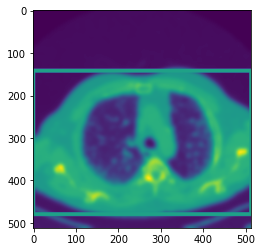

contoursdata (255.5, 327.0) 269.5854187011719
white tissue area is 98980
before 4


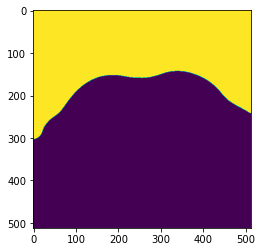

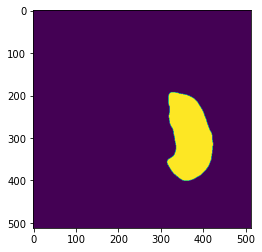

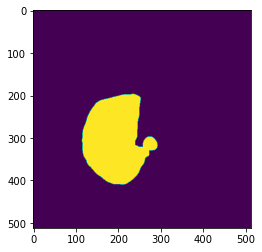

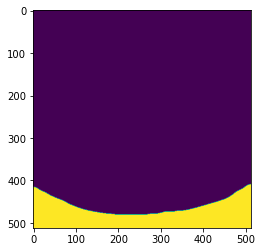

Indexes of object close to COM  are [2, 3]
 % ratio lung/white is 16.51
0 with ratio 16.51
 % ratio lung/white is 25.44
1 with ratio 25.44
Indexes of object close to COM, and with minumum tissue/lung ratio are [2, 3]


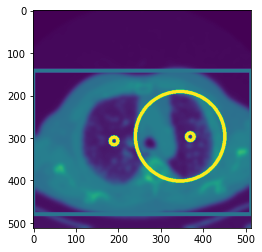

radius lung is 105.60904693603516


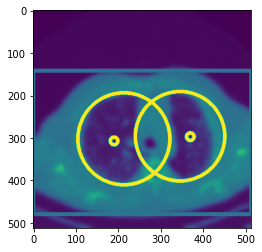

radius lung is 108.4217300415039
16341
25184


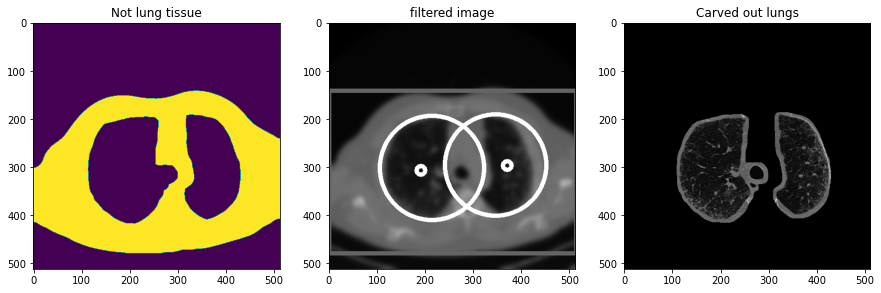

ID00007637202177411956430
[(268.78795935476353, 171.48072876818438), (252.5957351199319, 359.859480500764)]
means are [168, 116, 0]


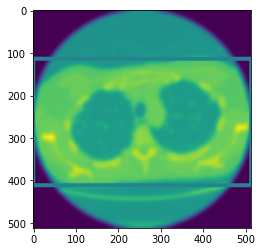

contoursdata (255.5, 257.5) 256.1689758300781
white tissue area is 85723
before 4


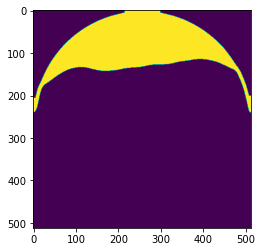

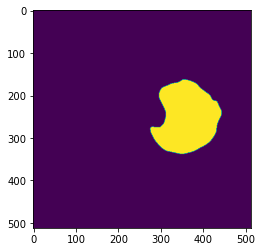

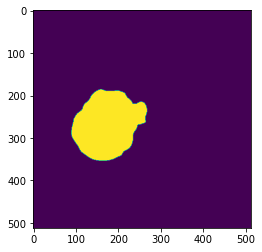

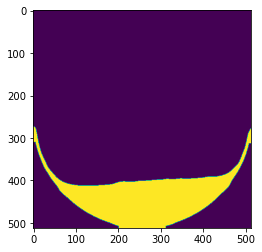

Indexes of object close to COM  are [2, 3]
 % ratio lung/white is 23.31
0 with ratio 23.31
 % ratio lung/white is 24.29
1 with ratio 24.29
Indexes of object close to COM, and with minumum tissue/lung ratio are [2, 3]


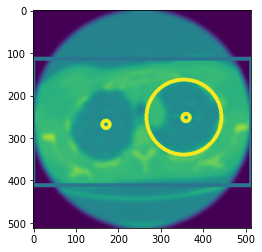

radius lung is 88.84191131591797


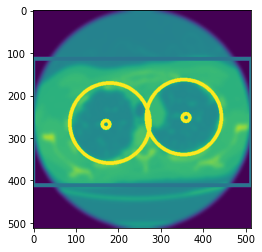

radius lung is 94.41493225097656
19983
20826


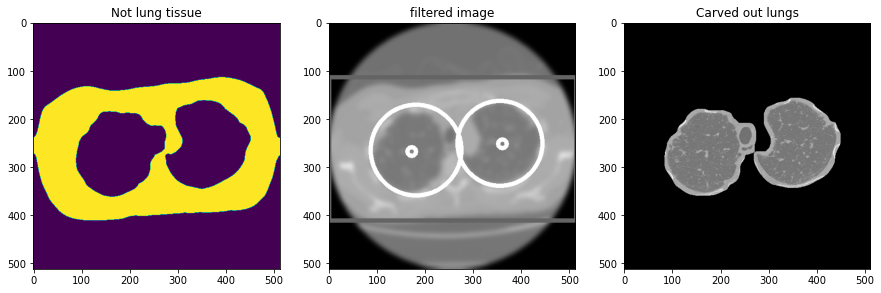

ID00009637202177434476278
[(256.8001690163978, 160.23565073302439), (244.94949322330905, 335.91188737969514)]
means are [75, 5]


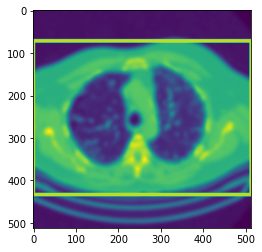

contoursdata (252.30625915527344, 256.9999694824219) 275.24261474609375
white tissue area is 108930
before 4


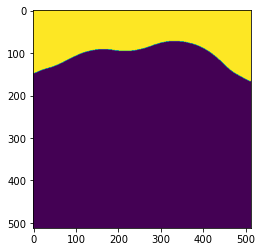

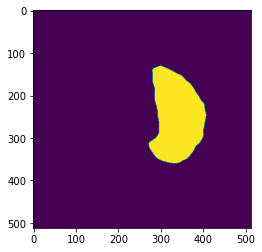

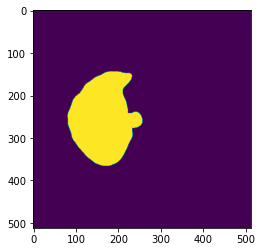

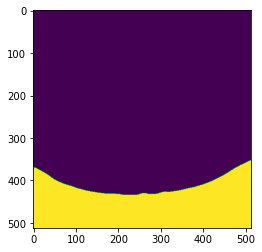

Indexes of object close to COM  are [2, 3]
 % ratio lung/white is 19.6
0 with ratio 19.6
 % ratio lung/white is 23.85
1 with ratio 23.85
Indexes of object close to COM, and with minumum tissue/lung ratio are [2, 3]


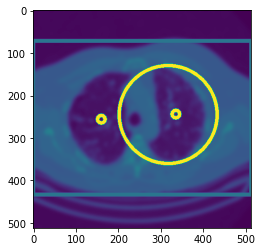

radius lung is 115.8286361694336


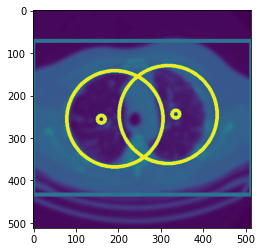

radius lung is 113.22909545898438
21355
25985


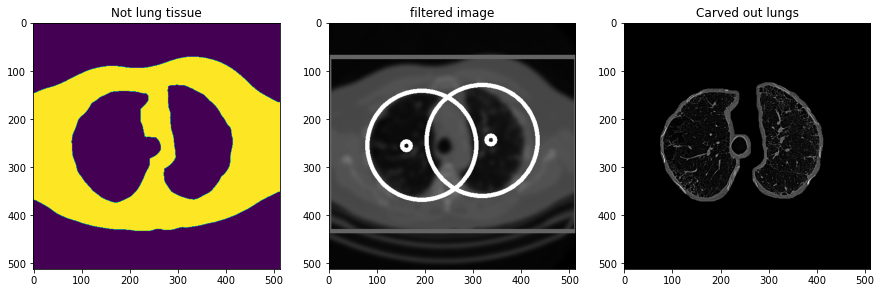

ID00010637202177584971671
[(301.62980549697426, 164.6596513008322), (296.01422421092843, 361.8257457305882)]
means are [104, 4]


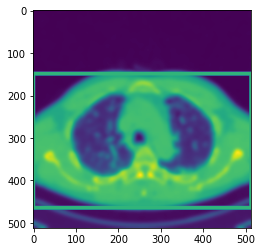

contoursdata (255.5, 325.5) 265.8619079589844
white tissue area is 98852
before 5


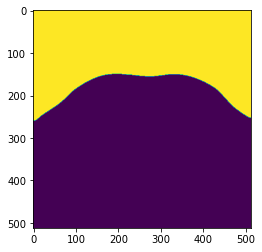

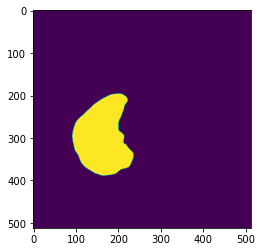

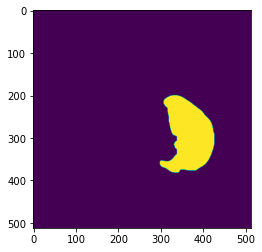

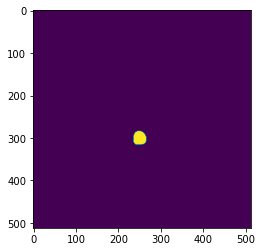

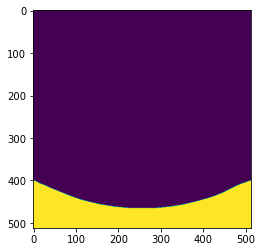

Indexes of object close to COM  are [2, 3]
 % ratio lung/white is 19.08
0 with ratio 19.08
 % ratio lung/white is 15.27
1 with ratio 15.27
Indexes of object close to COM, and with minumum tissue/lung ratio are [2, 3]


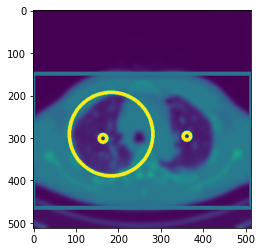

radius lung is 98.37860107421875


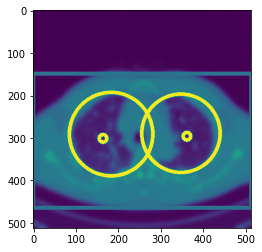

radius lung is 92.45588684082031
18862
15090


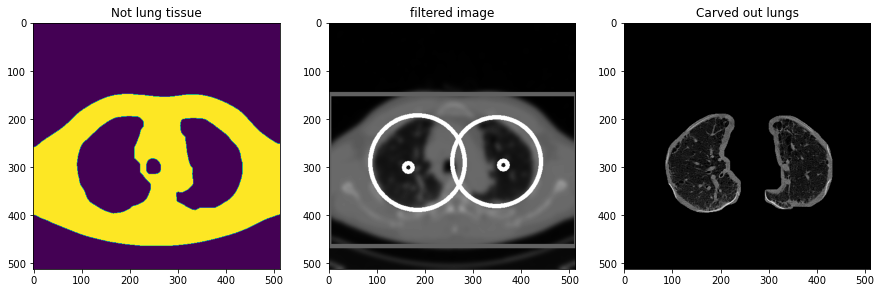

ID00012637202177665765362
[(256.47379519235335, 132.08009934541877), (261.36151688960535, 363.4331381946817)]
means are [145, 81, 0]


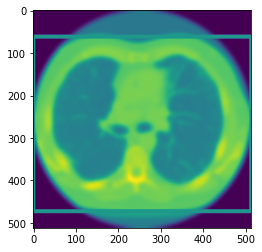

contoursdata (255.46771240234375, 257.0001220703125) 256.0328063964844
white tissue area is 98133
before 5


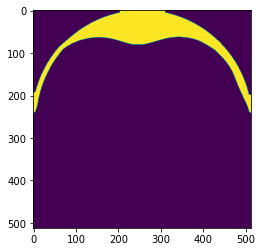

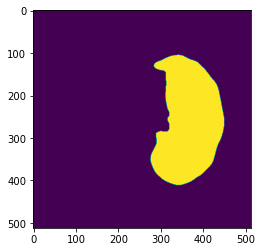

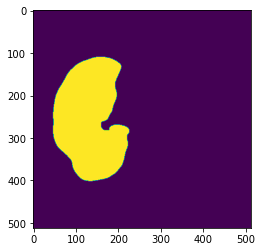

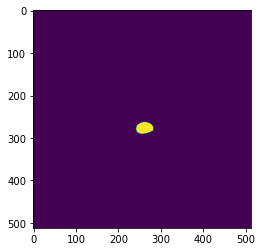

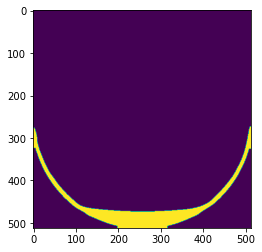

Indexes of object close to COM  are [2, 3]
 % ratio lung/white is 37.56
0 with ratio 37.56
 % ratio lung/white is 38.08
1 with ratio 38.08
Indexes of object close to COM, and with minumum tissue/lung ratio are [2, 3]


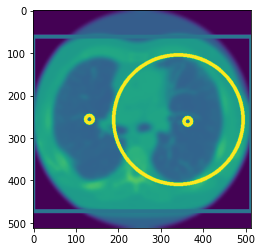

radius lung is 152.58941650390625


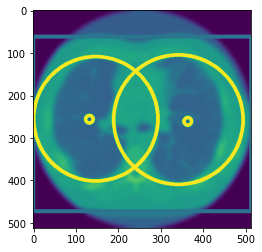

radius lung is 146.81842041015625
36861
37366


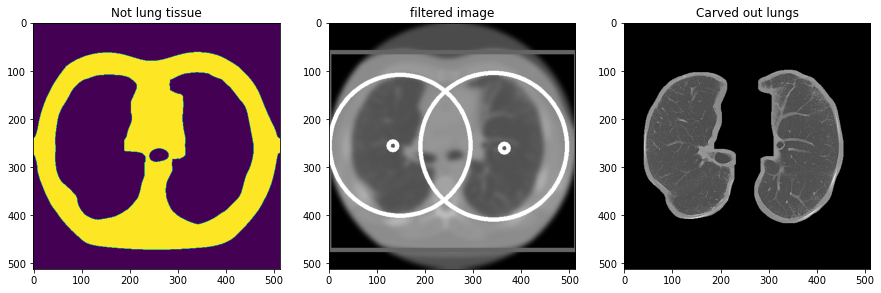

ID00014637202177757139317
[(295.3725479945398, 175.19498036474602), (304.0113357422328, 353.5081974865713)]
means are [184, 127, 0]


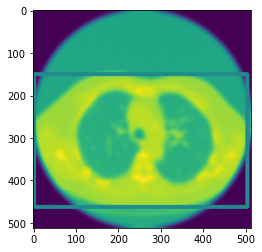

contoursdata (252.0, 276.5) 250.1805419921875
white tissue area is 78293
before 3


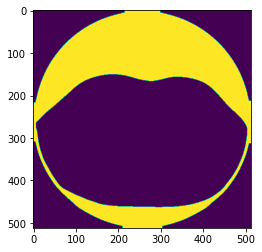

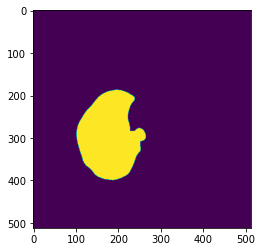

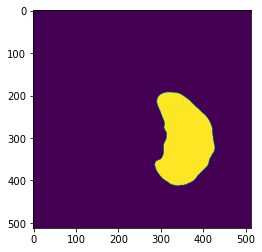

Indexes of object close to COM  are [2, 3]
 % ratio lung/white is 30.11
0 with ratio 30.11
 % ratio lung/white is 27.51
1 with ratio 27.51
Indexes of object close to COM, and with minumum tissue/lung ratio are [2, 3]


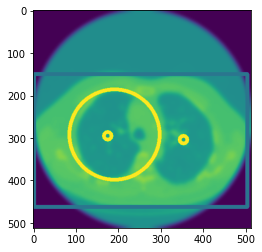

radius lung is 106.24732971191406


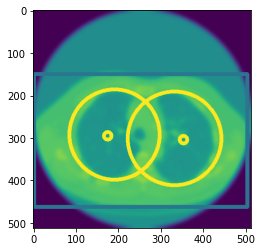

radius lung is 110.42829132080078
23572
21541


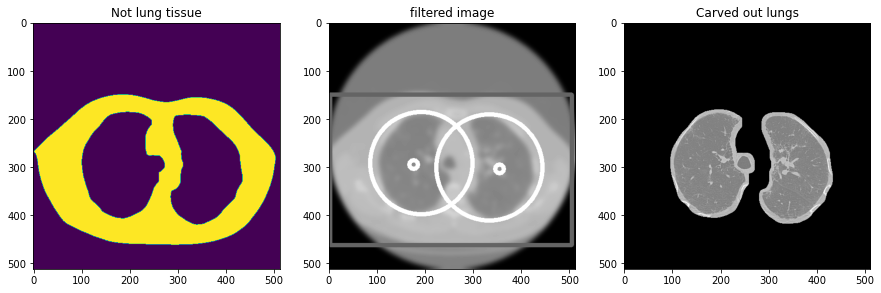

ID00015637202177877247924
[(284.43287600330126, 173.21096776769042), (281.5408425765548, 353.19832107515526)]
means are [111, 4]


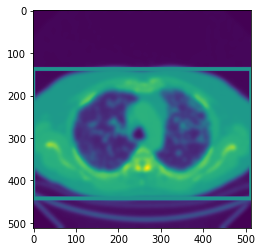

contoursdata (255.05088806152344, 290.99993896484375) 266.71148681640625
white tissue area is 95454
before 4


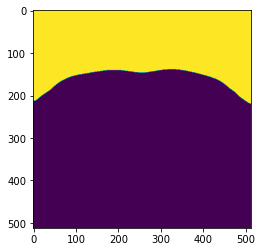

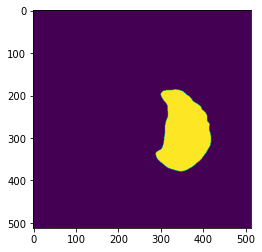

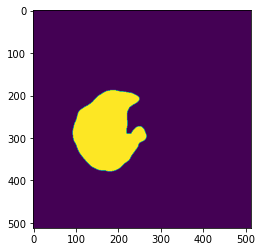

KeyboardInterrupt: 

In [178]:
# FINAL wiggle 1.5, sigma = 5 !! GOOD keep this ONE
carved_lungs_middle = {}
areas_tissues_middle = {}  #0 is lung, 1 is the soft tissue
ratios_list_middle = {}
lung_position_middle = {}

for key, im in data_im_center.items():
    orientation_lung = is_right_L_right[key]
    print(key)
    centers = centers_mass_pics_middle[key]
    print(centers)
    lungs_images, lungs_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate = carve_lung(image = images_cleaned_middle[key], centers=centers, wiggle =1.5, mean = peaks_pic_middle[key], sigma =5, is_right_right = orientation_lung, range_p= 20 , V_O_ratio=1.2)
    
    ratios_list_middle[key] = RATIOS
    carved_lungs_middle[key] = lungs_images
    lung_position_middle[key] = Location
    areas_tissues_middle[key] = list([lungs_area, white_tissue_area])

In [ ]:
plot_lung_areas_ratio(ratios_list_middle, lung_position_middle, title = 'Middle')

# Preparing pictures for CNN

In [ ]:
# data is in all_images_dataset

In [ ]:
zero_pics = {}
first_pics = {}
second_pics = {}
third_pics = {}
fourth_pics = {}
fifth_pics = {}
sixth_pics = {}
seventh_pics = {}
eighth_pics = {}

for i, j in all_images_dataset.items():
    zero_pics[i] = j[0]
    first_pics[i] = j[1]
    second_pics[i]= j[2]
    third_pics[i]= j[3]
    fourth_pics[i]= j[4]
    fifth_pics[i]= j[5]
    sixth_pics[i] = j[6]
    seventh_pics[i] = j[7]
    eighth_pics[i] = j[8]

## =======================

# ZERO LAYER 

In [ ]:
zero_peaks = {}
zero_images_clean ={}

for key, im in zero_pics.items():
    print(key)
    if key in patients_with_square:
        im = remove_square(im)  # fix the square issue
    im = normalize_shape(im)  # spit out 512 x 512 pic
    
    means = find_maxima(im, match_hist = False)
    
    zero_peaks[key] = means
    zero_images_clean[key] = im

In [ ]:

im = zero_images_clean['ID00207637202252526380974']
means = find_maxima(im, match_hist = False)
    


In [ ]:
'''#SAVE ZERO IMAGES peaks 
zero_peaks_out = open('zero_peaks.pickle', 'wb')
pickle.dump(zero_peaks, zero_peaks_out)
zero_peaks_out.close()

#SAVE ZERO cleaned IMAGES
zero_images_out = open('zero_images_cleaned.pickle','wb')
pickle.dump(zero_images_clean, zero_images_out)
zero_images_out.close()'''

In [ ]:
#LOAD ZERO IMAGES DATA
zero_peaks_IN = open('zero_peaks.pickle', 'rb')
zero_peaks = pickle.load(zero_peaks_IN)
zero_peaks_IN.close()

zero_images_IN = open('zero_images_cleaned.pickle','rb')
zero_images_clean = pickle.load(zero_images_IN)
zero_images_IN.close()

In [ ]:
#CARVE ZERO LUNGS OUT 
zero_carved_lungs = {}
zero_areas_tissues  = {}  #0 is lung, 1 is the soft tissue
zero_ratios_list = {}
zero_lung_position = {}
zero_WT_rect_coordinates = {}

for key in  zero_images_clean.keys():
    print(key)
    
    im = zero_images_clean[key]
    means = zero_peaks[key]
    centers = centers_mass_pics_middle[key]
    orientation_lung = is_right_L_right[key]
    
    lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5 ,centers=centers, mean = means,is_right_right =orientation_lung,  sigma = 5, range_p= 40 , V_O_ratio= 1.2)
    

    
    if len(lung_area) in [0,1] and key not in ['ID00322637202284842245491']:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 85 , V_O_ratio=1.36)
    
    if len(lung_area) > 2 and key not in ['ID00035637202182204917484', 'ID00398637202303897337979', 'ID00273637202271319294586', 'ID00235637202261451839085', 'ID00234637202261078001846','ID00197637202246865691526', 'ID00015637202177877247924', 'ID00180637202240177410333', 'ID00060637202187965290703', 'ID00172637202238316925179']:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 70 , V_O_ratio = 1.3)
    
    if key in ['ID00207637202252526380974']:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.6, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 1.8, range_p= 120 , V_O_ratio=1.36)
    
    if key in ['ID00038637202182690843176', 'ID00190637202244450116191', 'ID00199637202248141386743' , 'ID00365637202296085035729']:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 1, range_p= 60 , V_O_ratio=1.36)

        
    
    zero_carved_lungs[key] = lungs
    zero_areas_tissues[key]  = [lung_area, white_tissue_area]
    zero_ratios_list[key] = RATIOS
    zero_lung_position[key] = Location
    zero_WT_rect_coordinates[key] = white_tissu_rect_coordinate


In [ ]:
# CHECK the ZERO carved out images
print(len(zero_carved_lungs))
for i, j in zero_carved_lungs.items():
    print(i)
    plt.imshow(j)
    plt.show()

### SAVE ZERO LAYER DATA 

In [ ]:
'''zero_carved_lungs_OUT = open('zero carved lungs.pickle', 'wb')
pickle.dump(zero_carved_lungs, zero_carved_lungs_OUT)
zero_carved_lungs_OUT.close()

zero_areas_tissues_OUT = open('zero area tissues.pickle', 'wb')
pickle.dump(zero_areas_tissues, zero_areas_tissues_OUT)
zero_areas_tissues_OUT.close()

zero_ratios_lungs_OUT = open('zero ratio lungs.pickle', 'wb')
pickle.dump(zero_ratios_list, zero_ratios_lungs_OUT)
zero_ratios_lungs_OUT.close()

zero_lungs_position_OUT = open('zero lung positoon.pickle', 'wb')
pickle.dump(zero_lung_position, zero_lungs_position_OUT)
zero_lungs_position_OUT.close()

zero_white_tissue_coord_OUT = open('zero WT_rect coord.pickle', 'wb')
pickle.dump(zero_WT_rect_coordinates, zero_white_tissue_coord_OUT)
zero_white_tissue_coord_OUT.close()'''

### LOAD ZERO LAYER DATA 

In [179]:
zero_carved_lungs_IN = open('zero carved lungs.pickle', 'rb')
zero_carved_lungs = pickle.load(zero_carved_lungs_IN)
zero_carved_lungs_IN.close()

zero_areas_tissues_IN = open('zero area tissues.pickle', 'rb')
zero_areas_tissues = pickle.load(zero_areas_tissues_IN)
zero_areas_tissues_IN.close()

zero_ratios_lungs_IN = open('zero ratio lungs.pickle', 'rb')
zero_ratios_list = pickle.load(zero_ratios_lungs_IN)
zero_ratios_lungs_IN.close()

zero_lungs_position_IN = open('zero lung positoon.pickle', 'rb')
zero_lung_position = pickle.load(zero_lungs_position_IN)
zero_lungs_position_IN.close()

zero_white_tissue_coord_IN = open('zero WT_rect coord.pickle', 'rb')
zero_WT_rect_coordinates = pickle.load(zero_white_tissue_coord_IN)
zero_white_tissue_coord_IN.close()


C:\Users\gianl\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


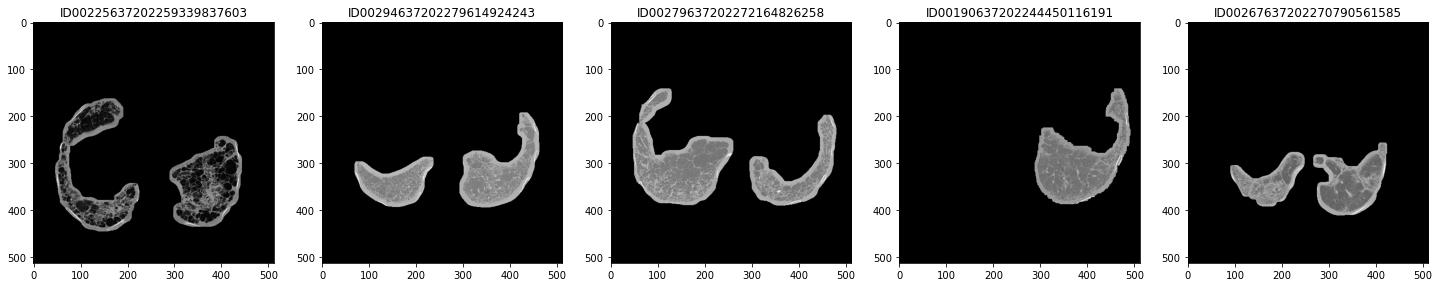

In [186]:
# print example of final carved image for this section
plt.figure(figsize = (25,5))
plt.subplot(1,5,1)
for i in range(5):
    pat_id  = patients_LIST[np.random.randint(0,173)]
    plt.subplot(1, 5,i+1)
    plt.title(pat_id)
    plt.imshow(zero_carved_lungs[pat_id], cmap = 'gray')
plt.show()

======================================

# FIRST LAYER 

In [ ]:
first_peaks = {}
first_images_clean ={}

for key, im in first_pics.items():
    print(key)
    if key in patients_with_square:
        im = remove_square(im)  # fix the square issue
    im = normalize_shape(im)  # spit out 512 x 512 pic
    
    means = find_maxima(im, match_hist = False)
    
    first_peaks[key] = means
    first_images_clean[key] = im


In [ ]:
'''#SAVE FIRST IMAGES peaks 
first_peaks_out = open('first_peaks.pickle', 'wb')
pickle.dump(first_peaks, first_peaks_out)
first_peaks_out.close()

#SAVE FIRST cleaned IMAGES 
first_images_out = open('first_images_cleaned.pickle','wb')
pickle.dump(first_images_clean, first_images_out)
first_images_out.close()'''

In [ ]:
#LOAD FIRST IMAGES DATA
first_peaks_IN = open('first_peaks.pickle', 'rb')
first_peaks = pickle.load(first_peaks_IN)
first_peaks_IN.close()

#LOAD FIRST cleaned IMAGES 
first_images_IN = open('first_images_cleaned.pickle','rb')
first_images_clean = pickle.load(first_images_IN)
first_images_IN.close()
len(first_images_clean)

In [ ]:
#CARVE FIRST LUNGS OUT 
first_carved_lungs = {}
first_areas_tissues  = {}  #0 is lung, 1 is the soft tissue
first_ratios_list = {}
first_lung_position = {}
first_WT_rect_coordinates = {}

for key in first_images_clean.keys():
    print(key)
    
    im = first_images_clean[key]
    means = first_peaks[key]
    centers = centers_mass_pics_middle[key]
    orientation_lung = is_right_L_right[key]
    
    lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5 ,centers=centers, mean = means,is_right_right =orientation_lung,  sigma = 5, range_p= 40 , V_O_ratio= 1.2)
    
    if len(lung_area) in [0,1] and key not in ['ID00135637202224630271439']:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 81.5 , V_O_ratio=1.36)
    
    if len(lung_area) > 2 and key not in ['ID00210637202257228694086']:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 60 , V_O_ratio = 1.3)

    if key in ['ID00026637202179561894768']:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 90 , V_O_ratio = 1.3)
       
    if key in ['ID00135637202224630271439']:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 60 , V_O_ratio = 1.3)
       
    first_carved_lungs[key] = lungs
    first_areas_tissues[key]  = [lung_area, white_tissue_area]
    first_ratios_list[key] = RATIOS
    first_lung_position[key] = Location
    first_WT_rect_coordinates[key] = white_tissu_rect_coordinate


In [ ]:
# CHECK the FIRST carved out images
print(len(first_carved_lungs))
for i, j in first_carved_lungs.items():
    print(i)
    plt.imshow(j)
    plt.show()

### SAVE FIRST LAYER DATA    -   PERFECT CARVING 10-13 

In [ ]:
'''first_carved_lungs_OUT = open('1st carved lungs.pickle', 'wb')
pickle.dump(first_carved_lungs, first_carved_lungs_OUT)
first_carved_lungs_OUT.close()

first_areas_tissues_OUT = open('1st area tissues.pickle', 'wb')
pickle.dump(first_areas_tissues, first_areas_tissues_OUT)
first_areas_tissues_OUT.close()

first_ratios_lungs_OUT = open('1st ratio lungs.pickle', 'wb')
pickle.dump(first_ratios_list, first_ratios_lungs_OUT)
first_ratios_lungs_OUT.close()

first_lungs_position_OUT = open('1st lung positoon.pickle', 'wb')
pickle.dump(first_lung_position, first_lungs_position_OUT)
first_lungs_position_OUT.close()

first_white_tissue_coord_OUT = open('1st WT_rect coord.pickle', 'wb')
pickle.dump(first_WT_rect_coordinates, first_white_tissue_coord_OUT)
first_white_tissue_coord_OUT.close()'''

### LOAD FIRST LAYER DATA 

In [187]:
first_carved_lungs_IN = open('1st carved lungs.pickle', 'rb')
first_carved_lungs = pickle.load(first_carved_lungs_IN)
first_carved_lungs_IN.close()

first_areas_tissues_IN = open('1st area tissues.pickle', 'rb')
first_areas_tissues = pickle.load(first_areas_tissues_IN)
first_areas_tissues_IN.close()

first_ratios_lungs_IN = open('1st ratio lungs.pickle', 'rb')
first_ratios_list = pickle.load(first_ratios_lungs_IN)
first_ratios_lungs_IN.close()

first_lungs_position_IN = open('1st lung positoon.pickle', 'rb')
first_lung_position = pickle.load(first_lungs_position_IN)
first_lungs_position_IN.close()

first_white_tissue_coord_IN = open('1st WT_rect coord.pickle', 'rb')
first_WT_rect_coordinates = pickle.load(first_white_tissue_coord_IN)
first_white_tissue_coord_IN.close()


C:\Users\gianl\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


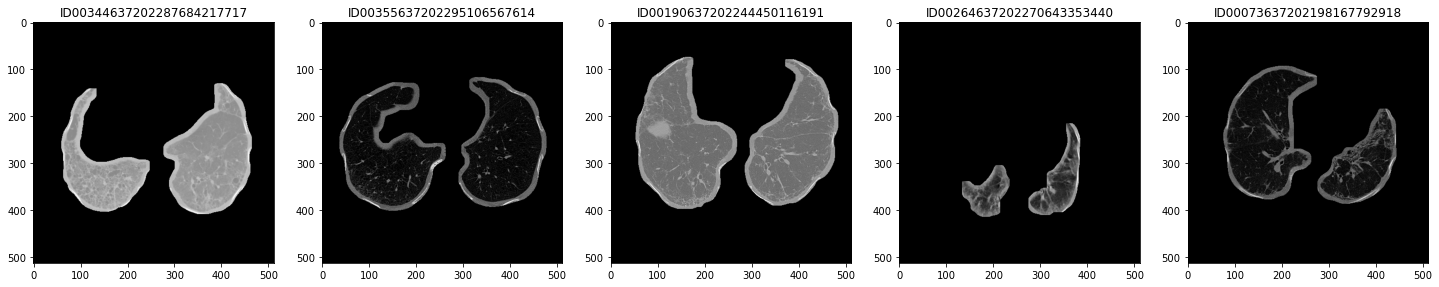

In [188]:
# print example of final carved image for this section
plt.figure(figsize = (25,5))
plt.subplot(1,5,1)
for i in range(5):
    pat_id  = patients_LIST[np.random.randint(0,173)]
    plt.subplot(1, 5,i+1)
    plt.title(pat_id)
    plt.imshow(first_carved_lungs[pat_id], cmap = 'gray')
plt.show()

======================================

# SECOND LAYER 

In [ ]:
second_peaks = {}
secomd_images_clean ={}

for key, im in second_pics.items():
    print(key)
    if key in patients_with_square:
        im = remove_square(im)  # fix the square issue
    im = normalize_shape(im)  # spit out 512 x 512 pic
    
    means = find_maxima(im, match_hist = False)
    
    second_peaks[key] = means
    secomd_images_clean[key] = im 

In [ ]:
'''#SAVE SECOND IMAGES peaks
second_peaks_out = open('second_peaks.pickle', 'wb')
pickle.dump(second_peaks, second_peaks_out)
second_peaks_out.close()

#SAVE SECOND cleaned IMAGES
second_images_out = open('second_images_cleaned.pickle','wb')
pickle.dump(secomd_images_clean, second_images_out)
second_images_out.close()'''

In [ ]:
#LOAD SECOND IMAGES DATA
second_peaks_IN = open('second_peaks.pickle', 'rb')
second_peaks = pickle.load(second_peaks_IN)
second_peaks_IN.close()

second_images_IN = open('second_images_cleaned.pickle','rb')
secomd_images_clean = pickle.load(second_images_IN)
second_images_IN.close()
len(secomd_images_clean)

In [ ]:
# CARVE SECOND LUNGS OUT 
second_carved_lungs = {}
second_areas_tissues  = {}  #0 is lung, 1 is the soft tissue
second_ratios_list = {}
second_lung_position = {}
second_WT_rect_coordinates = {}

for key in secomd_images_clean.keys():
    print(key)
    
    im = secomd_images_clean[key]
    means = second_peaks[key]
    centers = centers_mass_pics_middle[key]
    orientation_lung = is_right_L_right[key]
    
    
    
    lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5 ,centers=centers, mean = means,is_right_right =orientation_lung,  sigma = 5, range_p= 40 , V_O_ratio= 1.2)
    
    if len(lung_area) in [0,1]:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 72 , V_O_ratio=1.3)
    
    if len(lung_area) > 2:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 60 , V_O_ratio = 1.3)

    second_carved_lungs[key] = lungs
    second_areas_tissues[key]  = [lung_area, white_tissue_area]
    second_ratios_list[key] = RATIOS
    second_lung_position[key] = Location
    second_WT_rect_coordinates[key] = white_tissu_rect_coordinate


In [ ]:
# CHECK the SECOND carved out images
for i, j in second_carved_lungs.items():
    print(i)
    plt.imshow(j)
    plt.show()

### SAVE SECOND LAYER DATA - PERFECT CARVING 10-13

In [ ]:
'''second_carved_lungs_OUT = open('2nd carved lungs.pickle', 'wb')
pickle.dump(second_carved_lungs, second_carved_lungs_OUT)
second_carved_lungs_OUT.close()

second_areas_tissues_OUT = open('2nd area tissues.pickle', 'wb')
pickle.dump(second_areas_tissues, second_areas_tissues_OUT)
second_areas_tissues_OUT.close()

second_ratios_lungs_OUT = open('2nd ratio lungs.pickle', 'wb')
pickle.dump(second_ratios_list, second_ratios_lungs_OUT)
second_ratios_lungs_OUT.close()

second_lungs_position_OUT = open('2nd lung positoon.pickle', 'wb')
pickle.dump(second_lung_position, second_lungs_position_OUT)
second_lungs_position_OUT.close()

second_white_tissue_coord_OUT = open('2nd WT_rect coord.pickle', 'wb')
pickle.dump(second_WT_rect_coordinates, second_white_tissue_coord_OUT)
second_white_tissue_coord_OUT.close()'''

### LOAD SECOND LAYER DATA 

In [189]:
second_carved_lungs_IN = open('2nd carved lungs.pickle', 'rb')
second_carved_lungs = pickle.load(second_carved_lungs_IN)
second_carved_lungs_IN.close()

second_areas_tissues_IN = open('2nd area tissues.pickle', 'rb')
second_areas_tissues = pickle.load(second_areas_tissues_IN)
second_areas_tissues_IN.close()

second_ratios_lungs_IN = open('2nd ratio lungs.pickle', 'rb')
second_ratios_list = pickle.load(second_ratios_lungs_IN)
second_ratios_lungs_IN.close()

second_lungs_position_IN = open('2nd lung positoon.pickle', 'rb')
second_lung_position = pickle.load(second_lungs_position_IN)
second_lungs_position_IN.close()

second_white_tissue_coord_IN = open('2nd WT_rect coord.pickle', 'rb')
second_WT_rect_coordinates = pickle.load(second_white_tissue_coord_IN)
second_white_tissue_coord_IN.close()
  

C:\Users\gianl\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


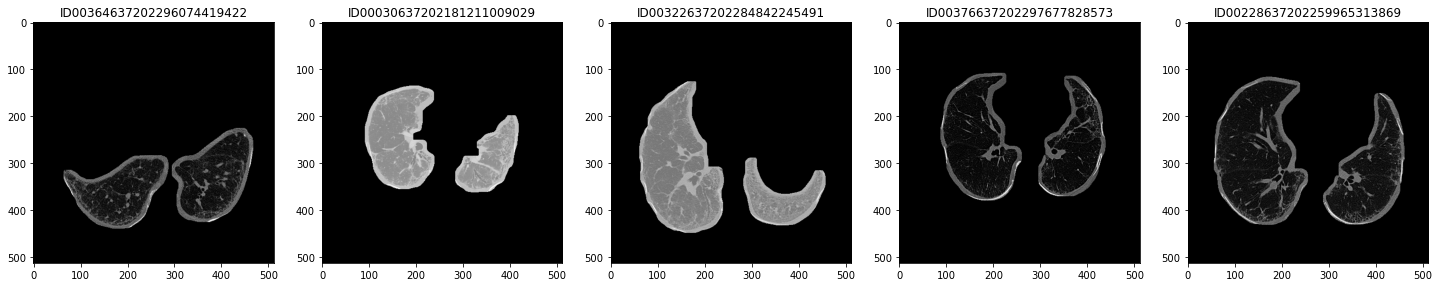

In [192]:
# print example of final carved image for this section
plt.figure(figsize = (25,5))
plt.subplot(1,5,1)
for i in range(5):
    pat_id  = patients_LIST[np.random.randint(0,173)]
    plt.subplot(1, 5,i+1)
    plt.title(pat_id)
    plt.imshow(second_carved_lungs[pat_id], cmap = 'gray')
plt.show()

=================================

# THIRD LAYER 

In [ ]:
third_peaks = {}
third_images_clean ={}

for key, im in third_pics.items():
    print(key)
    if key in patients_with_square:
        im = remove_square(im)  # fix the square issue
    im = normalize_shape(im)  # spit out 512 x 512 pic
    
    means = find_maxima(im, match_hist = False)
    
    third_peaks[key] = means
    third_images_clean[key] = im 

In [ ]:
'''#SAVE THIRD IMAGES peaks
third_peaks_out = open('third_peaks.pickle', 'wb')
pickle.dump(third_peaks, third_peaks_out)
third_peaks_out.close()

# PICKLE THIRD image data 
third_images_out = open('third_images_cleaned.pickle','wb')
pickle.dump(third_images_clean, third_images_out)
third_images_out.close()'''

In [ ]:
#LOAD THIRD PEAKS DATA
third_peaks_IN = open('third_peaks.pickle', 'rb')
third_peaks = pickle.load(third_peaks_IN)
third_peaks_IN.close()

#LOAD THIRD IMAGES DATA
third_images_IN = open('third_images_cleaned.pickle','rb')
third_images_clean = pickle.load(third_images_IN)
third_images_IN.close()

len(third_images_clean)

In [ ]:
third_carved_lungs = {}
third_areas_tissues  = {}  #0 is lung, 1 is the soft tissue
third_ratios_list = {}
third_lung_position = {}
third_WT_rect_coordinates = {}

for key, im in third_images_clean.items():
    print(key)
    
    im = third_images_clean[key]
    means = third_peaks[key]
    centers = centers_mass_pics_middle[key]
    orientation_lung = is_right_L_right[key]
    
    
    
    lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5 ,centers=centers, mean = means,is_right_right =orientation_lung,  sigma = 5, range_p= 40 , V_O_ratio= 1.2)
    
    if len(lung_area) in [0,1]:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 72 , V_O_ratio=1.3)
    
    if len(lung_area) > 2:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 60 , V_O_ratio = 1.3)


    third_carved_lungs[key] = lungs
    third_areas_tissues[key]  = [lung_area, white_tissue_area]
    third_ratios_list[key] = RATIOS
    third_lung_position[key] = Location
    third_WT_rect_coordinates[key] = white_tissu_rect_coordinate



In [ ]:
# CHECK the THIRD carved out images

for i,j in third_carved_lungs.items():
    print(i)
    plt.imshow(j)
    plt.show()

### THIRD DATA SAVE - PERFECT CARVING 10-13

In [ ]:
'''third_carved_lungs_OUT = open('3rd carved lungs.pickle', 'wb')
pickle.dump(third_carved_lungs, third_carved_lungs_OUT)
third_carved_lungs_OUT.close()

third_areas_tissues_OUT = open('3rd area tissues.pickle', 'wb')
pickle.dump(third_areas_tissues, third_areas_tissues_OUT)
third_areas_tissues_OUT.close()

third_ratios_lungs_OUT = open('3rd ratio lungs.pickle', 'wb')
pickle.dump(third_ratios_list, third_ratios_lungs_OUT)
third_ratios_lungs_OUT.close()

third_lungs_position_OUT = open('3rd lung positoon.pickle', 'wb')
pickle.dump(third_lung_position, third_lungs_position_OUT)
third_lungs_position_OUT.close()

third_white_tissue_coord_OUT = open('3rd WT_rect coord.pickle', 'wb')
pickle.dump(third_WT_rect_coordinates, third_white_tissue_coord_OUT)
third_white_tissue_coord_OUT.close()'''

### THIRD DATA LOAD

In [193]:
third_carved_lungs_IN = open('3rd carved lungs.pickle', 'rb')
third_carved_lungs = pickle.load(third_carved_lungs_IN)
third_carved_lungs_IN.close()

third_areas_tissues_IN = open('3rd area tissues.pickle', 'rb')
third_areas_tissues = pickle.load(third_areas_tissues_IN)
third_areas_tissues_IN.close()

third_ratios_lungs_IN = open('3rd ratio lungs.pickle', 'rb')
third_ratios_list = pickle.load(third_ratios_lungs_IN)
third_ratios_lungs_IN.close()

third_lungs_position_IN = open('3rd lung positoon.pickle', 'rb')
third_lung_position = pickle.load(third_lungs_position_IN)
third_lungs_position_IN.close()

third_white_tissue_coord_IN = open('3rd WT_rect coord.pickle', 'rb')
third_WT_rect_coordinates = pickle.load(third_white_tissue_coord_IN)
third_white_tissue_coord_IN.close()



C:\Users\gianl\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


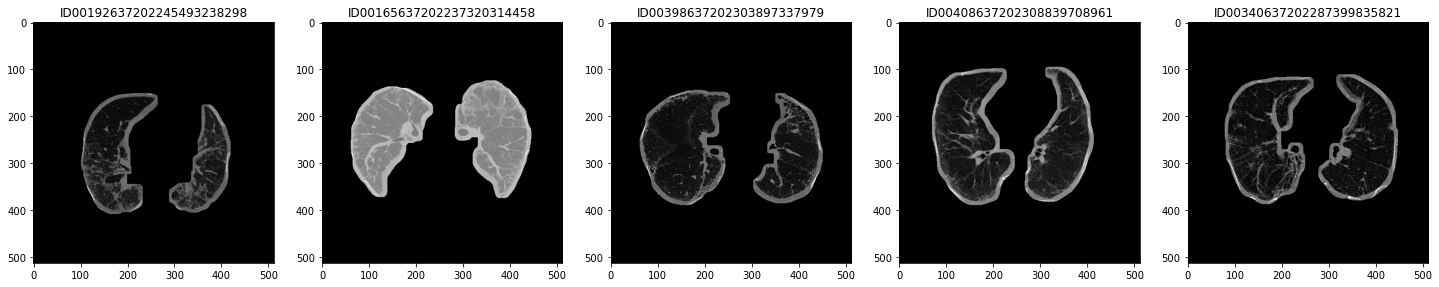

In [194]:
# print example of final carved image for this section
plt.figure(figsize = (25,5))
plt.subplot(1,5,1)
for i in range(5):
    pat_id  = patients_LIST[np.random.randint(0,173)]
    plt.subplot(1, 5,i+1)
    plt.title(pat_id)
    plt.imshow(third_carved_lungs[pat_id], cmap = 'gray')
plt.show()

=============================

# FOURTH LAYER 

In [ ]:
fourth_peaks = {}
fourth_images_clean ={}

for key, im in fourth_pics.items():
    print(key)
    if key in patients_with_square:
        im = remove_square(im)  # fix the square issue
    im = normalize_shape(im)  # spit out 512 x 512 pic
    
    means = find_maxima(im, match_hist = False)
    
    fourth_peaks[key] = means
    fourth_images_clean[key] = im 

In [ ]:
'''#SAVE FOURTH IMAGES peaks
fourth_peaks_out = open('fourth_peaks.pickle', 'wb')
pickle.dump(fourth_peaks, fourth_peaks_out)
fourth_peaks_out.close()

#SAVE FOURTH cleaned IMAGES
fourth_images_out = open('fourth_images_cleaned.pickle','wb')
pickle.dump(fourth_images_clean, fourth_images_out)
fourth_images_out.close()'''

In [ ]:
#LOAD FOURTH IMAGES peaks
fourth_peaks_IN = open('fourth_peaks.pickle', 'rb')
fourth_peaks = pickle.load(fourth_peaks_IN)
fourth_peaks_IN.close()

#LOAD FOURTH cleaned IMAGES
fourth_images_IN = open('fourth_images_cleaned.pickle','rb')
fourth_images_clean = pickle.load(fourth_images_IN)
fourth_images_IN.close()

In [ ]:
# CARVE OUt FOURTH LUNGS
fourth_carved_lungs = {}
fourth_areas_tissues  = {}  #0 is lung, 1 is the soft tissue
fourth_ratios_list = {}
fourth_lung_position = {}
fourth_WT_rect_coordinates = {}

for key in fourth_images_clean.keys():
    print(key)
    
    im = fourth_images_clean[key]
    means = fourth_peaks[key]
    centers = centers_mass_pics_middle[key]
    orientation_lung = is_right_L_right[key]
    
    
    
    lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5 ,centers=centers, mean = means,is_right_right =orientation_lung,  sigma = 5, range_p= 40 , V_O_ratio= 1.2)
    
    if len(lung_area) in [0,1]:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 72 , V_O_ratio=1.3)
    
    if len(lung_area) > 2:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 60 , V_O_ratio = 1.3)


    fourth_carved_lungs[key] = lungs
    fourth_areas_tissues[key]  = [lung_area, white_tissue_area]
    fourth_ratios_list[key] = RATIOS
    fourth_lung_position[key] = Location
    fourth_WT_rect_coordinates[key] = white_tissu_rect_coordinate


In [ ]:
# CHECK the FOURTH carved out images

for i, j in fourth_carved_lungs.items():
    print(i)
    plt.imshow(j, cmap = 'gray')
    plt.show()

### FOURTH DATA SAVE - PERFECT CARVING 10-13

In [ ]:
'''fourth_carved_lungs_OUT = open('4th carved lungs.pickle', 'wb')
pickle.dump(fourth_carved_lungs, fourth_carved_lungs_OUT)
fourth_carved_lungs_OUT.close()

fourth_areas_tissues_OUT = open('4th area tissues.pickle', 'wb')
pickle.dump(fourth_areas_tissues, fourth_areas_tissues_OUT)
fourth_areas_tissues_OUT.close()

fourth_ratios_lungs_OUT = open('4th ratio lungs.pickle', 'wb')
pickle.dump(fourth_ratios_list, fourth_ratios_lungs_OUT)
fourth_ratios_lungs_OUT.close()

fourth_lungs_position_OUT = open('4th lung positoon.pickle', 'wb')
pickle.dump(fourth_lung_position, fourth_lungs_position_OUT)
fourth_lungs_position_OUT.close()

fourth_white_tissue_coord_OUT = open('4th WT_rect coord.pickle', 'wb')
pickle.dump(fourth_WT_rect_coordinates, fourth_white_tissue_coord_OUT)
fourth_white_tissue_coord_OUT.close()'''

### FOURTH DATA LOAD

In [196]:
fourth_carved_lungs_IN = open('4th carved lungs.pickle', 'rb')
fourth_carved_lungs = pickle.load(fourth_carved_lungs_IN)
fourth_carved_lungs_IN.close()

fourth_areas_tissues_IN = open('4th area tissues.pickle', 'rb')
fourth_areas_tissues = pickle.load(fourth_areas_tissues_IN)
fourth_areas_tissues_IN.close()

fourth_ratios_lungs_IN = open('4th ratio lungs.pickle', 'rb')
fourth_ratios_list = pickle.load(fourth_ratios_lungs_IN)
fourth_ratios_lungs_IN.close()

fourth_lungs_position_IN = open('4th lung positoon.pickle', 'rb')
fourth_lung_position = pickle.load(fourth_lungs_position_IN)
fourth_lungs_position_IN.close()

fourth_white_tissue_coord_IN = open('4th WT_rect coord.pickle', 'rb')
fourth_WT_rect_coordinates = pickle.load(fourth_white_tissue_coord_IN)
fourth_white_tissue_coord_IN.close()


C:\Users\gianl\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


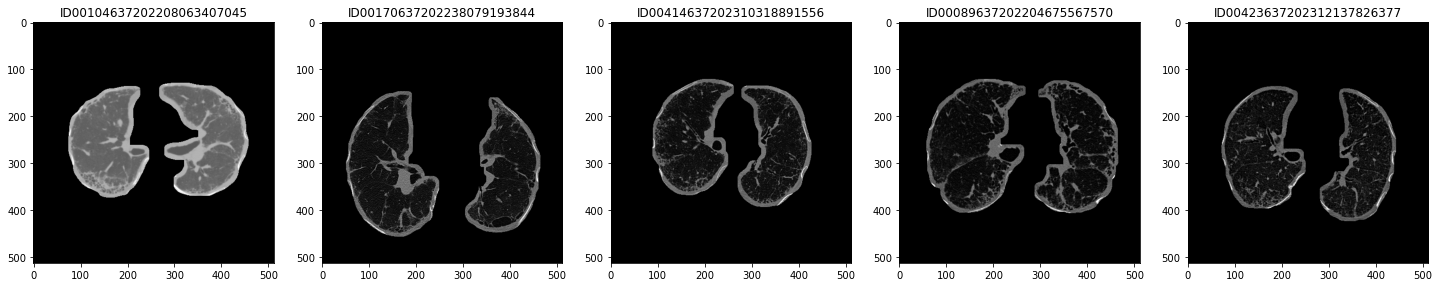

In [197]:
# print example of final carved image for this section
plt.figure(figsize = (25,5))
plt.subplot(1,5,1)
for i in range(5):
    pat_id  = patients_LIST[np.random.randint(0,173)]
    plt.subplot(1, 5,i+1)
    plt.title(pat_id)
    plt.imshow(fourth_carved_lungs[pat_id], cmap = 'gray')
plt.show()

=======================================

# FIFTH LAYER 

In [ ]:
fifth_peaks = {}
fifth_images_clean ={}

for key, im in fifth_pics.items():
    print(key)
    if key in patients_with_square:
        im = remove_square(im)  # fix the square issue
    im = normalize_shape(im)  # spit out 512 x 512 pic
    
    means = find_maxima(im, match_hist = False)
    
    fifth_peaks[key] = means
    fifth_images_clean[key] = im 

In [ ]:
'''#SAVE FIFTH IMAGES peaks
fifth_peaks_out = open('fifth_peaks.pickle', 'wb')
pickle.dump(fifth_peaks, fifth_peaks_out)
fifth_peaks_out.close()

#SAVE FIFTH cleaned IMAGES
fifth_images_out = open('fifth_images_cleaned.pickle','wb')
pickle.dump(fifth_images_clean, fifth_images_out)
fifth_images_out.close()'''

In [ ]:
#LOAD FIFTH IMAGES peaks
fifth_peaks_IN = open('fifth_peaks.pickle', 'rb')
fifth_peaks = pickle.load(fifth_peaks_IN)
fifth_peaks_IN.close()

#LOAD FIFTH cleaned IMAGES
fifth_images_IN = open('fifth_images_cleaned.pickle','rb')
fifth_images_clean = pickle.load(fifth_images_IN)
fifth_images_IN.close()

In [ ]:
# CARVE OUt FIFTH LUNGS
fifth_carved_lungs = {}
fifth_areas_tissues  = {}  #0 is lung, 1 is the soft tissue
fifth_ratios_list = {}
fifth_lung_position = {}
fifth_WT_rect_coordinates = {}

for key in fifth_images_clean.keys():
    print(key)
    
    means = fifth_peaks[key]
    im = fifth_images_clean[key]
    centers = centers_mass_pics_middle[key]
    orientation_lung = is_right_L_right[key]
    
    lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5 ,centers=centers, mean = means,is_right_right =orientation_lung,  sigma = 5, range_p= 40 , V_O_ratio= 1.2)
    
    if len(lung_area) in [0,1]:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 72 , V_O_ratio=1.3)
    
    if len(lung_area) > 2:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 60 , V_O_ratio = 1.3)

    fifth_carved_lungs[key] = lungs
    fifth_areas_tissues[key]  = [lung_area, white_tissue_area]
    fifth_ratios_list[key] = RATIOS
    fifth_lung_position[key] = Location
    fifth_WT_rect_coordinates[key] = white_tissu_rect_coordinate

In [ ]:
# CHECK the FIFTH carved out images
for i, j in fifth_carved_lungs.items():
    print(i)
    plt.imshow(j, cmap = 'gray')
    plt.show()

### SAVE FIFTH DATA - PERFECT CARVING 10-13

In [ ]:
'''fifth_carved_lungs_OUT = open('5th carved lungs.pickle', 'wb')
pickle.dump(fifth_carved_lungs, fifth_carved_lungs_OUT)
fifth_carved_lungs_OUT.close()

fifth_areas_tissues_OUT = open('5th area tissues.pickle', 'wb')
pickle.dump(fifth_areas_tissues, fifth_areas_tissues_OUT)
fifth_areas_tissues_OUT.close()

fifth_ratios_lungs_OUT = open('5th ratio lungs.pickle', 'wb')
pickle.dump(fifth_ratios_list, fifth_ratios_lungs_OUT)
fifth_ratios_lungs_OUT.close()

fifth_lungs_position_OUT = open('5th lung positoon.pickle', 'wb')
pickle.dump(fifth_lung_position, fifth_lungs_position_OUT)
fifth_lungs_position_OUT.close()

fifth_white_tissue_coord_OUT = open('5th WT_rect coord.pickle', 'wb')
pickle.dump(fifth_WT_rect_coordinates, fifth_white_tissue_coord_OUT)
fifth_white_tissue_coord_OUT.close()'''

### LOAD FIFTH DATA

In [199]:
# OPEN 5th tissue info 

fifth_carved_lungs_IN = open('5th carved lungs.pickle', 'rb')
fifth_carved_lungs = pickle.load(fifth_carved_lungs_IN)
fifth_carved_lungs_IN.close()

fifth_areas_tissues_IN = open('5th area tissues.pickle', 'rb')
fifth_areas_tissues = pickle.load(fifth_areas_tissues_IN)
fifth_areas_tissues_IN.close()

fifth_ratios_lungs_IN = open('5th ratio lungs.pickle', 'rb')
fifth_ratios_list = pickle.load(fifth_ratios_lungs_IN)
fifth_ratios_lungs_IN.close()

fifth_lungs_position_IN = open('5th lung positoon.pickle', 'rb')
fifth_lung_position = pickle.load(fifth_lungs_position_IN)
fifth_lungs_position_IN.close()

fifth_white_tissue_coord_IN = open('5th WT_rect coord.pickle', 'rb')
fifth_WT_rect_coordinates = pickle.load(fifth_white_tissue_coord_IN)
fifth_white_tissue_coord_IN.close()

C:\Users\gianl\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


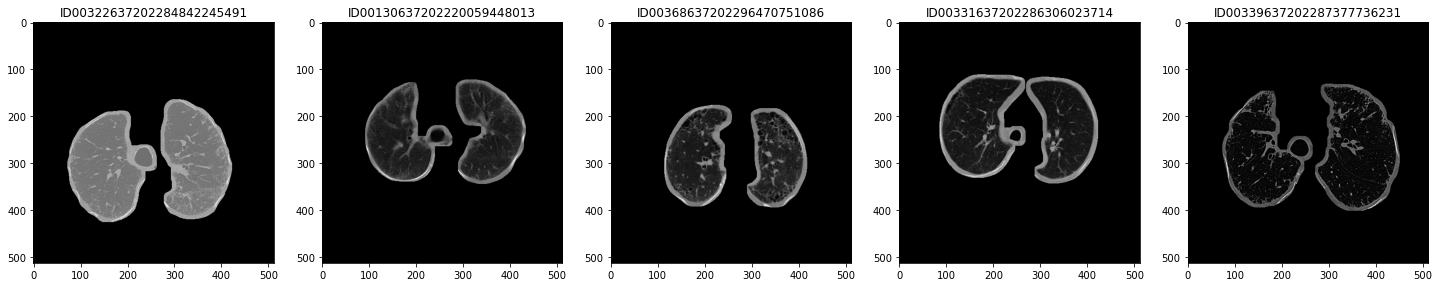

In [200]:
# print example of final carved image for this section
plt.figure(figsize = (25,5))
plt.subplot(1,5,1)
for i in range(5):
    pat_id  = patients_LIST[np.random.randint(0,173)]
    plt.subplot(1, 5,i+1)
    plt.title(pat_id)
    plt.imshow(fifth_carved_lungs[pat_id], cmap = 'gray')
plt.show()

=================================================

# SIXTH LAYER 

In [ ]:
sixth_peaks = {}
sixth_images_clean ={}

for key, im in sixth_pics.items():
    print(key)
    if key in patients_with_square:
        im = remove_square(im)  # fix the square issue
    im = normalize_shape(im)  # spit out 512 x 512 pic
    
    means = find_maxima(im, match_hist = False)
    
    sixth_peaks[key] = means
    sixth_images_clean[key] = im


In [ ]:
'''#SAVE SIXTH IMAGES peaks
sixth_peaks_out = open('sixth_peaks.pickle', 'wb')
pickle.dump(sixth_peaks, sixth_peaks_out)
sixth_peaks_out.close()

#SAVE SIXTH cleaned IMAGES
sixth_images_out = open('sixth_images_cleaned.pickle','wb')
pickle.dump(sixth_images_clean, sixth_images_out)
sixth_images_out.close()'''

In [312]:
#LOAD SIXTH IMAGES peaks
sixth_peaks_IN = open('sixth_peaks.pickle', 'rb')
sixth_peaks = pickle.load(sixth_peaks_IN)
sixth_peaks_IN.close()

#LOAD SIXTH cleaned IMAGES
sixth_images_IN = open('sixth_images_cleaned.pickle','rb')
sixth_images_clean = pickle.load(sixth_images_IN)
sixth_images_IN.close()

In [ ]:
# CARVE OUT SIXTH LUNGS
sixth_carved_lungs = {}
sixth_areas_tissues  = {}  #0 is lung, 1 is the soft tissue
sixth_ratios_list = {}
sixth_lung_position = {}
sixth_WT_rect_coordinates = {}

for key in sixth_images_clean.keys():
    print(key)
    
    means = sixth_peaks[key]
    im = sixth_images_clean[key]
    centers = centers_mass_pics_middle[key]
    orientation_lung = is_right_L_right[key]
    
    
    
    lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5 ,centers=centers, mean = means,is_right_right =orientation_lung,  sigma = 5, range_p= 40 , V_O_ratio= 1.2)
    
    if len(lung_area) in [0,1]:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 72 , V_O_ratio=1.3)
    
    if len(lung_area) > 2:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 60 , V_O_ratio = 1.3)


    sixth_carved_lungs[key] = lungs
    sixth_areas_tissues[key]  = [lung_area, white_tissue_area]
    sixth_ratios_list[key] = RATIOS
    sixth_lung_position[key] = Location
    sixth_WT_rect_coordinates[key] = white_tissu_rect_coordinate


In [ ]:
# CHECK the SIXTH carved out images

for i, j in sixth_carved_lungs.items():
    print(i)
    plt.imshow(j, cmap = 'gray')
    plt.show()


### SAVE SIXTH DATA - PERFECT CARVING 10-13 

In [ ]:
'''sixth_carved_lungs_OUT = open('6th carved lungs.pickle', 'wb')
pickle.dump(sixth_carved_lungs, sixth_carved_lungs_OUT)
sixth_carved_lungs_OUT.close()

sixth_areas_tissues_OUT = open('6th area tissues.pickle', 'wb')
pickle.dump(sixth_areas_tissues, sixth_areas_tissues_OUT)
sixth_areas_tissues_OUT.close()

sixth_ratios_lungs_OUT = open('6th ratio lungs.pickle', 'wb')
pickle.dump(sixth_ratios_list, sixth_ratios_lungs_OUT)
sixth_ratios_lungs_OUT.close()

sixth_lungs_position_OUT = open('6th lung positoon.pickle', 'wb')
pickle.dump(sixth_lung_position, sixth_lungs_position_OUT)
sixth_lungs_position_OUT.close()

sixth_white_tissue_coord_OUT = open('6th WT_rect coord.pickle', 'wb')
pickle.dump(sixth_WT_rect_coordinates, sixth_white_tissue_coord_OUT)
sixth_white_tissue_coord_OUT.close()'''

### LOAD SIXTH DATA 

In [201]:
# OPEN 6th tissue info 

sixth_carved_lungs_IN = open('6th carved lungs.pickle', 'rb')
sixth_carved_lungs = pickle.load(sixth_carved_lungs_IN)
sixth_carved_lungs_IN.close()

sixth_areas_tissues_IN = open('6th area tissues.pickle', 'rb')
sixth_areas_tissues = pickle.load(sixth_areas_tissues_IN)
sixth_areas_tissues_IN.close()

sixth_ratios_lungs_IN = open('6th ratio lungs.pickle', 'rb')
sixth_ratios_list = pickle.load(sixth_ratios_lungs_IN)
sixth_ratios_lungs_IN.close()

sixth_lungs_position_IN = open('6th lung positoon.pickle', 'rb')
sixth_lung_position = pickle.load(sixth_lungs_position_IN)
sixth_lungs_position_IN.close()

sixth_white_tissue_coord_IN = open('6th WT_rect coord.pickle', 'rb')
sixth_WT_rect_coordinates = pickle.load(sixth_white_tissue_coord_IN)
sixth_white_tissue_coord_IN.close()


174

C:\Users\gianl\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


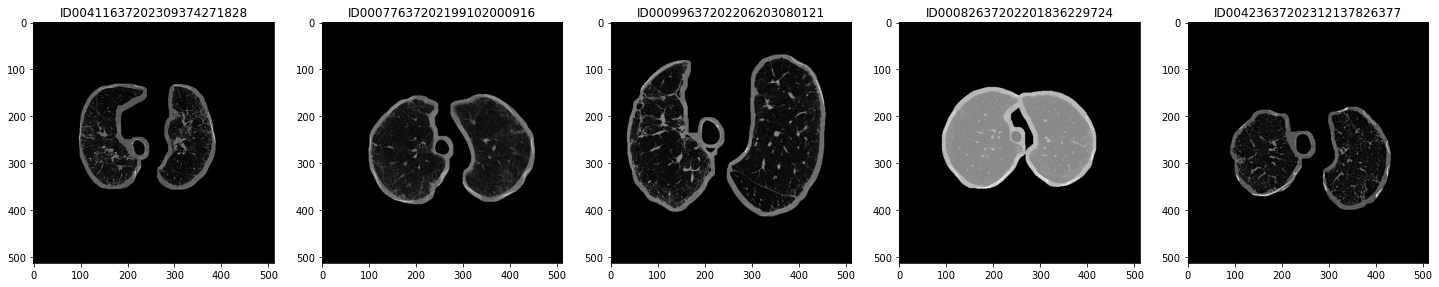

In [202]:
# print example of final carved image for this section
plt.figure(figsize = (25,5))
plt.subplot(1,5,1)
for i in range(5):
    pat_id  = patients_LIST[np.random.randint(0,173)]
    plt.subplot(1, 5,i+1)
    plt.title(pat_id)
    plt.imshow(sixth_carved_lungs[pat_id], cmap = 'gray')
plt.show()

===========================================

# SEVENTH LAYER 

In [ ]:
seventh_peaks = {}
seventh_images_clean ={}

for key, im in seventh_pics.items():
    print(key)
    if key in patients_with_square:
        im = remove_square(im)  # fix the square issue
    im = normalize_shape(im)  # spit out 512 x 512 pic
    
    means = find_maxima(im, match_hist = False)
    
    seventh_peaks[key] = means
    seventh_images_clean[key] = im

In [ ]:
'''#SAVE SEVENTH IMAGES peaks
seventh_peaks_out = open('seventh_peaks.pickle', 'wb')
pickle.dump(seventh_peaks, seventh_peaks_out)
seventh_peaks_out.close()

#SAVE SEVENTH cleaned IMAGES
seventh_images_out = open('seventh_images_cleaned.pickle','wb')
pickle.dump(seventh_images_clean, seventh_images_out)
seventh_images_out.close()'''

In [ ]:
#LOAD SEVENTH IMAGES peaks
seventh_peaks_IN = open('seventh_peaks.pickle', 'rb')
seventh_peaks = pickle.load(seventh_peaks_IN)
seventh_peaks_IN.close()

#LOAD SEVENTH cleaned IMAGES
seventh_images_IN = open('seventh_images_cleaned.pickle','rb')
seventh_images_clean = pickle.load(seventh_images_IN)
seventh_images_IN.close()

In [ ]:
# CARVE OUT SEVENTH LUNGS
seventh_carved_lungs = {}
seventh_areas_tissues  = {}  #0 is lung, 1 is the soft tissue
seventh_ratios_list = {}
seventh_lung_position = {}
seventh_WT_rect_coordinates = {}

for key in seventh_images_clean.keys():
    print(key)
    im = seventh_images_clean[key]
    means = seventh_peaks[key]
    
    centers = centers_mass_pics_middle[key]
    orientation_lung = is_right_L_right[key]
    
    
    
    lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5 ,centers=centers, mean = means,is_right_right =orientation_lung,  sigma = 5, range_p= 40 , V_O_ratio= 1.2)
    
    if len(lung_area) in [0,1]:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 72 , V_O_ratio=1.3)
    
    if len(lung_area) > 2:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 60 , V_O_ratio = 1.3)


    seventh_carved_lungs[key] = lungs
    seventh_areas_tissues[key]  = [lung_area, white_tissue_area]
    seventh_ratios_list[key] = RATIOS
    seventh_lung_position[key] = Location
    seventh_WT_rect_coordinates[key] = white_tissu_rect_coordinate

In [ ]:
# CHECK the SEVENTH carved out images

for i, j in seventh_carved_lungs.items():
    print(i)
    plt.imshow(j, cmap = 'gray')
    plt.show()


### SAVE SEVENTH DATA - PERFECT CARVING 10-13

In [ ]:
'''seventh_carved_lungs_OUT = open('7th carved lungs.pickle', 'wb')
pickle.dump(seventh_carved_lungs, seventh_carved_lungs_OUT)
seventh_carved_lungs_OUT.close()

seventh_areas_tissues_OUT = open('7th area tissues.pickle', 'wb')
pickle.dump(seventh_areas_tissues, seventh_areas_tissues_OUT)
seventh_areas_tissues_OUT.close()

seventh_ratios_lungs_OUT = open('7th ratio lungs.pickle', 'wb')
pickle.dump(seventh_ratios_list, seventh_ratios_lungs_OUT)
seventh_ratios_lungs_OUT.close()

seventh_lungs_position_OUT = open('7th lung positoon.pickle', 'wb')
pickle.dump(seventh_lung_position, seventh_lungs_position_OUT)
seventh_lungs_position_OUT.close()

seventh_white_tissue_coord_OUT = open('7th WT_rect coord.pickle', 'wb')
pickle.dump(seventh_WT_rect_coordinates, seventh_white_tissue_coord_OUT)
seventh_white_tissue_coord_OUT.close()'''

### LOAD SEVENTH DATA 

In [203]:
seventh_carved_lungs_IN = open('7th carved lungs.pickle', 'rb')
seventh_carved_lungs = pickle.load(seventh_carved_lungs_IN)
seventh_carved_lungs_IN.close()

seventh_areas_tissues_IN = open('7th area tissues.pickle', 'rb')
seventh_areas_tissues = pickle.load(seventh_areas_tissues_IN)
seventh_areas_tissues_IN.close()

seventh_ratios_lungs_IN = open('7th ratio lungs.pickle', 'rb')
seventh_ratios_list = pickle.load(seventh_ratios_lungs_IN)
seventh_ratios_lungs_IN.close()

seventh_lungs_position_IN = open('7th lung positoon.pickle', 'rb')
seventh_lung_position = pickle.load(seventh_lungs_position_IN)
seventh_lungs_position_IN.close()

seventh_white_tissue_coord_IN = open('7th WT_rect coord.pickle', 'rb')
seventh_WT_rect_coordinates = pickle.load(seventh_white_tissue_coord_IN)
seventh_white_tissue_coord_IN.close()


174

In [204]:
# print example of final carved image for this section
plt.figure(figsize = (25,5))
plt.subplot(1,5,1)
for i in range(5):
    pat_id  = patients_LIST[np.random.randint(0,173)]
    plt.subplot(1, 5,i+1)
    plt.title(pat_id)
    plt.imshow(seventh_carved_lungs[pat_id], cmap = 'gray')
plt.show()

C:\Users\gianl\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


=========================================

# EIGHTH LAYER 

In [ ]:
eighth_peaks = {}
eighth_images_clean ={}

for key, im in eighth_pics.items():
    print(key)
    if key in patients_with_square:
        im = remove_square(im)  # fix the square issue
    im = normalize_shape(im)  # spit out 512 x 512 pic
    
    means = find_maxima(im, match_hist = False)
    
    eighth_peaks[key] = means
    eighth_images_clean[key] = im


In [ ]:
'''#SAVE EIGHTH IMAGES peaks
eighth_peaks_out = open('eighth_peaks.pickle', 'wb')
pickle.dump(eighth_peaks, eighth_peaks_out)
eighth_peaks_out.close()

#SAVE EIGHTH cleaned IMAGES
eighth_images_out = open('eighth_images_cleaned.pickle','wb')
pickle.dump(eighth_images_clean, eighth_images_out)
eighth_images_out.close()'''

In [ ]:
#LOAD EIGHTH IMAGES peaks
eighth_peaks_IN = open('eighth_peaks.pickle', 'rb')
eighth_peaks = pickle.load(eighth_peaks_IN)
eighth_peaks_IN.close()

#LOAD EIGHTH cleaned IMAGES
eighth_images_IN = open('eighth_images_cleaned.pickle','rb')
eighth_images_clean = pickle.load(eighth_images_IN)
eighth_images_IN.close()

In [ ]:
# CARVE OUT EIGHTH LUNGS
eighth_carved_lungs = {}
eighth_areas_tissues  = {}  #0 is lung, 1 is the soft tissue
eighth_ratios_list = {}
eighth_lung_position = {}
eighth_WT_rect_coordinates = {}

for key, im in eighth_images_clean.items():
    print(key)
    
    means = eighth_peaks[key]
    
    centers = centers_mass_pics_middle[key]
    orientation_lung = is_right_L_right[key]
    
    
    
    lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5 ,centers=centers, mean = means,is_right_right =orientation_lung,  sigma = 5, range_p= 40 , V_O_ratio= 1.2)
    
    if len(lung_area) in [0,1]:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 72 , V_O_ratio=1.3)
    
    if len(lung_area) > 2:
        lungs, lung_area, white_tissue_area, RATIOS, Location, white_tissu_rect_coordinate  = carve_lung(image = im, wiggle =1.5, centers=centers, mean = means,is_right_right =orientation_lung, sigma = 5, range_p= 60 , V_O_ratio = 1.3)


    eighth_carved_lungs[key] = lungs
    eighth_areas_tissues[key]  = [lung_area, white_tissue_area]
    eighth_ratios_list[key] = RATIOS
    eighth_lung_position[key] = Location
    eighth_WT_rect_coordinates[key] = white_tissu_rect_coordinate


In [ ]:
# CHECK the EIGHTH carved out images
for i, j in eighth_carved_lungs.items():
    print(i)
    plt.imshow(j, cmap = 'gray')
    plt.show()


### SAVE EIGHTH DATA - PERFECT CARVING 10-13

In [ ]:
'''eighth_carved_lungs_OUT = open('8th carved lungs.pickle', 'wb')
pickle.dump(eighth_carved_lungs, eighth_carved_lungs_OUT)
eighth_carved_lungs_OUT.close()

eighth_areas_tissues_OUT = open('8th area tissues.pickle', 'wb')
pickle.dump(eighth_areas_tissues, eighth_areas_tissues_OUT)
eighth_areas_tissues_OUT.close()

eighth_ratios_lungs_OUT = open('8th ratio lungs.pickle', 'wb')
pickle.dump(eighth_ratios_list, eighth_ratios_lungs_OUT)
eighth_ratios_lungs_OUT.close()

eighth_lungs_position_OUT = open('8th lung positoon.pickle', 'wb')
pickle.dump(eighth_lung_position, eighth_lungs_position_OUT)
eighth_lungs_position_OUT.close()

eighth_white_tissue_coord_OUT = open('8th WT_rect coord.pickle', 'wb')
pickle.dump(eighth_WT_rect_coordinates, eighth_white_tissue_coord_OUT)
eighth_white_tissue_coord_OUT.close()'''

### LOAD EIGHTH DATA 

In [205]:
eighth_carved_lungs_IN = open('8th carved lungs.pickle', 'rb')
eighth_carved_lungs = pickle.load(eighth_carved_lungs_IN)
eighth_carved_lungs_IN.close()

eighth_areas_tissues_IN = open('8th area tissues.pickle', 'rb')
eighth_areas_tissues = pickle.load(eighth_areas_tissues_IN)
eighth_areas_tissues_IN.close()

eighth_ratios_lungs_IN = open('8th ratio lungs.pickle', 'rb')
eighth_ratios_list = pickle.load(eighth_ratios_lungs_IN)
eighth_ratios_lungs_IN.close()

eighth_lungs_position_IN = open('8th lung positoon.pickle', 'rb')
eighth_lung_position = pickle.load(eighth_lungs_position_IN)
eighth_lungs_position_IN.close()

eighth_white_tissue_coord_IN = open('8th WT_rect coord.pickle', 'rb')
eighth_WT_rect_coordinates = pickle.load(eighth_white_tissue_coord_IN)
eighth_white_tissue_coord_IN.close()

len(eighth_carved_lungs)


174

C:\Users\gianl\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


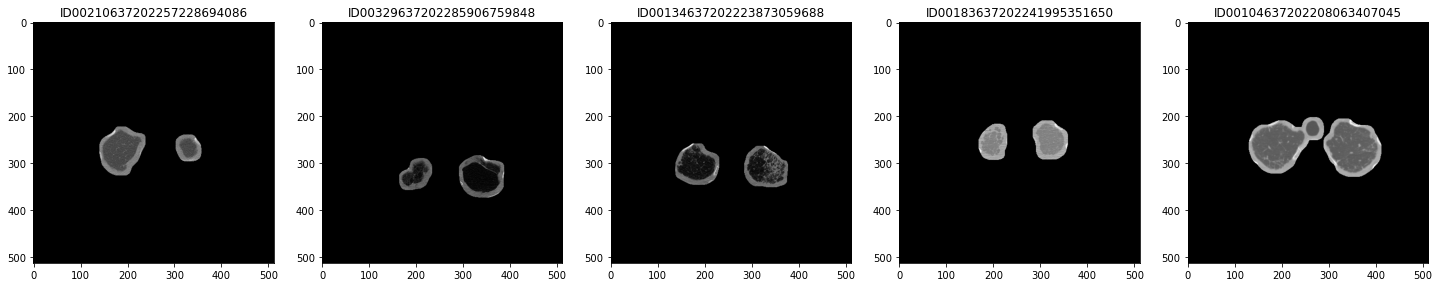

In [206]:
# print example of final carved image for this section
plt.figure(figsize = (25,5))
plt.subplot(1,5,1)
for i in range(5):
    pat_id  = patients_LIST[np.random.randint(0,173)]
    plt.subplot(1, 5,i+1)
    plt.title(pat_id)
    plt.imshow(eighth_carved_lungs[pat_id], cmap = 'gray')
plt.show()

# =======================================

### Pictue example of before and after carving

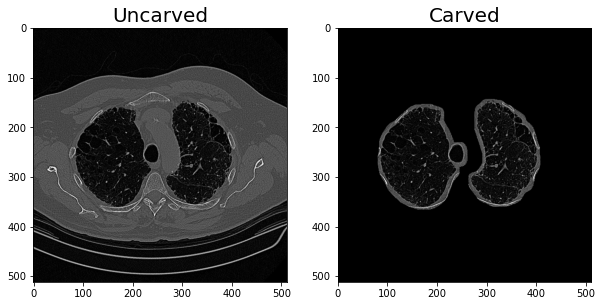

In [322]:
plt.figure(figsize =(10,5))
plt.subplot(1,2,1)
plt.imshow(sixth_images_clean['ID00009637202177434476278'], cmap = 'gray')
plt.title('Uncarved', fontsize =20)
plt.subplot(1,2,2)
plt.title('Carved', fontsize =20)
plt.imshow(sixth_carved_lungs['ID00009637202177434476278'], cmap = 'gray')
plt.savefig('uncarved vs carved.tiff', dpi=160)
plt.show()

# FIGURE COLLAGE

## 2A) 2x2 UNCARVED images (second to fifth), 1024 x 1024, contrast untouched

In [ ]:
images2to5 = [secomd_images_clean, third_images_clean, fourth_images_clean, fifth_images_clean]
rect_contours2to5 = [second_WT_rect_coordinates, third_WT_rect_coordinates, fourth_WT_rect_coordinates, fifth_WT_rect_coordinates]

In [ ]:
# find the highest hight. in case I want to reduce the size of the pics
def find_max_high(rect_contours_coordinate, configuration = '2x2'):
    diff = {}
    for key in rect_contours_coordinate[0].keys():
        diff_H = []
        for images_set in rect_contours_coordinate:
            diff_H.append(images_set[key][3])
        
        diff[key] = diff_H
    maxH = 0
    if configuration == '2x2':
        for key, val in diff.items():
            sumh = max(val[0] + val[2], val[1] + val[3])
            if sumh > maxH:
                maxH = sumh
    else:
        for key, val in diff.items():
            sumh = max(val[0] + val[3]+ val[6], val[1] + val[4]+ val[7], val[2] + val[5]+ val[8])
            if sumh > maxH:
                maxH = sumh 
    return maxH
            
diff_2to5 = find_max_high(rect_contours_coordinate =  rect_contours2to5)
diff_2to5

In [ ]:
def return_square1024image(image):
    output = np.zeros((1024,1024))
    output[0:512, 0:512] = image[0]
    output[0:512, 512:1024] = image[1]
    output[512:1024, 0:512] = image[2]
    output[512:1024, 512:1024] = image[3]
    return output

In [ ]:
images2to5 = [secomd_images_clean, third_images_clean, fourth_images_clean, fifth_images_clean]
coll2_5 ={}
for pat in patients_LIST:
    outf = return_square1024image(image = [secomd_images_clean[pat], third_images_clean[pat], fourth_images_clean[pat], fifth_images_clean[pat]])
    coll2_5[pat] = outf

In [ ]:
plt.imshow(coll2_5['ID00422637202311677017371'], cmap = 'gray')
plt.show()

In [ ]:
# Let's assemble X1 and y 
X1 = []
y1 = []
Id1 = []
for pat in patients_LIST:
    Id1.append(pat)
    y1.append(to_use2.loc[pat]['slope'])
    X1.append(coll2_5[pat])
              
              
X1 = np.array(X1)
y1 = np.array(y1).reshape(-1,1)

In [ ]:
'''# Save X1 and y1 
X1CNN_out = open('X1CNN.pickle', 'wb')
pickle.dump(X1,X1CNN_out)
X1CNN_out.close()

y1CNN_out = open('y1CNN.pickle', 'wb')
pickle.dump(y1,y1CNN_out)
y1CNN_out.close()'''

In [275]:
# LOAD X1 and y1 
X1CNN_in = open('X1CNN.pickle', 'rb')
X1 = pickle.load(X1CNN_in)
X1CNN_in.close()

y1CNN_in = open('y1CNN.pickle', 'rb')
y1 = pickle.load(y1CNN_in)
y1CNN_in.close()

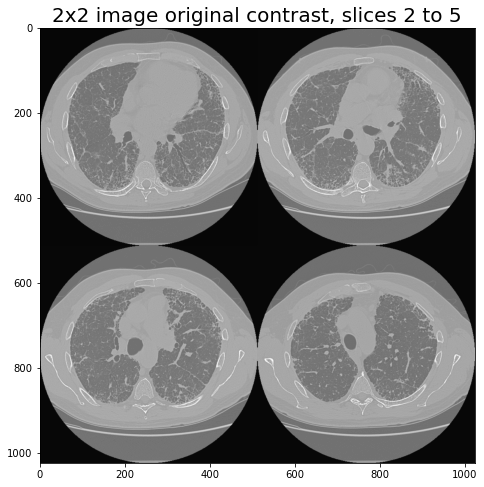

In [301]:
plt.figure(figsize =(8,8))
plt.imshow(X1[10], cmap ='gray')
plt.title('2x2 image original contrast, slices 2 to 5', fontsize =20)
plt.show()

## 2B) 4x4 UNCARVED images (second to fifth), 1024 x 1024, contrast adjusted

In [ ]:
images2to5 = [secomd_images_clean, third_images_clean, fourth_images_clean, fifth_images_clean]
coll2_5 ={}
for pat in patients_LIST:
    outf = return_square1024image(image = [secomd_images_clean[pat], third_images_clean[pat], fourth_images_clean[pat], fifth_images_clean[pat]])
    coll2_5[pat] = outf

In [ ]:
coll2_5_contr_adjusted = normalize_contrast(coll2_5, image_reference)

plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(coll2_5['ID00422637202311677017371'], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(coll2_5_contr_adjusted['ID00422637202311677017371'], cmap = 'gray')
plt.title('After')
plt.show()

In [ ]:
# Let's assemble X2 and y2
X2 = []
y2 = []
Id2 = []
for pat in patients_LIST:
    Id2.append(pat)
    y2.append(to_use2.loc[pat]['slope'])
    X2.append(coll2_5_contr_adjusted[pat])
              
              
X2 = np.array(X2)
y2 = np.array(y2).reshape(-1,1)

In [ ]:
'''# Save X2 and y2 
X2CNN_out = open('X2CNN.pickle', 'wb')
pickle.dump(X2,X2CNN_out)
X2CNN_out.close()

y2CNN_out = open('y2CNN.pickle', 'wb')
pickle.dump(y2,y2CNN_out)
y2CNN_out.close()'''

In [273]:
# LOAD X2 and y2 
X2CNN_in = open('X2CNN.pickle', 'rb')
X2 = pickle.load(X2CNN_in)
X2CNN_in.close()

y2CNN_in = open('y2CNN.pickle', 'rb')
y2 = pickle.load(y2CNN_in)
y2CNN_in.close()

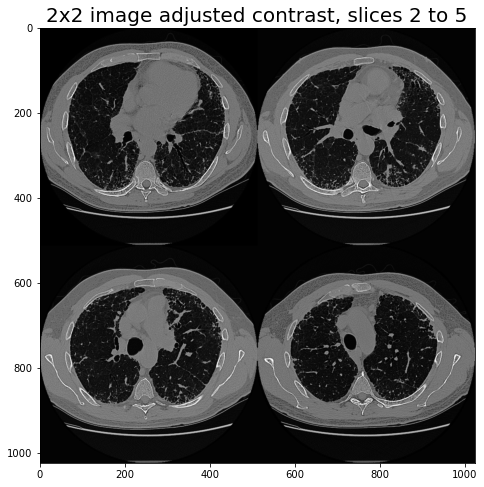

In [302]:
plt.figure(figsize =(8,8))
plt.imshow(X2[10], cmap ='gray')
plt.title('2x2 image adjusted contrast, slices 2 to 5', fontsize =20)
plt.show()

## 2C) 3x3 UNCARVED images, 1536 x 1536, contrast NON adjusted

In [ ]:
images0to8 = [zero_images_clean, first_images_clean, secomd_images_clean, third_images_clean, fourth_images_clean, fifth_images_clean, sixth_images_clean, seventh_images_clean, eighth_images_clean]
rect_contours0to8 = [zero_WT_rect_coordinates, first_WT_rect_coordinates, second_WT_rect_coordinates, third_WT_rect_coordinates, fourth_WT_rect_coordinates, fifth_WT_rect_coordinates, sixth_WT_rect_coordinates, seventh_WT_rect_coordinates, eighth_WT_rect_coordinates]

In [ ]:
# find the highest hight. in case I want to reduce the size of the pics
def find_max_high(rect_contours_coordinate, configuration = '2x2'):
    diff = {}
    for key in rect_contours_coordinate[0].keys():
        diff_H = []
        for images_set in rect_contours_coordinate:
            diff_H.append(images_set[key][3])
        
        diff[key] = diff_H
    maxH = 0
    maxK = 0
    if configuration == '2x2':
        for key, val in diff.items():
            sumh = max(val[0] + val[2], val[1] + val[3])
            if sumh > maxH:
                maxH = sumh
                maxK = key
    else:
        for key, val in diff.items():
            sumh = max(val[0] + val[3]+ val[6], val[1] + val[4]+ val[7], val[2] + val[5]+ val[8])
            if sumh > maxH:
                maxH = sumh
                maxK = key
    return maxH, maxK
            
diff_2to5, maxP = find_max_high(rect_contours_coordinate =  rect_contours0to8, configuration = '3x3')
diff_2to5, maxP

In [ ]:
# fuse 9 images together
def return_square1536image(images):
    output = np.zeros((1536,1536))
    output[0:512, 0:512] = images[0]
    output[0:512, 512:1024] = images[1]
    output[0:512, 1024:1536] = images[2]
    output[512:1024, 0:512] = images[3]
    output[512:1024, 512:1024] = images[4]
    output[512:1024, 1024:1536] = images[5]
    output[1024:1536, 0:512] = images[6]
    output[1024:1536, 512:1024] = images[7]
    output[1024:1536, 1024:1536] = images[8]
    return output

col_0to8 = {}

for key in patients_LIST:
    col_0to8[key] = return_square1536image(images= [zero_images_clean[key], first_images_clean[key], secomd_images_clean[key], third_images_clean[key], fourth_images_clean[key], fifth_images_clean[key], sixth_images_clean[key], seventh_images_clean[key], eighth_images_clean[key]] )
     

In [ ]:
#print as test
plt.imshow(col_0to8['ID00285637202278913507108'], cmap ='gray')
plt.show()

In [ ]:
# Let's assemble X3 and y3
X3 = []
y3 = []
Id3 = []
for pat in patients_LIST:
    Id3.append(pat)
    y3.append(to_use2.loc[pat]['slope'])
    X3.append(col_0to8[pat])
              
              
X3 = np.array(X3)
y3 = np.array(y3).reshape(-1,1)

In [ ]:
'''# Save X3 and y3 
X3CNN_out = open('X3CNN.pickle', 'wb')
pickle.dump(X3,X3CNN_out)
X3CNN_out.close()

y3CNN_out = open('y3CNN.pickle', 'wb')
pickle.dump(y3,y3CNN_out)
y3CNN_out.close()'''

In [271]:
# LOAD X3 and y3 
X3CNN_in = open('X3CNN.pickle', 'rb')
X3 = pickle.load(X3CNN_in)
X3CNN_in.close()

y3CNN_in = open('y3CNN.pickle', 'rb')
y3 = pickle.load(y3CNN_in)
y3CNN_in.close()

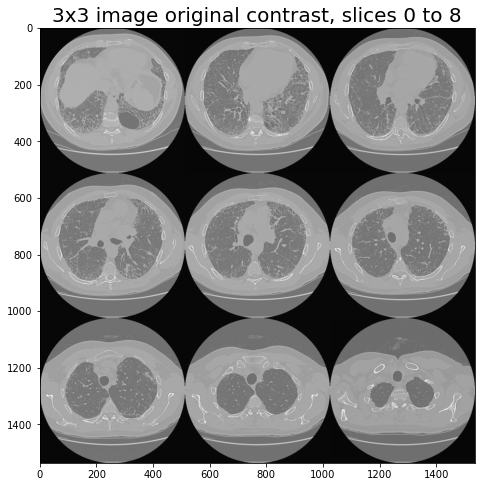

In [303]:
plt.figure(figsize =(8,8))
plt.imshow(X3[10], cmap ='gray')
plt.title('3x3 image original contrast, slices 0 to 8', fontsize =20)
plt.show()

## 2D) 3x3 UNCARVED images, 1536 x 1536, contrast adjusted

In [ ]:
col_0to8adjusted = normalize_contrast(col_0to8, image_reference)

plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(col_0to8['ID00422637202311677017371'], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(col_0to8adjusted['ID00422637202311677017371'], cmap = 'gray')
plt.title('After')
plt.show()

In [ ]:
# Let's assemble X4 and y4
X4 = []
y4 = []
Id4 = []
for pat in patients_LIST:
    Id4.append(pat)
    y4.append(to_use2.loc[pat]['slope'])
    X4.append(col_0to8adjusted[pat])
              
              
X4 = np.array(X4)
y4 = np.array(y4).reshape(-1,1)

In [ ]:
'''# Save X4 and y4 
X4CNN_out = open('X4CNN.pickle', 'wb')
pickle.dump(X4,X4CNN_out)
X4CNN_out.close()

y4CNN_out = open('y4CNN.pickle', 'wb')
pickle.dump(y4,y4CNN_out)
y4CNN_out.close()'''

In [269]:
# LOAD X4 and y4 
X4CNN_in = open('X4CNN.pickle', 'rb')
X4 = pickle.load(X4CNN_in)
X4CNN_in.close()

y4CNN_in = open('y4CNN.pickle', 'rb')
y4 = pickle.load(y4CNN_in)
y4CNN_in.close()

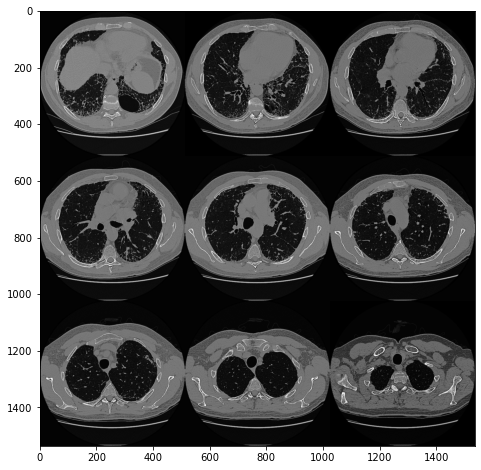

In [270]:
plt.figure(figsize =(8,8))
plt.imshow(X4[10], cmap ='gray')
plt.title('3x3 image adjusted contrast, slices 0 to 8', fontsize =20)
plt.show()

## 2E) 2x2 CARVED images, 1024 x 1024, contrast NON adjusted

In [ ]:
images2to5_CARVED = [second_carved_lungs, third_carved_lungs, fourth_carved_lungs, fifth_carved_lungs]

In [ ]:
# FUNCTION TO find the ONE rectangles which surrounds the carved lungs
def find_contours_rect_coordinates(carved_images_list, sigma = 2, Center_image = True):

    coordinates_rect = []
    image_centered = []
    for images_set in carved_images_list:
        dict_out_im = {}
        dict_out_coor = {}
        for pat in patients_LIST:
            im = images_set[pat]
            img = ndi.gaussian_filter(im, sigma= sigma)
            mask = np.where(img > 0.01, 1,0)
            contours, hierarchy = cv2.findContours(mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
            xmin = 512
            ymin = 512
            xfinal = 0
            yfinal = 0
            for le in range(len(contours)):
                x,y,w,h = cv2.boundingRect(contours[le])
                if x < xmin:
                    xmin = x
                if y < ymin:
                    ymin = y
                if x + w > xfinal:
                    xfinal = x + w
                if y + h > yfinal:
                    yfinal = y + h
                    
            if Center_image==True:
                centerx = round((xmin+xfinal)/2,0)
                centery = round((ymin+yfinal)/2,0)
                if (centerx != 256) or  (centery != 256):
                    delta_x = centerx - 256
                    delta_y = centery - 256
                    M = np.float32([[1,0, -delta_x],[0,1,-delta_y]])
                    image_shift = cv2.warpAffine(im, M, (512,512))
                    image_shift = image_shift.astype(np.uint8)
                    xmin = xmin - delta_x
                    ymin = ymin - delta_y
                    xfinal = xfinal - delta_x
                    yfinal = yfinal - delta_y         
            xmin= int(xmin)
            ymin= int(ymin)
            xfinal= int(xfinal)
            yfinal= int(yfinal)
            
            dict_out_coor[pat] = [xmin, ymin, xfinal, yfinal]
            dict_out_im[pat] = image_shift
        
        coordinates_rect.append(dict_out_coor)
        image_centered.append(dict_out_im)
        
    return image_centered, coordinates_rect  

images_cent_2to5, coord_img_centered_2to5 = find_contours_rect_coordinates(images2to5_CARVED)

In [ ]:
# check if I can reduce the size of the collaged image
def MaxDim_finder(listofcoordinate, format_col = '2x2'):
    MaxW = 0
    MaxH = 0
    MaxWp = 0
    MaxHp = 0
    if format_col =='2x2':
        for pat in patients_LIST:
            W = []
            H = []
            for i in range(len(listofcoordinate)):
                W.append(listofcoordinate[i][pat][2] - listofcoordinate[i][pat][0])
                H.append(listofcoordinate[i][pat][3] - listofcoordinate[i][pat][1])
            if max(W[0]+W[1], W[2]+W[3]) > MaxW:
                MaxW = max(W[0]+W[1], W[2]+W[3])
                MaxWp=pat
            if max(H[0]+H[2], H[1]+H[3]) > MaxH:
                MaxH = max(H[0]+H[2], H[1]+H[3])
                MaxHp=pat
                
    
    if format_col == '3x3':
        for pat in patients_LIST:
            W = []
            H = []
            for i in range(len(listofcoordinate)):
                W.append(listofcoordinate[i][pat][2] - listofcoordinate[i][pat][0])
                H.append(listofcoordinate[i][pat][3] - listofcoordinate[i][pat][1])

            if max(W[0]+W[1]+W[2], W[3]+W[4]+W[5], +W[6]+W[7]+W[8]) > MaxW:
                MaxW = max(W[0]+W[1]+W[2], W[3]+W[4]+W[5], +W[6]+W[7]+W[8])
                MaxWp=pat
            if max(H[0]+H[3]+H[6], H[1]+H[4]+H[7],H[2]+H[5]+H[8]) > MaxH:
                MaxH = max(H[0]+H[3]+H[6], H[1]+H[4]+H[7],H[2]+H[5]+H[8]) 
                MaxHp=pat
    
    return [MaxW, MaxH, MaxWp, MaxHp]

max_W_H_ID = MaxDim_finder(coord_img_centered_2to5, format_col = '2x2')
print(max_W_H_ID)

In [ ]:
def collage_and_squeeze(images_list, to_dimension = (759, 934), format_out = '2x2'):   # 10/15 I used 759 X 934
    carved_and_squeezed = {}
    if format_out == '2x2':
        xdelta = int(to_dimension[1]/4)
        ydelta = int(to_dimension[0]/4)
        diffx = int((512 - to_dimension[1]/2) /2 )-8  #correction for contour thickness
        diffy = int((512 - to_dimension[0]/2) /2 )+4  #correction for contour thickness

        for pat in patients_LIST:
            final = np.zeros(to_dimension)
            final[0:ydelta*2, 0:xdelta*2] =               images_list[0][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[0:ydelta*2, xdelta*2:xdelta*4] =        images_list[1][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[ydelta*2:ydelta*4, 0:xdelta*2] =        images_list[2][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[ydelta*2:ydelta*4, xdelta*2:xdelta*4] = images_list[3][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
                
            carved_and_squeezed[pat] =final
   
    if format_out == '3x3':
        xdelta = int(to_dimension[1]/6)
        ydelta = int(to_dimension[0]/6)
        diffx = int((512 - to_dimension[1]/3) /2 )-8
        diffy = int((512 - to_dimension[0]/3) /2 )-8
        
        for pat in patients_LIST:
            final = np.zeros(to_dimension)
            
            final[0:ydelta*2, 0:xdelta*2] =               images_list[0][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[0:ydelta*2, xdelta*2:xdelta*4] =        images_list[1][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[0:ydelta*2, xdelta*4:xdelta*6] =        images_list[2][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            
            final[ydelta*2:ydelta*4, 0:xdelta*2] =        images_list[3][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[ydelta*2:ydelta*4, xdelta*2:xdelta*4] = images_list[4][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[ydelta*2:ydelta*4, xdelta*4:xdelta*6] = images_list[5][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
             
            final[ydelta*4:ydelta*6, 0:xdelta*2] =        images_list[6][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[ydelta*4:ydelta*6, xdelta*2:xdelta*4]=  images_list[7][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[ydelta*4:ydelta*6, xdelta*4:xdelta*6]=   images_list[8][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            
            carved_and_squeezed[pat] =final
    return carved_and_squeezed

# Let's do the collage immediatelly
carved2x2 = collage_and_squeeze(images_list = images_cent_2to5)

In [ ]:
#Check images
for i in carved2x2.values():
    plt.imshow(i, cmap ='gray')
    plt.show()

In [ ]:
#Check the biggest image
plt.imshow(carved2x2['ID00099637202206203080121'], cmap ='gray')
plt.show()


In [ ]:
# Let's assemble X5 and y5
X5 = []
y5 = []
Id5 = []
for pat in patients_LIST:
    Id5.append(pat)
    y5.append(to_use2.loc[pat]['slope'])
    X5.append(carved2x2[pat])
              
              
X5 = np.array(X5)
y5 = np.array(y5).reshape(-1,1)


In [ ]:
# Save X5 and y5 
'''X5CNN_out = open('X5CNN.pickle', 'wb')
pickle.dump(X5,X5CNN_out)
X5CNN_out.close()

y5CNN_out = open('y5CNN.pickle', 'wb')
pickle.dump(y5,y5CNN_out)
y5CNN_out.close()'''

In [267]:
# LOAD X5 and y5 
X5CNN_in = open('X5CNN.pickle', 'rb')
X5 = pickle.load(X5CNN_in)
X5CNN_in.close()

y5CNN_in = open('y5CNN.pickle', 'rb')
y5 = pickle.load(y5CNN_in)
y5CNN_in.close()

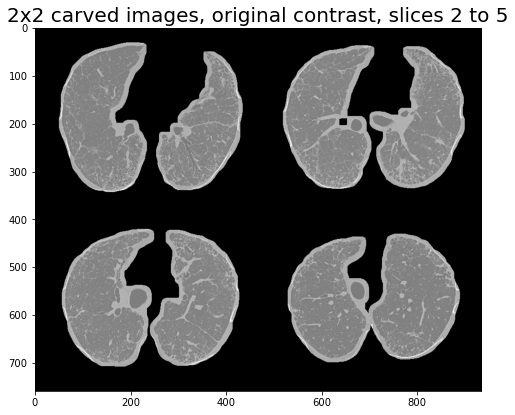

In [304]:
plt.figure(figsize =(8,8))
plt.imshow(X5[10], cmap ='gray')
plt.title('2x2 carved images, original contrast, slices 2 to 5', fontsize =20)
plt.show()

## 2F) 2x2 CARVED images, 1024 x 1024, contrast  adjusted

In [ ]:
carved2x2_adjusted = normalize_contrast(carved2x2, image_reference)

plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(carved2x2['ID00422637202311677017371'], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(carved2x2_adjusted['ID00422637202311677017371'], cmap = 'gray')
plt.title('After')
plt.show()


In [ ]:
# Let's assemble X6 and y6
X6 = []
y6 = []
Id6 = []
for pat in patients_LIST:
    Id6.append(pat)
    y6.append(to_use2.loc[pat]['slope'])
    X6.append(carved2x2_adjusted[pat])
                    
X6 = np.array(X6)
y6 = np.array(y6).reshape(-1,1)

In [ ]:
'''# Save X6 and y6 
X6CNN_out = open('X6CNN.pickle', 'wb')
pickle.dump(X6,X6CNN_out)
X6CNN_out.close()

y6CNN_out = open('y6CNN.pickle', 'wb')
pickle.dump(y6,y6CNN_out)
y6CNN_out.close()'''

In [253]:
# LOAD X6 and y6 
X6CNN_in = open('X6CNN.pickle', 'rb')
X6 = pickle.load(X6CNN_in)
X6CNN_in.close()

y6CNN_in = open('y6CNN.pickle', 'rb')
y6 = pickle.load(y6CNN_in)
y6CNN_in.close()

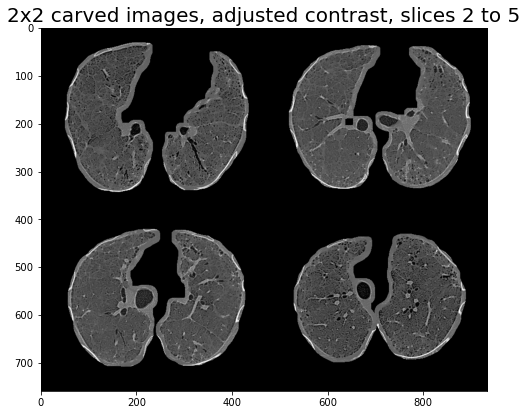

In [305]:
plt.figure(figsize =(8,8))
plt.imshow(X6[10], cmap ='gray')
plt.title('2x2 carved images, adjusted contrast, slices 2 to 5', fontsize =20)
plt.show()

## 2G) 3x3 CARVED images, contrast NON adjusted

In [ ]:
images0to8_CARVED = [zero_carved_lungs,first_carved_lungs,second_carved_lungs, third_carved_lungs, fourth_carved_lungs, fifth_carved_lungs, sixth_carved_lungs, seventh_carved_lungs,eighth_carved_lungs]

In [ ]:
images_cent_0to8, coord_img_centered_0to8 = find_contours_rect_coordinates(images0to8_CARVED)

In [ ]:
max_3x3_W_H_ID = MaxDim_finder(coord_img_centered_0to8, format_col = '3x3')
print(max_3x3_W_H_ID)

In [ ]:
def collage_and_squeeze(images_list, to_dimension = (1120, 1460), format_out = '3x3'):
    carved_and_squeezed = {}
    if format_out == '2x2':
        xdelta = int(to_dimension[1]/4)
        ydelta = int(to_dimension[0]/4)
        diffx = int((512 - to_dimension[1]/2) /2 )-8  #correction for contour thickness
        diffy = int((512 - to_dimension[0]/2) /2 )+4  #correction for contour thickness

        for pat in patients_LIST:
            final = np.zeros(to_dimension)
            final[0:ydelta*2, 0:xdelta*2] =               images_list[0][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[0:ydelta*2, xdelta*2:xdelta*4] =        images_list[1][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[ydelta*2:ydelta*4, 0:xdelta*2] =        images_list[2][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[ydelta*2:ydelta*4, xdelta*2:xdelta*4] = images_list[3][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
                
            carved_and_squeezed[pat] =final
   
    if format_out == '3x3':
        xdelta = int(to_dimension[1]/6)
        ydelta = int(to_dimension[0]/6)
        diffx = int((512 - to_dimension[1]/3) /2 )-8
        diffy = int((512 - to_dimension[0]/3) /2 )-8
        
        for pat in patients_LIST:
            final = np.zeros(to_dimension)
            
            final[0:ydelta*2, 0:xdelta*2] =               images_list[0][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[0:ydelta*2, xdelta*2:xdelta*4] =        images_list[1][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[0:ydelta*2, xdelta*4:xdelta*6] =        images_list[2][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            
            final[ydelta*2:ydelta*4, 0:xdelta*2] =        images_list[3][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[ydelta*2:ydelta*4, xdelta*2:xdelta*4] = images_list[4][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[ydelta*2:ydelta*4, xdelta*4:xdelta*6] = images_list[5][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
             
            final[ydelta*4:ydelta*6, 0:xdelta*2] =        images_list[6][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[ydelta*4:ydelta*6, xdelta*2:xdelta*4]=  images_list[7][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[ydelta*4:ydelta*6, xdelta*4:xdelta*6]=   images_list[8][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            
            carved_and_squeezed[pat] =final
    return carved_and_squeezed


In [ ]:
carved3x3 = collage_and_squeeze(images_list = images_cent_0to8, format_out ='3x3')

In [ ]:
plt.figure(figsize =(15,15))
plt.subplot(1,2,1)
plt.imshow(carved3x3['ID00139637202231703564336'], cmap='gray')
plt.title('ID00139637202231703564336')
plt.subplot(1,2,2)
plt.imshow(carved3x3['ID00099637202206203080121'], cmap='gray')
plt.title('ID00099637202206203080121')
plt.show()

In [ ]:
# Let's assemble X7 and y7
X7 = []
y7 = []
Id7 = []
for pat in patients_LIST:
    Id7.append(pat)
    y7.append(to_use2.loc[pat]['slope'])
    X7.append(carved3x3[pat])
                    
X7 = np.array(X7)
y7 = np.array(y7).reshape(-1,1)


In [ ]:
'''# Save X7 and y7 
X7CNN_out = open('X7CNN.pickle', 'wb')
pickle.dump(X7,X7CNN_out)
X7CNN_out.close()

y7CNN_out = open('y7CNN.pickle', 'wb')
pickle.dump(y7,y7CNN_out)
y7CNN_out.close()'''

In [251]:
# LOAD X7 and y7 
X7CNN_in = open('X7CNN.pickle', 'rb')
X7 = pickle.load(X7CNN_in)
X7CNN_in.close()

y7CNN_in = open('y7CNN.pickle', 'rb')
y7 = pickle.load(y7CNN_in)
y7CNN_in.close()


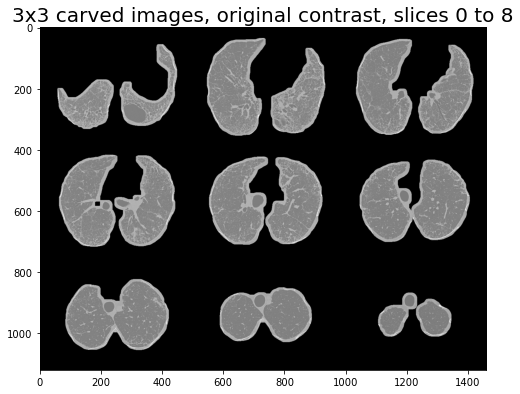

In [306]:
plt.figure(figsize =(8,8))
plt.imshow(X7[10], cmap ='gray')
plt.title('3x3 carved images, original contrast, slices 0 to 8', fontsize =20)
plt.show()

## 2G) 3x3 CARVED images, contrast  adjusted

In [ ]:
carved3x3_adjusted = normalize_contrast(carved3x3, image_reference)

plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(carved3x3['ID00422637202311677017371'], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(carved3x3_adjusted['ID00422637202311677017371'], cmap = 'gray')
plt.title('After')
plt.show()

In [ ]:
# Let's assemble X8 and y8
X8 = []
y8 = []
Id8 = []
for pat in patients_LIST:
    Id8.append(pat)
    y8.append(to_use2.loc[pat]['slope'])
    X8.append(carved3x3_adjusted[pat])
                    
X8 = np.array(X8)
y8 = np.array(y8).reshape(-1,1)


In [ ]:
'''# Save X8 and y8 
X8CNN_out = open('X8CNN.pickle', 'wb')
pickle.dump(X8,X8CNN_out)
X8CNN_out.close()

y8CNN_out = open('y8CNN.pickle', 'wb')
pickle.dump(y8,y8CNN_out)
y8CNN_out.close()'''

In [249]:
# LOAD X8 and y8 
X8CNN_in = open('X8CNN.pickle', 'rb')
X8 = pickle.load(X8CNN_in)
X8CNN_in.close()

y8CNN_in = open('y8CNN.pickle', 'rb')
y8 = pickle.load(y8CNN_in)
y8CNN_in.close()

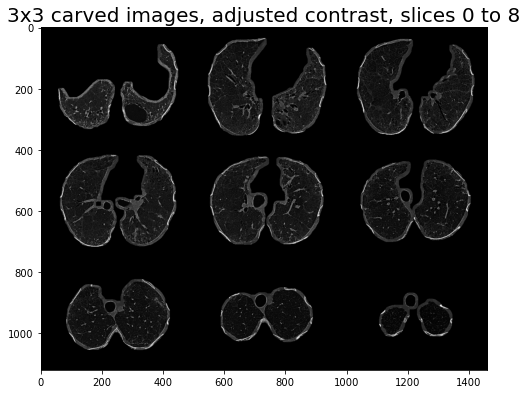

In [307]:
plt.figure(figsize =(8,8))
plt.imshow(X8[10], cmap ='gray')
plt.title('3x3 carved images, adjusted contrast, slices 0 to 8', fontsize =20)
plt.show()

# EXTRA 2F) 2x2 CARVED images, original contrast 0to3

In [ ]:
images0to3_CARVED = [zero_carved_lungs,first_carved_lungs,second_carved_lungs, third_carved_lungs]

In [ ]:
images_cent_0to3, coord_img_centered_0to3 = find_contours_rect_coordinates(images0to3_CARVED)

In [ ]:
max_2x2_W_H_ID = MaxDim_finder(coord_img_centered_0to3, format_col = '2x2')
print(max_2x2_W_H_ID)

In [ ]:
def collage_and_squeeze(images_list, to_dimension = (1120, 1460), format_out = '3x3'):
    carved_and_squeezed = {}
    if format_out == '2x2':
        xdelta = int(to_dimension[1]/4)
        ydelta = int(to_dimension[0]/4)
        diffx = int((512 - to_dimension[1]/2) /2 )-4  #correction for contour thickness
        diffy = int((512 - to_dimension[0]/2) /2 ) -4 #correction for contour thickness
        print(diffx, diffy, xdelta, ydelta)
        for pat in patients_LIST:
            final = np.zeros(to_dimension)
            final[0:ydelta*2, 0:xdelta*2] =               images_list[0][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[0:ydelta*2, xdelta*2:xdelta*4] =        images_list[1][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[ydelta*2:ydelta*4, 0:xdelta*2] =        images_list[2][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
            final[ydelta*2:ydelta*4, xdelta*2:xdelta*4] = images_list[3][pat][diffy:ydelta*2+diffy, diffx:xdelta*2+diffx]
                
            
            carved_and_squeezed[pat] =final
    return carved_and_squeezed

carved2x2_0to3 = collage_and_squeeze(images_list = images_cent_0to3, to_dimension = (756, 1000), format_out ='2x2')

In [ ]:
plt.figure(figsize =(15,15))
plt.subplot(1,2,1)
plt.imshow(carved2x2_0to3['ID00139637202231703564336'], cmap='gray')
plt.title('ID00139637202231703564336')
plt.subplot(1,2,2)
plt.imshow(carved2x2_0to3['ID00099637202206203080121'], cmap='gray')
plt.title('ID00099637202206203080121')
plt.show()

In [ ]:
# Let's assemble X9 and y9
X9 = []
y9 = []
Id9 = []
for pat in patients_LIST:
    Id9.append(pat)
    y9.append(to_use2.loc[pat]['slope'])
    X9.append(carved2x2_0to3[pat])
                    
X9 = np.array(X9)
y9 = np.array(y9).reshape(-1,1)


In [ ]:
'''# Save X9 and y9 
X9CNN_out = open('X9CNN.pickle', 'wb')
pickle.dump(X9,X9CNN_out)
X9CNN_out.close()

y9CNN_out = open('y9CNN.pickle', 'wb')
pickle.dump(y9,y9CNN_out)
y9CNN_out.close()'''


In [259]:
# LOAD X9 and y9 
X9CNN_in = open('X9CNN.pickle', 'rb')
X9 = pickle.load(X9CNN_in)
X9CNN_in.close()

y9CNN_in = open('y9CNN.pickle', 'rb')
y9 = pickle.load(y9CNN_in)
y9CNN_in.close()


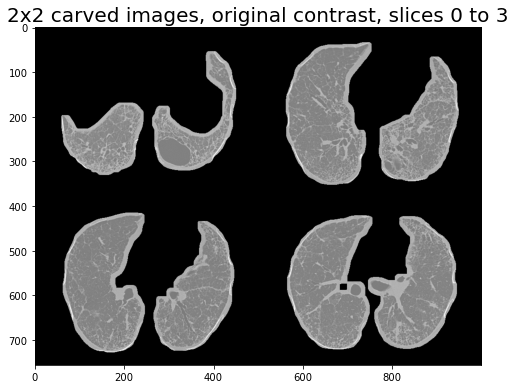

In [308]:
plt.figure(figsize =(8,8))
plt.imshow(X9[10], cmap ='gray')
plt.title('2x2 carved images, original contrast, slices 0 to 3', fontsize =20)
plt.show()

# EXTRA 2H) 2x2 CARVED images, adjusted contrast 0to3

In [265]:
carved2x2_0to3_adjusted = carved3x3_adjusted = normalize_contrast(carved2x2_0to3, image_reference)

In [ ]:
# Let's assemble X10 and y10
X10 = []
y10 = []
Id10 = []
for pat in patients_LIST:
    Id10.append(pat)
    y10.append(to_use2.loc[pat]['slope'])
    X10.append(carved2x2_0to3_adjusted[pat])
                    
X10 = np.array(X10)
y10 = np.array(y10).reshape(-1,1)


In [ ]:
'''# Save X10 and y10 
X10CNN_out = open('X10CNN.pickle', 'wb')
pickle.dump(X10,X10CNN_out)
X10CNN_out.close()

y10CNN_out = open('y10CNN.pickle', 'wb')
pickle.dump(y10,y10CNN_out)
y10CNN_out.close()
'''

In [247]:
# LOAD X10 and y10 
X10CNN_in = open('X10CNN.pickle', 'rb')
X10 = pickle.load(X10CNN_in)
X10CNN_in.close()

y10CNN_in = open('y10CNN.pickle', 'rb')
y10 = pickle.load(y10CNN_in)
y10CNN_in.close()


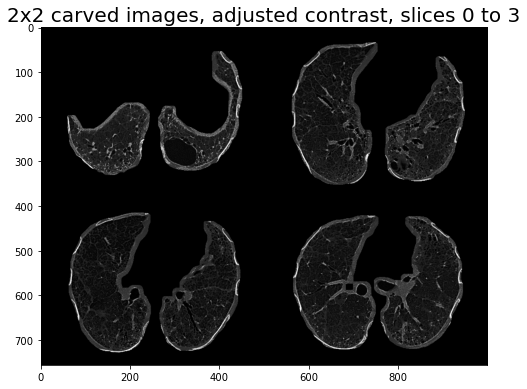

In [309]:
plt.figure(figsize =(8,8))
plt.imshow(X10[10], cmap ='gray')
plt.title('2x2 carved images, adjusted contrast, slices 0 to 3', fontsize =20)
plt.show()

# ===========================

## FINAL MODEL USED CNN

In [ ]:
model = Sequential()

model.add(Conv2D(192, (11,11), strides =1 ,activation='relu', input_shape=(756, 1000,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv2D(128, (9, 9), activation='relu'))  # from 96
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(96, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(48, kernel_size =3, padding='same', activation='relu'))
model.add(Conv2D(24, kernel_size =3, padding='same', activation='relu'))             

model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

In [ ]:
opt = Adam(lr=0.001, decay=0.1 / 100)
model5.compile(optimizer = opt, loss= 'mae')

ES = EarlyStopping(monitor='val_loss', verbose=1,patience=20)

In [ ]:
summary = model.fit(X_train, y_train, epochs = 300, batch_size = 5, callbacks = [ES], validation_data =(X_test, y_test))

# FVC DATA

In [128]:
data = pd.read_csv('C:\\Users\\gianl\\Pulmonary fibrosis\\data\\train.csv')
data.head()

Patient  Weeks   FVC    Percent  Age   Sex SmokingStatus
0  ID00007637202177411956430     -4  2315  58.253649   79  Male     Ex-smoker
1  ID00007637202177411956430      5  2214  55.712129   79  Male     Ex-smoker
2  ID00007637202177411956430      7  2061  51.862104   79  Male     Ex-smoker
3  ID00007637202177411956430      9  2144  53.950679   79  Male     Ex-smoker
4  ID00007637202177411956430     11  2069  52.063412   79  Male     Ex-smoker

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB


**no missing values!!**

In [208]:
# count number of data per patient
count_data = data.groupby('Patient').size()
print('Minumum number of measurements per patient is',  count_data.min())
print('Maximum number of measurements per patient is', count_data.max())

Minumum number of measurements per patient is 6
Maximum number of measurements per patient is 10


In [209]:
# Extract patients ID
patients = list(data.Patient.unique())

In [210]:
# let's extract Sex, Age and SmokingStatus ....
Sex_age_smoking = data[['Patient', 'Age', 'Sex','SmokingStatus']].groupby('Patient').first()
Sex_age_smoking.head()

Age   Sex SmokingStatus
Patient                                           
ID00007637202177411956430   79  Male     Ex-smoker
ID00009637202177434476278   69  Male     Ex-smoker
ID00010637202177584971671   60  Male     Ex-smoker
ID00011637202177653955184   72  Male     Ex-smoker
ID00012637202177665765362   65  Male  Never smoked

In [297]:
#..... and plot their distribution
plt.figure(figsize = (6,5))
plt.hist(Sex_age_smoking['Age'], bins = 10)
plt.title('Age of the patients', fontsize = 18)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('Patients age.tiff', dpi =160)
plt.show()

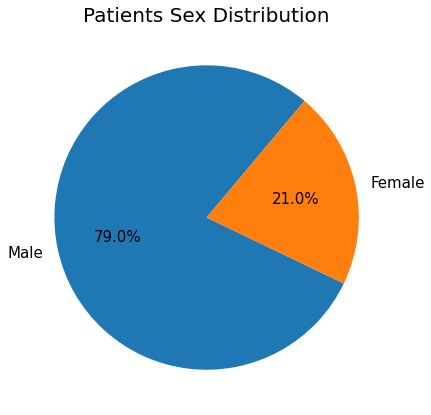

In [296]:
sex  = Sex_age_smoking['Sex'].value_counts(normalize = True)
plt.figure(figsize = (10, 7)) 
plt.pie(sex, labels = ['Male', 'Female'], textprops={'fontsize': 15}, autopct='%1.1f%%', startangle=50)
plt.title('Patients Sex Distribution', fontsize = 20)
plt.savefig('Patients sex.tiff', dpi =160)
plt.show()

In [295]:
Smokings = Sex_age_smoking['SmokingStatus'].value_counts(normalize = True)
plt.figure(figsize = (10, 7)) 
plt.pie(Smokings, labels = ['Ex-smoker', 'Never smoked', 'Currently smokes'], textprops={'fontsize': 15}, autopct='%1.1f%%', startangle=45)
plt.title('Patients Smoking Habits', fontsize = 20)
plt.savefig('Patients Smoking Habits.tiff', dpi =160)
plt.show()

### Let's print some FVC values 

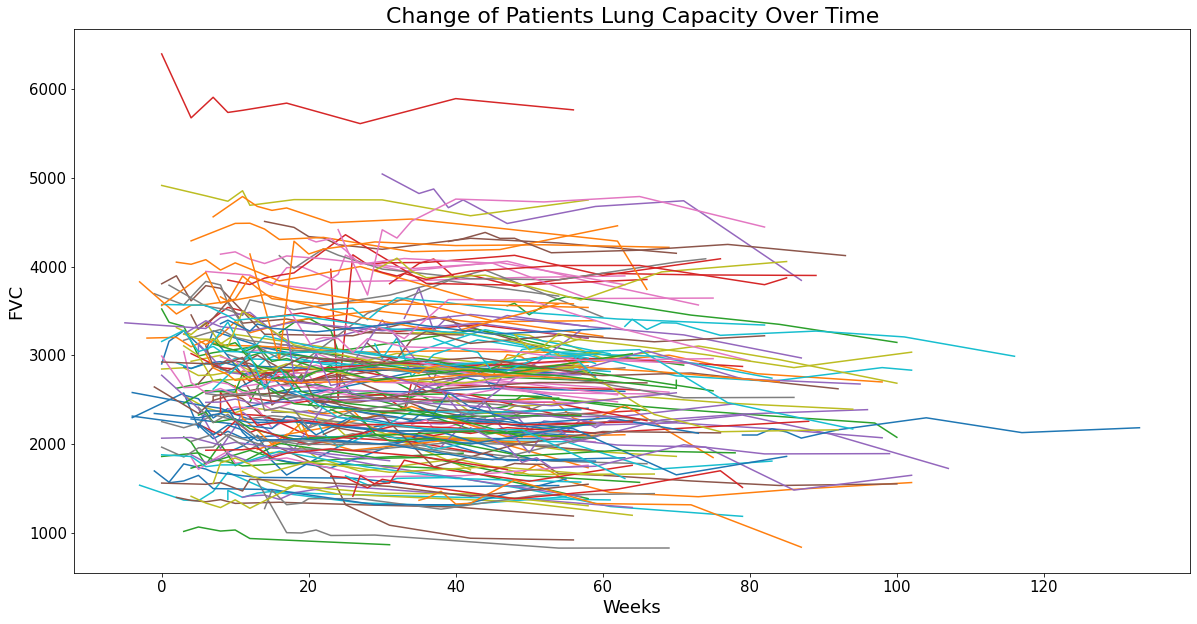

In [294]:
plt.figure(figsize = (20,10))
for i in patients:
    plt.plot(data[data['Patient'] == i]['Weeks'], data[data['Patient'] == i]['FVC'])
plt.xlabel('Weeks', fontsize = 18)
plt.ylabel('FVC', fontsize = 18)
plt.title('Change of Patients Lung Capacity Over Time', fontsize = 22)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('FVC per patients over time.tiff', dpi =160)
plt.show()


**FVC data seems to trend downwards overtime**

In [293]:
#PLOT AGE VS FVC by sex
import seaborn as sns
plt.figure(figsize = (8,8))
sns.scatterplot(data=data, x="FVC", y="Age", hue="Sex") 
plt.xlabel('FVC', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.title('Age and FVC of patietns by sex', fontsize = 20)
plt.legend(prop={'size':15})
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('FVC age sex patients.tiff', dpi =160)
plt.show()

In [212]:
# This function single out those patients whose FVC readings contain outliers. Cut_off as ratio of standard deviatio
def isolate_odd_sample(data, list_patients, cut_off):
    outlier =[]
    for p in patients:
        y=data[data['Patient']== p]['FVC'].values
        mean_y = np.mean(y)
        std_y = np.std(y)
        outlier_s = sum((y > (mean_y + cut_off * std_y))) + sum((y < (mean_y - cut_off * std_y)))
        
        if outlier_s > 0:
            outlier.append(p)
    return outlier
            

# Isolate the patien with outliers == data outsize 2.5 time STD
cut_off_2_5 = isolate_odd_sample(data= data, list_patients = patients, cut_off = 2.5)        
print(len(cut_off_2_5), 'patients with outliers.')
print(cut_off_2_5)

16 patients with outliers.
['ID00032637202181710233084', 'ID00061637202188184085559', 'ID00078637202199415319443', 'ID00090637202204766623410', 'ID00093637202205278167493', 'ID00109637202210454292264', 'ID00167637202237397919352', 'ID00169637202238024117706', 'ID00196637202246668775836', 'ID00219637202258203123958', 'ID00225637202259339837603', 'ID00319637202283897208687', 'ID00335637202286784464927', 'ID00336637202286801879145', 'ID00367637202296290303449', 'ID00371637202296828615743']


ID00032637202181710233084


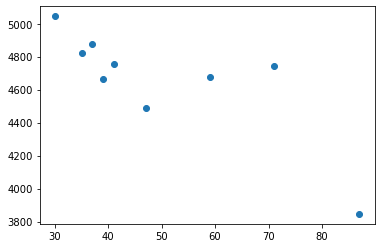

ID00061637202188184085559


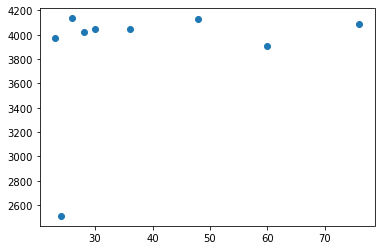

ID00078637202199415319443


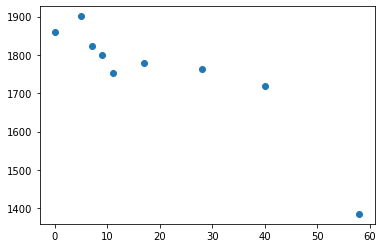

ID00090637202204766623410


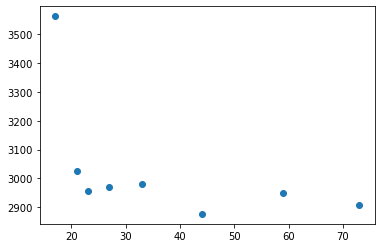

ID00093637202205278167493


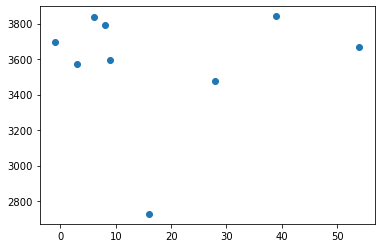

ID00109637202210454292264


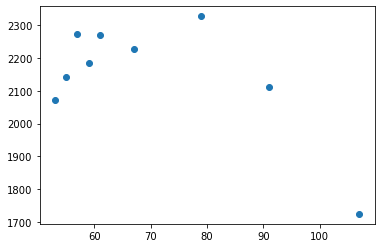

ID00167637202237397919352


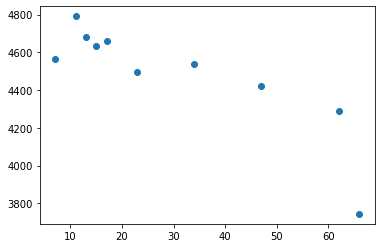

ID00169637202238024117706


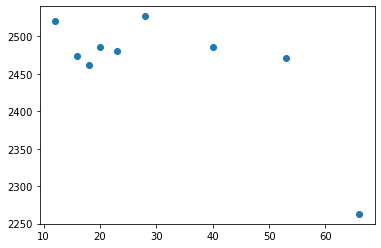

ID00196637202246668775836


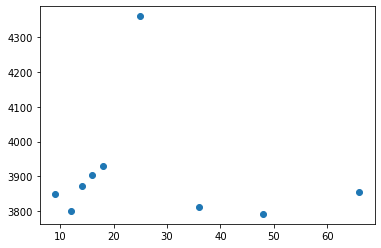

ID00219637202258203123958


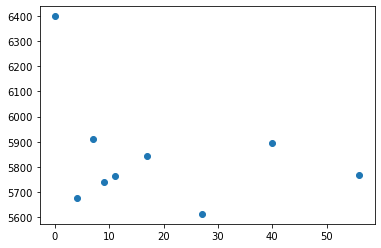

ID00225637202259339837603


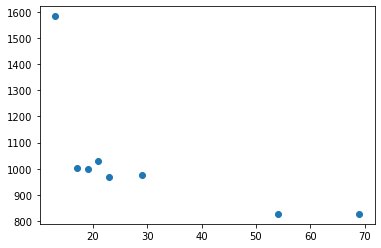

ID00319637202283897208687


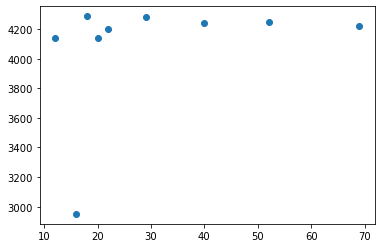

ID00335637202286784464927


ID00336637202286801879145


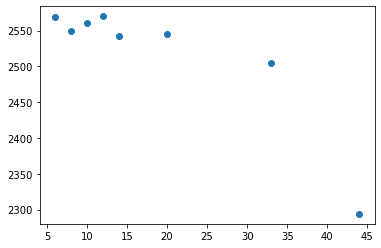

ID00367637202296290303449


ID00371637202296828615743


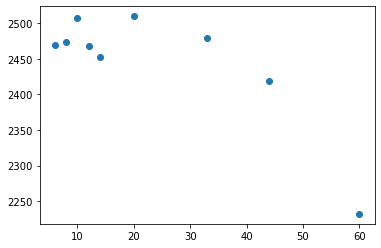

In [213]:
#Let's plot those patients FVC
for out in cut_off_2_5:
    print(out)
    plt.scatter(data[data['Patient']==out]['Weeks'], data[data['Patient']==out]['FVC'])
    plt.show()

**I will remove outliers that are not the first or the last measurements. I assume that FVC can drop significantly at the end and after the first measument**

In [214]:
# this function will remove the outliers (further away than mean +/- STD * Cut_ff), exclusing first and last measurements.

def removal_outliers(data, list_out, cut_ff):
    for patients in list_out:
        y = data[data['Patient']== patients]['FVC'].values
        mean_y = np.mean(y)
        std_y = np.std(y)
        lenP= len(y)
        for i in range(1, lenP-1):
            if (y[i] > mean_y + cut_ff * std_y ) or (y[i] < mean_y - cut_ff * std_y ):
                data = data.drop(data[(data['FVC']== y[i]) & (data['Patient']== patients)].index)
    return data

data_outlier_2_5_removed = removal_outliers(data = data, list_out =cut_off_2_5, cut_ff =2.5)

In [215]:
import statsmodels.api as sm
patient = []
intercept = []
slope = []
MSE = []
for pp in patients:
    X=data_outlier_2_5_removed[data_outlier_2_5_removed['Patient']== pp]['Weeks']
    y=data_outlier_2_5_removed[data_outlier_2_5_removed['Patient']== pp]['FVC']
    mean_y = np.mean(y)
    std_y = np.std(y)
    X = sm.add_constant(X)
    model = sm.OLS(y,X)
    results = model.fit()
    patient.append(pp)
    intercept.append(results.params[0])
    slope.append(results.params[1])
    MSE.append((np.sum(np.square(results.fittedvalues - y))) / len(y))

Regression_param = pd.DataFrame({'ID' : patient, 'intercept': intercept, 'slope':slope, 'MSE': MSE})
Regression_param.sort_values('slope', ascending = False).head(30)

ID    intercept      slope            MSE
84   ID00197637202246865691526  2218.903321  14.682612  183713.079587
30   ID00076637202199015035026  2330.972460  11.225948   13459.731934
119  ID00288637202279148973731  1911.072805   9.052208   12240.550832
146  ID00355637202295106567614  4138.311453   7.331258   82405.480021
74   ID00170637202238079193844  1936.583487   4.677616   19631.887399
133  ID00323637202285211956970  1460.358174   4.515500   11776.115167
31   ID00077637202199102000916  3224.774061   4.180071    8559.900690
92   ID00218637202258156844710  2467.558353   3.970163   12433.075127
135  ID00331637202286306023714  3026.242838   2.561119    7741.762804
103  ID00235637202261451839085  2014.845688   2.557150     881.938856
48   ID00117637202212360228007  2876.587302   1.988796    5322.849051
54   ID00126637202218610655908  2232.270091   1.896600    3083.400566
85   ID00199637202248141386743  2776.271565   1.867152    8967.715264
145  ID00351637202289476567312  2568.264620   1.656574   16108.005346
113  ID00273637202271319294586  2837.142857   1.478992    6608.526611
70   ID00165637202237320314458  2008.779981   1.475006    3241.739552
107  ID00248637202266698862378  1326.424179   1.358890    4458.914033
131  ID00319637202283897208687  4192.408217   0.815780    2447.626039
88   ID00210637202257228694086  2814.845444   0.693772     760.554210
117  ID00283637202278714365037  1958.078134   0.681112    4019.664729
49   ID00119637202215426335765  2901.368849   0.656382    1414.470784
17   ID00042637202184406822975  3600.906478   0.598134   26481.563242
78   ID00183637202241995351650  2406.174261   0.405563    4960.987051
118  ID00285637202278913507108  1369.576444   0.350064    6437.735060
96   ID00224637202259281193413  2686.970996   0.320381   22720.287638
111  ID00264637202270643353440  2021.182884   0.265338    8420.177218
37   ID00093637202205278167493  3683.221474   0.022111   15595.566470
167  ID00408637202308839708961  2412.221004   0.016660   15301.943247
138  ID00337637202286839091062  3922.885305  -0.037749   15940.970725
33   ID00082637202201836229724  2918.100088  -0.067118    2178.933045

In [216]:
#Save the linear regression data on csv
Regression_param.to_csv('Regression_param_2_5_cutoff.csv')

In [217]:
#load Regression_param
Regression_param = pd.read_csv('Regression_param_2_5_cutoff.csv').drop('Unnamed: 0', axis = 1)
Regression_param

ID    intercept      slope           MSE
0    ID00007637202177411956430  2174.416183  -3.167126   4922.883330
1    ID00009637202177434476278  3821.785590  -9.379955   8484.885066
2    ID00010637202177584971671  3311.689608 -17.042803  22967.646756
3    ID00011637202177653955184  3487.076353  -4.548925   5303.004654
4    ID00012637202177665765362  3774.033242  -8.543079  17670.194775
..                         ...          ...        ...           ...
171  ID00419637202311204720264  2828.850124  -2.135975   8017.051122
172  ID00421637202311550012437  2814.789673  -1.554030   2908.127912
173  ID00422637202311677017371  1984.824680  -4.740104   1909.818842
174  ID00423637202312137826377  3049.995721  -9.214886  36346.634810
175  ID00426637202313170790466  2919.401434  -1.081317   7339.813471

[176 rows x 4 columns]

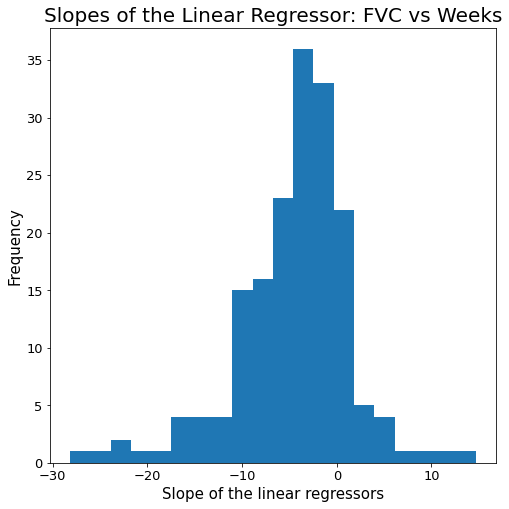

In [219]:
#let's plot the slopes
plt.figure(figsize =(8,8))
plt.hist(Regression_param['slope'],bins=20)
plt.title('Slopes of the Linear Regressor: FVC vs Weeks', fontsize = 20)
plt.xlabel('Slope of the linear regressors', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.savefig('slope_regressors.tiff', dpi = 160)
plt.show();

In [220]:
# Merge all data int one dataset 
Final = pd.merge(Regression_param, data_outlier_2_5_removed, how='inner', left_on = 'ID', right_on =  'Patient').drop('Patient', axis = 1)
Final

ID    intercept     slope          MSE  Weeks  \
0     ID00007637202177411956430  2174.416183 -3.167126  4922.883330     -4   
1     ID00007637202177411956430  2174.416183 -3.167126  4922.883330      5   
2     ID00007637202177411956430  2174.416183 -3.167126  4922.883330      7   
3     ID00007637202177411956430  2174.416183 -3.167126  4922.883330      9   
4     ID00007637202177411956430  2174.416183 -3.167126  4922.883330     11   
...                         ...          ...       ...          ...    ...   
1540  ID00426637202313170790466  2919.401434 -1.081317  7339.813471     13   
1541  ID00426637202313170790466  2919.401434 -1.081317  7339.813471     19   
1542  ID00426637202313170790466  2919.401434 -1.081317  7339.813471     31   
1543  ID00426637202313170790466  2919.401434 -1.081317  7339.813471     43   
1544  ID00426637202313170790466  2919.401434 -1.081317  7339.813471     59   

       FVC    Percent  Age   Sex SmokingStatus  
0     2315  58.253649   79  Male     Ex-smoker  
1     2214  55.712129   79  Male     Ex-smoker  
2     2061  51.862104   79  Male     Ex-smoker  
3     2144  53.950679   79  Male     Ex-smoker  
4     2069  52.063412   79  Male     Ex-smoker  
...    ...        ...  ...   ...           ...  
1540  2712  66.594637   73  Male  Never smoked  
1541  2978  73.126412   73  Male  Never smoked  
1542  2908  71.407524   73  Male  Never smoked  
1543  2975  73.052745   73  Male  Never smoked  
1544  2774  68.117081   73  Male  Never smoked  

[1545 rows x 10 columns]

In [221]:
# Let's add the feature based on the lungs images
# I utilized the area ratio of the central 7 images only
areas_list_all_lungs  =        [first_areas_tissues, second_areas_tissues, third_areas_tissues ,fourth_areas_tissues, fifth_areas_tissues, sixth_areas_tissues, seventh_areas_tissues]
ratios_list_all_lungs       =  [first_ratios_list,    second_ratios_list ,   third_ratios_list,    fourth_ratios_list ,   fifth_ratios_list ,   sixth_ratios_list,    seventh_ratios_list]
lung_position_list_all_lungs = [first_lung_position,  second_lung_position , third_lung_position  ,fourth_lung_position , fifth_lung_position , sixth_lung_position, seventh_lung_position]


In [222]:
#the script below will extract ratios: LUNG area/ NO lung tissue.
ID = []
Ratios_np = np.zeros((174, 7*2))
ii=0
jj=0

for ratio, position in zip(ratios_list_all_lungs, lung_position_list_all_lungs):
    ii=0
    for pat in ratio.keys():
        if jj == 0 :
            ID.append(pat)
        sumR = 0
        sumL = 0
        for i in range(len(ratio[pat])):       
            if position[pat][i] == 'Right lung':
                sumR = sumR + ratio[pat][i]
            if position[pat][i] == 'Left lung':
                sumL = sumL + ratio[pat][i] 
            if position[pat][i] == 'Center lung':
                sumL = sumL + ratio[pat][i] /2
                sumR = sumR + ratio[pat][i] /2      
        Ratios_np[ii, jj] = sumR
        Ratios_np[ii, jj+1] = sumL


        ii +=1
    jj +=2
#convert to DF

LUNG_features =pd.DataFrame(Ratios_np, index = ID, columns =['First-Right', 'First-Left', 'Second-Right', 'Second-Left',  'Third-Right', 'Third-Left' ,
                                                             'Fourth-Right', 'Fourth-Left', 
                                                            'Fifth-Right', 'Fifth-Left',  'Sixth-Right', 'Sixth-Left', 'Seventh-Right', 'Seventh-Left']).reset_index()
LUNG_features.head()

index  First-Right  First-Left  Second-Right  \
0  ID00364637202296074419422        17.50        9.03         15.92   
1  ID00007637202177411956430        10.42       28.77         15.19   
2  ID00009637202177434476278        19.77       34.22         16.81   
3  ID00010637202177584971671        18.78       25.30         19.86   
4  ID00012637202177665765362        18.21       23.43         27.80   

   Second-Left  Third-Right  Third-Left  Fourth-Right  Fourth-Left  \
0        13.94        15.33       28.27         16.90        33.77   
1        31.24        23.34       35.48         29.61        34.66   
2        29.86        17.47       27.15         19.12        27.02   
3        32.30        21.40       29.74         20.50        25.57   
4        37.60        36.04       37.88         38.41        39.24   

   Fifth-Right  Fifth-Left  Sixth-Right  Sixth-Left  Seventh-Right  \
0        17.91       29.41        19.14       25.60         14.720   
1        28.91       30.54        23.42       24.43         17.290   
2        19.57       25.25        17.02       20.76         11.650   
3        16.26       22.26        12.56       16.64          6.830   
4        41.94       37.06        35.24       29.90         18.845   

   Seventh-Left  
0        21.450  
1        17.290  
2        12.440  
3         9.030  
4        18.845

In [225]:
Final2 = pd.merge(Final, LUNG_features, left_on = 'ID', right_on = 'index', how = 'inner').drop('index', axis = 1)
Final2.head()

# note the data for two images I can't open are removed when I do the merge, since it is inner merge

ID    intercept     slope         MSE  Weeks   FVC  \
0  ID00007637202177411956430  2174.416183 -3.167126  4922.88333     -4  2315   
1  ID00007637202177411956430  2174.416183 -3.167126  4922.88333      5  2214   
2  ID00007637202177411956430  2174.416183 -3.167126  4922.88333      7  2061   
3  ID00007637202177411956430  2174.416183 -3.167126  4922.88333      9  2144   
4  ID00007637202177411956430  2174.416183 -3.167126  4922.88333     11  2069   

     Percent  Age   Sex SmokingStatus  First-Right  First-Left  Second-Right  \
0  58.253649   79  Male     Ex-smoker        10.42       28.77         15.19   
1  55.712129   79  Male     Ex-smoker        10.42       28.77         15.19   
2  51.862104   79  Male     Ex-smoker        10.42       28.77         15.19   
3  53.950679   79  Male     Ex-smoker        10.42       28.77         15.19   
4  52.063412   79  Male     Ex-smoker        10.42       28.77         15.19   

   Second-Left  Third-Right  Third-Left  Fourth-Right  Fourth-Left  \
0        31.24        23.34       35.48         29.61        34.66   
1        31.24        23.34       35.48         29.61        34.66   
2        31.24        23.34       35.48         29.61        34.66   
3        31.24        23.34       35.48         29.61        34.66   
4        31.24        23.34       35.48         29.61        34.66   

   Fifth-Right  Fifth-Left  Sixth-Right  Sixth-Left  Seventh-Right  \
0        28.91       30.54        23.42       24.43          17.29   
1        28.91       30.54        23.42       24.43          17.29   
2        28.91       30.54        23.42       24.43          17.29   
3        28.91       30.54        23.42       24.43          17.29   
4        28.91       30.54        23.42       24.43          17.29   

   Seventh-Left  
0         17.29  
1         17.29  
2         17.29  
3         17.29  
4         17.29

In [224]:
#Save the final dataset 
Final2.to_csv('Final regression data_outliers removed & lung area ration.csv')

In [3]:
#Load the final dataset 
pd.set_option('display.max_columns', None)
Final2 = pd.read_csv('Final regression data_outliers removed & lung area ration.csv').drop('Unnamed: 0' , axis =1)
Final2.head()

ID    intercept     slope         MSE  Weeks   FVC  \
0  ID00007637202177411956430  2174.416183 -3.167126  4922.88333     -4  2315   
1  ID00007637202177411956430  2174.416183 -3.167126  4922.88333      5  2214   
2  ID00007637202177411956430  2174.416183 -3.167126  4922.88333      7  2061   
3  ID00007637202177411956430  2174.416183 -3.167126  4922.88333      9  2144   
4  ID00007637202177411956430  2174.416183 -3.167126  4922.88333     11  2069   

     Percent  Age   Sex SmokingStatus  First-Right  First-Left  Second-Right  \
0  58.253649   79  Male     Ex-smoker        10.42       28.77         15.19   
1  55.712129   79  Male     Ex-smoker        10.42       28.77         15.19   
2  51.862104   79  Male     Ex-smoker        10.42       28.77         15.19   
3  53.950679   79  Male     Ex-smoker        10.42       28.77         15.19   
4  52.063412   79  Male     Ex-smoker        10.42       28.77         15.19   

   Second-Left  Third-Right  Third-Left  Fourth-Right  Fourth-Left  \
0        31.24        23.34       35.48         29.61        34.66   
1        31.24        23.34       35.48         29.61        34.66   
2        31.24        23.34       35.48         29.61        34.66   
3        31.24        23.34       35.48         29.61        34.66   
4        31.24        23.34       35.48         29.61        34.66   

   Fifth-Right  Fifth-Left  Sixth-Right  Sixth-Left  Seventh-Right  \
0        28.91       30.54        23.42       24.43          17.29   
1        28.91       30.54        23.42       24.43          17.29   
2        28.91       30.54        23.42       24.43          17.29   
3        28.91       30.54        23.42       24.43          17.29   
4        28.91       30.54        23.42       24.43          17.29   

   Seventh-Left  
0         17.29  
1         17.29  
2         17.29  
3         17.29  
4         17.29

# Predicton of the slope

## A - using the numerical/categorical features - ANN

In [226]:
to_use = Final2.drop(['MSE', 'intercept'], axis = 1)
to_use2 = to_use.groupby('ID').first()
to_use2.head()

slope  Weeks   FVC    Percent  Age   Sex  \
ID                                                                        
ID00007637202177411956430  -3.167126     -4  2315  58.253649   79  Male   
ID00009637202177434476278  -9.379955      8  3660  85.282878   69  Male   
ID00010637202177584971671 -17.042803      0  3523  94.724672   60  Male   
ID00012637202177665765362  -8.543079     33  3418  93.726006   65  Male   
ID00014637202177757139317 -14.033412      0  3807  90.076661   56  Male   

                          SmokingStatus  First-Right  First-Left  \
ID                                                                 
ID00007637202177411956430     Ex-smoker        10.42       28.77   
ID00009637202177434476278     Ex-smoker        19.77       34.22   
ID00010637202177584971671     Ex-smoker        18.78       25.30   
ID00012637202177665765362  Never smoked        18.21       23.43   
ID00014637202177757139317     Ex-smoker        23.67       40.52   

                           Second-Right  Second-Left  Third-Right  Third-Left  \
ID                                                                              
ID00007637202177411956430         15.19        31.24        23.34       35.48   
ID00009637202177434476278         16.81        29.86        17.47       27.15   
ID00010637202177584971671         19.86        32.30        21.40       29.74   
ID00012637202177665765362         27.80        37.60        36.04       37.88   
ID00014637202177757139317         23.45        36.32        30.77       36.97   

                           Fourth-Right  Fourth-Left  Fifth-Right  Fifth-Left  \
ID                                                                              
ID00007637202177411956430         29.61        34.66        28.91       30.54   
ID00009637202177434476278         19.12        27.02        19.57       25.25   
ID00010637202177584971671         20.50        25.57        16.26       22.26   
ID00012637202177665765362         38.41        39.24        41.94       37.06   
ID00014637202177757139317         27.22        32.90        25.26       26.19   

                           Sixth-Right  Sixth-Left  Seventh-Right  \
ID                                                                  
ID00007637202177411956430        23.42       24.43         17.290   
ID00009637202177434476278        17.02       20.76         11.650   
ID00010637202177584971671        12.56       16.64          6.830   
ID00012637202177665765362        35.24       29.90         18.845   
ID00014637202177757139317        21.71       18.87         11.180   

                           Seventh-Left  
ID                                       
ID00007637202177411956430        17.290  
ID00009637202177434476278        12.440  
ID00010637202177584971671         9.030  
ID00012637202177665765362        18.845  
ID00014637202177757139317         9.410

In [227]:
# Get X and y
ratiosL = ['First-Right', 'First-Left', 'Second-Right', 'Second-Left',  'Third-Right', 'Third-Left' , 'Fourth-Right', 'Fourth-Left', 
                                                            'Fifth-Right', 'Fifth-Left',  'Sixth-Right', 'Sixth-Left', 'Seventh-Right', 'Seventh-Left']

X = to_use2.drop(['slope', 'Weeks', 'FVC', 'Percent'], axis = 1)
X = pd.get_dummies(X, drop_first = True)
scaX = StandardScaler()
X[ratiosL] = scaX.fit_transform(X[ratiosL])
print(X.head())

y = to_use2[['slope']]


                           Age  First-Right  First-Left  Second-Right  \
ID                                                                      
ID00007637202177411956430   79    -1.219481    0.324555     -0.835014   
ID00009637202177434476278   69    -0.004537    0.750327     -0.629373   
ID00010637202177584971671   60    -0.133178    0.053467     -0.242209   
ID00012637202177665765362   65    -0.207244   -0.092623      0.765687   
ID00014637202177757139317   56     0.502232    1.242503      0.213502   

                           Second-Left  Third-Right  Third-Left  Fourth-Right  \
ID                                                                              
ID00007637202177411956430    -0.024369     0.011181    0.508412      0.526324   
ID00009637202177434476278    -0.148117    -0.714135   -0.331301     -0.725928   
ID00010637202177584971671     0.070684    -0.228532   -0.070214     -0.561190   
ID00012637202177665765362     0.545950     1.580435    0.750346      1.576831   
ID

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state =20)
print(X_train.shape)

(130, 18)


In [7]:
#Setting up NN
slope_prediction = Sequential()
slope_prediction.add(Dense(400, input_dim = 18, activation = 'relu'))
slope_prediction.add(Dense(400, activation = 'relu'))
slope_prediction.add(Dense(1, activation = 'linear'))

In [8]:
opt = Adam(lr=0.0022,  decay=0.1 / 50)
slope_prediction.compile(optimizer = opt, loss = 'mae')

es = EarlyStopping(monitor = 'val_loss', patience = 70, verbose = 1)

In [9]:
history  = slope_prediction.fit(X_train, y_train, epochs=5000, batch_size =10, callbacks =  [es]  , validation_data = (X_test, y_test))

Train on 130 samples, validate on 44 samples
Epoch 1/5000
130/130 [==============================] - 1s 7ms/sample - loss: 11.7410 - val_loss: 10.6409
Epoch 2/5000
130/130 [==============================] - 0s 345us/sample - loss: 6.1219 - val_loss: 5.2756
Epoch 3/5000
130/130 [==============================] - 0s 330us/sample - loss: 5.7637 - val_loss: 3.5255
Epoch 4/5000
130/130 [==============================] - 0s 384us/sample - loss: 4.7900 - val_loss: 3.7007
Epoch 5/5000
130/130 [==============================] - 0s 368us/sample - loss: 4.6312 - val_loss: 3.7475
Epoch 6/5000
130/130 [==============================] - 0s 353us/sample - loss: 4.4189 - val_loss: 3.6443
Epoch 7/5000
130/130 [==============================] - 0s 361us/sample - loss: 4.6185 - val_loss: 3.7874
Epoch 8/5000
130/130 [==============================] - 0s 315us/sample - loss: 4.6439 - val_loss: 4.1322
Epoch 9/5000
130/130 [==============================] - 0s 315us/sample - loss: 4.6508 - val_loss: 4.0384
E

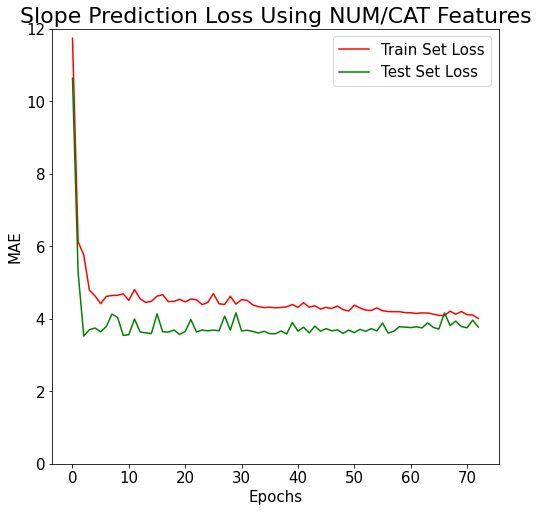

In [246]:
plt.figure(figsize = (8,8))
plt.plot(history.history['loss'], label = 'Train Set Loss', color ='red')
plt.plot(history.history['val_loss'], label ='Test Set Loss', color ='green')
plt.legend(loc = 'upper right', prop = {'size': 15})
plt.title('Slope Prediction Loss Using NUM/CAT Features', fontsize = 22)
plt.ylabel('MAE', fontsize = 15)
plt.xlabel('Epochs', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim([0,12])
plt.savefig('Slope Prediction Loss Using NUM-CAT Features.tiff', dpi =160)
plt.show()

In [228]:
to_use2['SLOPE pred NN '] = slope_prediction.predict(X)
to_use2.head()

slope  Weeks   FVC    Percent  Age   Sex  \
ID                                                                        
ID00007637202177411956430  -3.167126     -4  2315  58.253649   79  Male   
ID00009637202177434476278  -9.379955      8  3660  85.282878   69  Male   
ID00010637202177584971671 -17.042803      0  3523  94.724672   60  Male   
ID00012637202177665765362  -8.543079     33  3418  93.726006   65  Male   
ID00014637202177757139317 -14.033412      0  3807  90.076661   56  Male   

                          SmokingStatus  First-Right  First-Left  \
ID                                                                 
ID00007637202177411956430     Ex-smoker        10.42       28.77   
ID00009637202177434476278     Ex-smoker        19.77       34.22   
ID00010637202177584971671     Ex-smoker        18.78       25.30   
ID00012637202177665765362  Never smoked        18.21       23.43   
ID00014637202177757139317     Ex-smoker        23.67       40.52   

                           Second-Right  Second-Left  Third-Right  Third-Left  \
ID                                                                              
ID00007637202177411956430         15.19        31.24        23.34       35.48   
ID00009637202177434476278         16.81        29.86        17.47       27.15   
ID00010637202177584971671         19.86        32.30        21.40       29.74   
ID00012637202177665765362         27.80        37.60        36.04       37.88   
ID00014637202177757139317         23.45        36.32        30.77       36.97   

                           Fourth-Right  Fourth-Left  Fifth-Right  Fifth-Left  \
ID                                                                              
ID00007637202177411956430         29.61        34.66        28.91       30.54   
ID00009637202177434476278         19.12        27.02        19.57       25.25   
ID00010637202177584971671         20.50        25.57        16.26       22.26   
ID00012637202177665765362         38.41        39.24        41.94       37.06   
ID00014637202177757139317         27.22        32.90        25.26       26.19   

                           Sixth-Right  Sixth-Left  Seventh-Right  \
ID                                                                  
ID00007637202177411956430        23.42       24.43         17.290   
ID00009637202177434476278        17.02       20.76         11.650   
ID00010637202177584971671        12.56       16.64          6.830   
ID00012637202177665765362        35.24       29.90         18.845   
ID00014637202177757139317        21.71       18.87         11.180   

                           Seventh-Left  SLOPE pred NN   
ID                                                       
ID00007637202177411956430        17.290       -4.508804  
ID00009637202177434476278        12.440       -3.880499  
ID00010637202177584971671         9.030       -2.246702  
ID00012637202177665765362        18.845       -5.223310  
ID00014637202177757139317         9.410       -4.065915

## B - using images - CNN 3x3 original contrast

In [311]:
CNN_model_loss =pd.read_csv('LOSS 3x3.csv').drop('Unnamed: 0', axis =1)
CNN_model_loss.head()

loss_ORIG  val_loss_ORIG  loss_Adjusted   val_loss_adjusted
0  48.984432       3.925908          4.4913             5.5700
1   4.729629       3.799306          4.5119             4.1970
2   4.405290       3.924778          4.6305             5.0589
3   4.655530       3.740055          4.4982             5.6240
4   4.717138       3.714737          4.6036             4.1101

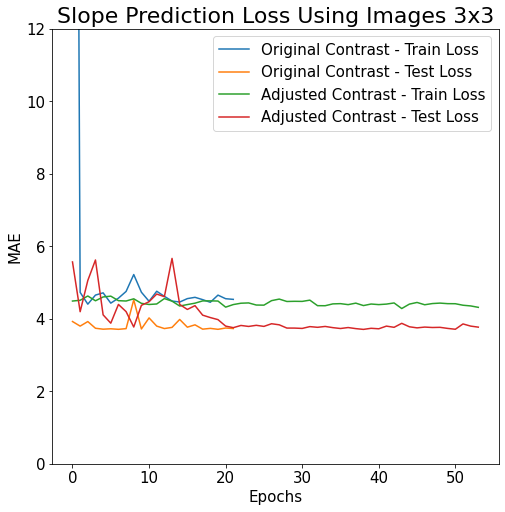

In [310]:
plt.figure(figsize = (8,8))
plt.plot(model_loss['loss_ORIG'], label = 'Original Contrast - Train Loss')
plt.plot(model_loss['val_loss_ORIG'], label = 'Original Contrast - Test Loss')
plt.plot(model_loss['loss_Adjusted '], label = 'Adjusted Contrast - Train Loss')
plt.plot(model_loss['val_loss_adjusted'], label = 'Adjusted Contrast - Test Loss')
plt.title('Slope Prediction Loss Using Images 3x3', fontsize = 22)
plt.ylabel('MAE', fontsize = 15)
plt.xlabel('Epochs', fontsize = 15)
plt.legend(loc = 'upper right', prop = {'size': 15})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim([0,12])
plt.show()

In [106]:
# The predictiion below was obtained using 3x3 carved image, original contrast (training, test and prediction performed on Kaggle)
CNNpred = pd.read_csv('good_pred_3x3_orig_contrast.csv').drop('Unnamed: 0', axis =1)  ## good on 10/19
CNNpred['patient']=patients_LIST
CNNpred = CNNpred.set_index('patient')
CNNpred.columns = ['CNN PRED']
CNNpred.head()

CNN PRED
patient                             
ID00364637202296074419422 -12.577133
ID00007637202177411956430  -5.565604
ID00009637202177434476278  -1.336091
ID00010637202177584971671 -13.383630
ID00012637202177665765362  -5.275683

In [107]:
merged  = pd.merge(to_use2.reset_index(), CNNpred.reset_index(), left_on = 'ID', right_on = 'patient').drop(['patient', 'pred'] , axis =1)
merged.head()

ID      slope  Weeks   FVC    Percent  Age   Sex  \
0  ID00007637202177411956430  -3.167126     -4  2315  58.253649   79  Male   
1  ID00009637202177434476278  -9.379955      8  3660  85.282878   69  Male   
2  ID00010637202177584971671 -17.042803      0  3523  94.724672   60  Male   
3  ID00012637202177665765362  -8.543079     33  3418  93.726006   65  Male   
4  ID00014637202177757139317 -14.033412      0  3807  90.076661   56  Male   

  SmokingStatus  First-Right  First-Left  Second-Right  Second-Left  \
0     Ex-smoker        10.42       28.77         15.19        31.24   
1     Ex-smoker        19.77       34.22         16.81        29.86   
2     Ex-smoker        18.78       25.30         19.86        32.30   
3  Never smoked        18.21       23.43         27.80        37.60   
4     Ex-smoker        23.67       40.52         23.45        36.32   

   Third-Right  Third-Left  Fourth-Right  Fourth-Left  Fifth-Right  \
0        23.34       35.48         29.61        34.66        28.91   
1        17.47       27.15         19.12        27.02        19.57   
2        21.40       29.74         20.50        25.57        16.26   
3        36.04       37.88         38.41        39.24        41.94   
4        30.77       36.97         27.22        32.90        25.26   

   Fifth-Left  Sixth-Right  Sixth-Left  Seventh-Right  Seventh-Left  \
0       30.54        23.42       24.43         17.290        17.290   
1       25.25        17.02       20.76         11.650        12.440   
2       22.26        12.56       16.64          6.830         9.030   
3       37.06        35.24       29.90         18.845        18.845   
4       26.19        21.71       18.87         11.180         9.410   

   SLOPE pred NN    CNN PRED  
0       -4.508804  -5.565604  
1       -3.880499  -1.336091  
2       -2.246702 -13.383630  
3       -5.223310  -5.275683  
4       -4.065915 -18.167038

## Merging the prediction ANN + CNN

In [108]:
 ######################################
merged['Slope PRED Average'] = (merged['SLOPE pred NN '] +  merged['CNN PRED']) /2

In [109]:
#merge DATA
pred_slope_plus_real_slope = pd.merge(merged[['Slope PRED Average', 'ID']], to_use2[['slope', 'Weeks', 'FVC','Percent']], on='ID', how='inner')
pred_slope_plus_real_slope.head()

Slope PRED Average                         ID      slope  Weeks   FVC  \
0           -5.037204  ID00007637202177411956430  -3.167126     -4  2315   
1           -2.608295  ID00009637202177434476278  -9.379955      8  3660   
2           -7.815166  ID00010637202177584971671 -17.042803      0  3523   
3           -5.249496  ID00012637202177665765362  -8.543079     33  3418   
4          -11.116476  ID00014637202177757139317 -14.033412      0  3807   

     Percent  
0  58.253649  
1  85.282878  
2  94.724672  
3  93.726006  
4  90.076661

In [235]:
pred_slope_plus_real_slope['PRED intercept'] = pred_slope_plus_real_slope['FVC'] - (pred_slope_plus_real_slope['Slope PRED Average']  * pred_slope_plus_real_slope['Weeks'])
pred_slope_plus_real_slope['Percent intercept'] = pred_slope_plus_real_slope['Percent'] - (pred_slope_plus_real_slope['Slope PRED Average']  * pred_slope_plus_real_slope['Weeks'])

pred_slope_plus_real_slope.head()

Slope PRED Average                         ID      slope  Weeks   FVC  \
0           -5.037204  ID00007637202177411956430  -3.167126     -4  2315   
1           -2.608295  ID00009637202177434476278  -9.379955      8  3660   
2           -7.815166  ID00010637202177584971671 -17.042803      0  3523   
3           -5.249496  ID00012637202177665765362  -8.543079     33  3418   
4          -11.116476  ID00014637202177757139317 -14.033412      0  3807   

     Percent  PRED intercept  Percent intercept  
0  58.253649     2294.851184          38.104833  
1  85.282878     3680.866361         106.149239  
2  94.724672     3523.000000          94.724672  
3  93.726006     3591.233383         266.959389  
4  90.076661     3807.000000          90.076661

In [111]:
#merge with Final2
pred_slope_plus_real_slope_Final2 = pd.merge(Final2[['Weeks','FVC','ID']].set_index('ID'), pred_slope_plus_real_slope, on = 'ID')
pred_slope_plus_real_slope_Final2.head()

ID  Weeks_x  FVC_x  Slope PRED Average     slope  \
0  ID00007637202177411956430       -4   2315           -5.037204 -3.167126   
1  ID00007637202177411956430        5   2214           -5.037204 -3.167126   
2  ID00007637202177411956430        7   2061           -5.037204 -3.167126   
3  ID00007637202177411956430        9   2144           -5.037204 -3.167126   
4  ID00007637202177411956430       11   2069           -5.037204 -3.167126   

   Weeks_y  FVC_y    Percent  PRED intercept  Percent intercept  
0       -4   2315  58.253649     2294.851184          38.104833  
1       -4   2315  58.253649     2294.851184          38.104833  
2       -4   2315  58.253649     2294.851184          38.104833  
3       -4   2315  58.253649     2294.851184          38.104833  
4       -4   2315  58.253649     2294.851184          38.104833

In [112]:
pred_slope_plus_real_slope_Final2= pred_slope_plus_real_slope_Final2.drop(['Weeks_y', 'FVC_y'], axis =1)
pred_slope_plus_real_slope_Final2.head()

ID  Weeks_x  FVC_x  Slope PRED Average     slope  \
0  ID00007637202177411956430       -4   2315           -5.037204 -3.167126   
1  ID00007637202177411956430        5   2214           -5.037204 -3.167126   
2  ID00007637202177411956430        7   2061           -5.037204 -3.167126   
3  ID00007637202177411956430        9   2144           -5.037204 -3.167126   
4  ID00007637202177411956430       11   2069           -5.037204 -3.167126   

     Percent  PRED intercept  Percent intercept  
0  58.253649     2294.851184          38.104833  
1  58.253649     2294.851184          38.104833  
2  58.253649     2294.851184          38.104833  
3  58.253649     2294.851184          38.104833  
4  58.253649     2294.851184          38.104833

In [113]:
pred_slope_plus_real_slope_Final2['PRED FVC'] = pred_slope_plus_real_slope_Final2['Slope PRED Average'] * pred_slope_plus_real_slope_Final2['Weeks_x']  + pred_slope_plus_real_slope_Final2['PRED intercept']
pred_slope_plus_real_slope_Final2['PRED Percent'] = pred_slope_plus_real_slope_Final2['Slope PRED Average'] * pred_slope_plus_real_slope_Final2['Weeks_x']  + pred_slope_plus_real_slope_Final2['Percent intercept']

pred_slope_plus_real_slope_Final2.sample(10)

ID  Weeks_x  FVC_x  Slope PRED Average  \
1013  ID00283637202278714365037        7   1967           -2.222767   
474   ID00128637202219474716089       36   2274           -4.376874   
578   ID00140637202231728595149       70   4052           -0.759062   
924   ID00242637202264759739921       17   1843           -4.795266   
380   ID00110637202210673668310       20   1806          -19.943378   
493   ID00130637202220059448013       18   1537           -5.466821   
1266  ID00355637202295106567614       32   4323            0.514395   
313   ID00093637202205278167493       54   3668           -2.686360   
1365  ID00381637202299644114027       19   1997           -3.279009   
616   ID00167637202237397919352       66   3744           -5.337643   

          slope     Percent  PRED intercept  Percent intercept     PRED FVC  \
1013   0.681112   54.522752     1965.000000          54.522752  1949.440634   
474   -8.912794   96.926301     2368.813731         245.740032  2211.246251   
578   -1.510683   90.090877     4136.145000         102.235877  4083.010626   
924   -2.584053   54.744741     1872.181063          73.925804  1790.661546   
380  -28.182575   62.688537     2294.150674         361.839211  1895.283109   
493   -8.003377   69.852029     1750.135030         129.987060  1651.732253   
1266   7.331258  141.222350     4405.654529         128.876879  4422.115157   
313    0.022111   84.958153     3692.313640          82.271793  3547.250197   
1365 -15.329545   56.914593     2431.395045          73.309638  2369.093874   
616  -11.627400   92.663308     4599.363504         130.026812  4247.079037   

      PRED Percent  
1013     38.963386  
474      88.172552  
578      49.101504  
924      -7.593713  
380     -37.028354  
493      31.584283  
1266    145.337507  
313     -62.791650  
1365     11.008467  
616    -222.257654

In [114]:
# calculation of 'sigma' value in the score function form the predicted percentage
ss=pred_slope_plus_real_slope_Final2['PRED Percent'].std()
ss

96.97751576492067

In [115]:
# Laplace likelihood score 
def score(fvc_true, fvc_pred, sigma):
    sigma_clip = np.maximum(sigma, 70)
    delta = np.abs(fvc_true - fvc_pred)
    delta = np.minimum(delta, 1000)
    sq2 = np.sqrt(2)
    metric = -(delta / sigma_clip)*sq2 - np.log(sigma_clip* sq2)
    return np.mean(metric)

In [122]:
scoreLP = score(pred_slope_plus_real_slope_Final2['FVC_x'].values, pred_slope_plus_real_slope_Final2['PRED FVC'].values, ss )
print('Laplace log likelihood is ', scoreLP)

Laplace log likelihood is  -6.798172418748921


In [117]:
def plotres(ID, title):
    plt.scatter(y = pred_slope_plus_real_slope_Final2[pred_slope_plus_real_slope_Final2['ID'] ==ID]['PRED FVC'], x = pred_slope_plus_real_slope_Final2[pred_slope_plus_real_slope_Final2['ID'] ==ID]['Weeks_x'] )
    plt.scatter(y = pred_slope_plus_real_slope_Final2[pred_slope_plus_real_slope_Final2['ID'] == ID]['FVC_x'], x = pred_slope_plus_real_slope_Final2[pred_slope_plus_real_slope_Final2['ID'] == ID]['Weeks_x'] )
    plt.title(title, fontsize =20)
    plt.show()

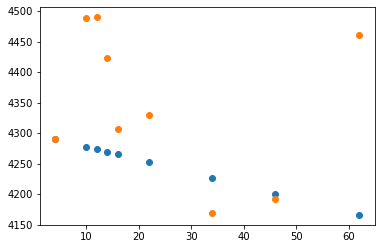

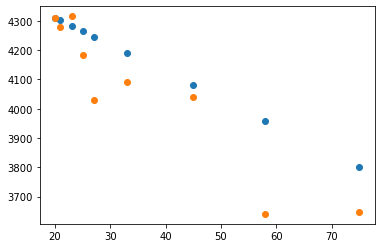

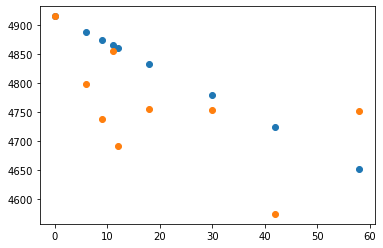

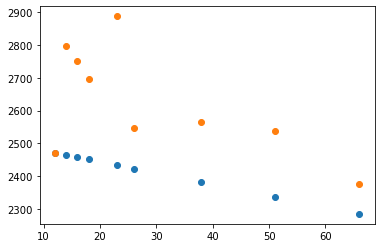

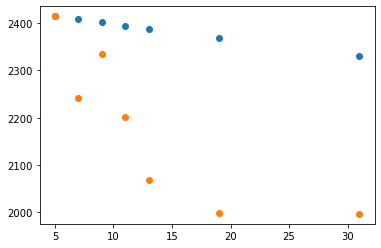

In [121]:
plotres('ID00190637202244450116191')
plotres('ID00202637202249376026949')
plotres('ID00371637202296828615743')
plotres('ID00094637202205333947361')
plotres('ID00027637202179689871102')
plotres('ID00130637202220059448013')
plotres('ID00381637202299644114027')
plotres('ID00167637202237397919352')

In [237]:
from sklearn.metrics import mean_squared_error # let's do root
mean_squared_error(pred_slope_plus_real_slope_Final2['PRED FVC'], pred_slope_plus_real_slope_Final2['FVC_x'], squared =False)

188.81360277723786